# API Env for Reinforcement Learning


This notebook runs some experiments of several Reinforcement Learning algorithms in a builded API Env based on Gymnasium library.

For each algorithm it is possible to configure some State Rewards and Action Penalties dictionary. These data refer to the reward of each possible state and to a penalty related to each action, respectively.

Therefore, it is possible to configure a specific set of values for each algorithm and test/compare the results.


In [ ]:
# Uncomment and run the lines above for Google Colab notebooks
!git clone https://:@github.com/arturossouza/API-Env.git
%cd API-Env
!pip install -r requirements.txt

Cloning into 'API-Env'...
remote: Enumerating objects: 262, done.
remote: Counting objects: 100% (262/262), done.
remote: Compressing objects: 100% (172/172), done.
remote: Total 262 (delta 182), reused 164 (delta 87), pack-reused 0 (from 0)
Receiving objects: 100% (262/262), 6.34 MiB | 11.24 MiB/s, done.
Resolving deltas: 100% (182/182), done.
/content/API-Env
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 17.1 MB/s eta 0:00:00


In [ ]:
%cd API-Env
!git pull

[Errno 2] No such file or directory: 'API-Env'
/content/API-Env
Already up to date.


In [ ]:
from src.apienv import APIEnv

In [ ]:
state_rewards = {
    "availability": {"Available": 20, "Offline": -200},
    "response_speed": {"Fast": 15, "Medium": -15, "Slow": -100},
    "health": {"Healthy": 5, "Error": -100, "Overloaded": -50},
    "request_capacity": {"Low": -25, "Medium": -12, "High": 5},
}

actions_penalties = {
    "Increase_CPU": -30,
    "Increase_CPU_Slightly": -20,
    "Decrease_CPU": -1,
    "Decrease_CPU_Slightly": -2,
    "Corrective_Maintenance": -7,
    "Preventive_Maintenance": -3,
    "Restart_Components": -10,
    "Update_Version": -6,
    "Rollback_Version": -16,
    "Add_Memory": -20,
    "Remove_Memory": -2,
}

In [ ]:
env = APIEnv(
    state_rewards=state_rewards,
    actions_penalties=actions_penalties,
)

## Dynamic Programming


In [ ]:
from src.algorithms.dynamic_programming.policy_evaluation import policy_improvement
from src.algorithms.dynamic_programming.value_iteration import value_iteration
from src.algorithms.dynamic_programming.utils import (
    plot_action_state_history,
    plot_total_rewards,
    run_policy,
)

### Value Iteration


In [ ]:
env.reset()

(7, {})

#### Experimento 1 -> Curva de aprendizado esta invertida e demorou muito

Executando Value Iteration...
Episode 1/1
Current API state: Available_Slow_Healthy_Low
Step 1: State=7, Action=6, Reward=-110, Next State=27
Current API state: Available_Fast_Error_Low
Step 2: State=27, Action=7, Reward=-96, Next State=51
Current API state: Available_Fast_Overloaded_Medium
Step 3: State=51, Action=9, Reward=-47, Next State=49
Current API state: Available_Slow_Healthy_Medium
Step 4: State=49, Action=9, Reward=-107, Next State=28
Current API state: Available_Fast_Healthy_Medium
Step 5: State=28, Action=0, Reward=-2, Next State=46
Current API state: Available_Fast_Healthy_High
Step 6: State=46, Action=9, Reward=25, Next State=47


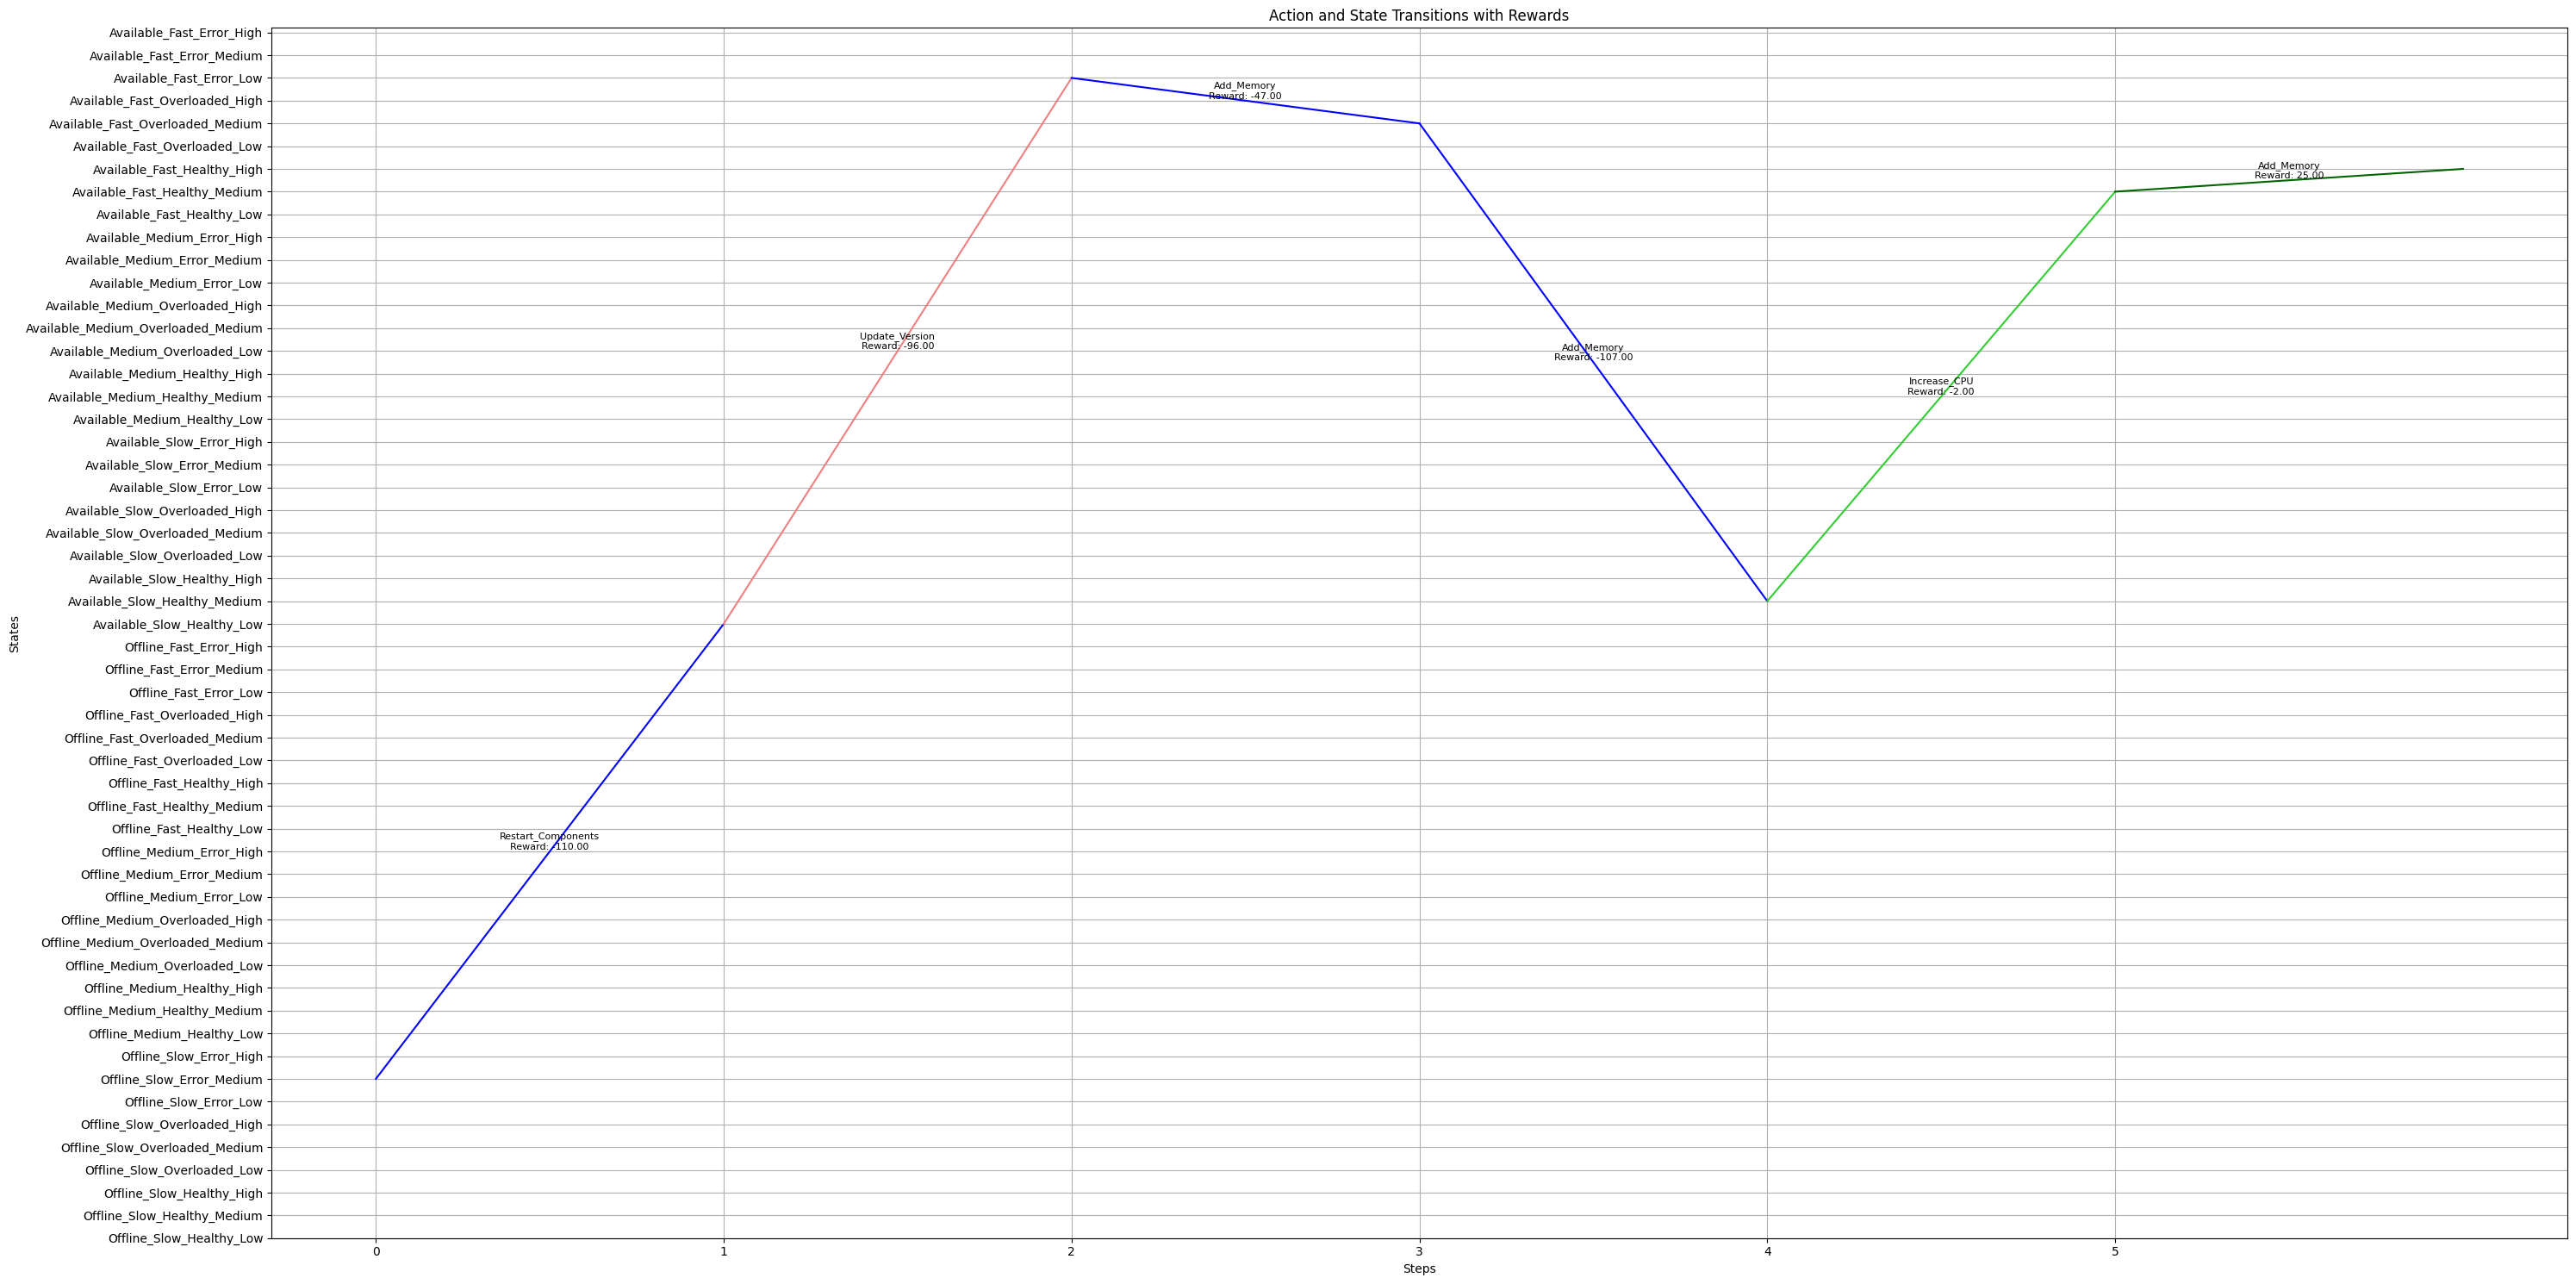

Somatório das recompensas: [-1464.1342037597124, -1448.2427242233462, -1436.1996521850915, -1482.1023046457635, -1482.1023046457635, -1482.1023046457635, -1482.1023046457635, -1482.1023046457635, -1482.1023046457635, -1482.1023046457635, -1482.1023046457635, -1482.1023046457635, -1482.1023046457635, -1482.1023046457635, -1482.1023046457635, -1482.1023046457635, -1482.1023046457635, -1482.1023046457635, -1482.1023046457635, -1482.1023046457635, -1482.1023046457635, -1482.1023046457635, -1482.1023046457635, -1482.1023046457635, -1482.1023046457635, -1482.1023046457635, -1482.1023046457635, -1482.1023046457635, -1482.1023046457635, -1482.1023046457635, -1482.1023046457635, -1482.1023046457635, -1482.1023046457635, -1482.1023046457635, -1482.1023046457635, -1482.1023046457635, -1482.1023046457635, -1482.1023046457635, -1482.1023046457635, -1482.1023046457635, -1482.1023046457635, -1482.1023046457635, -1482.1023046457635, -1482.1023046457635, -1482.1023046457635, -1482.1023046457635, -1482.

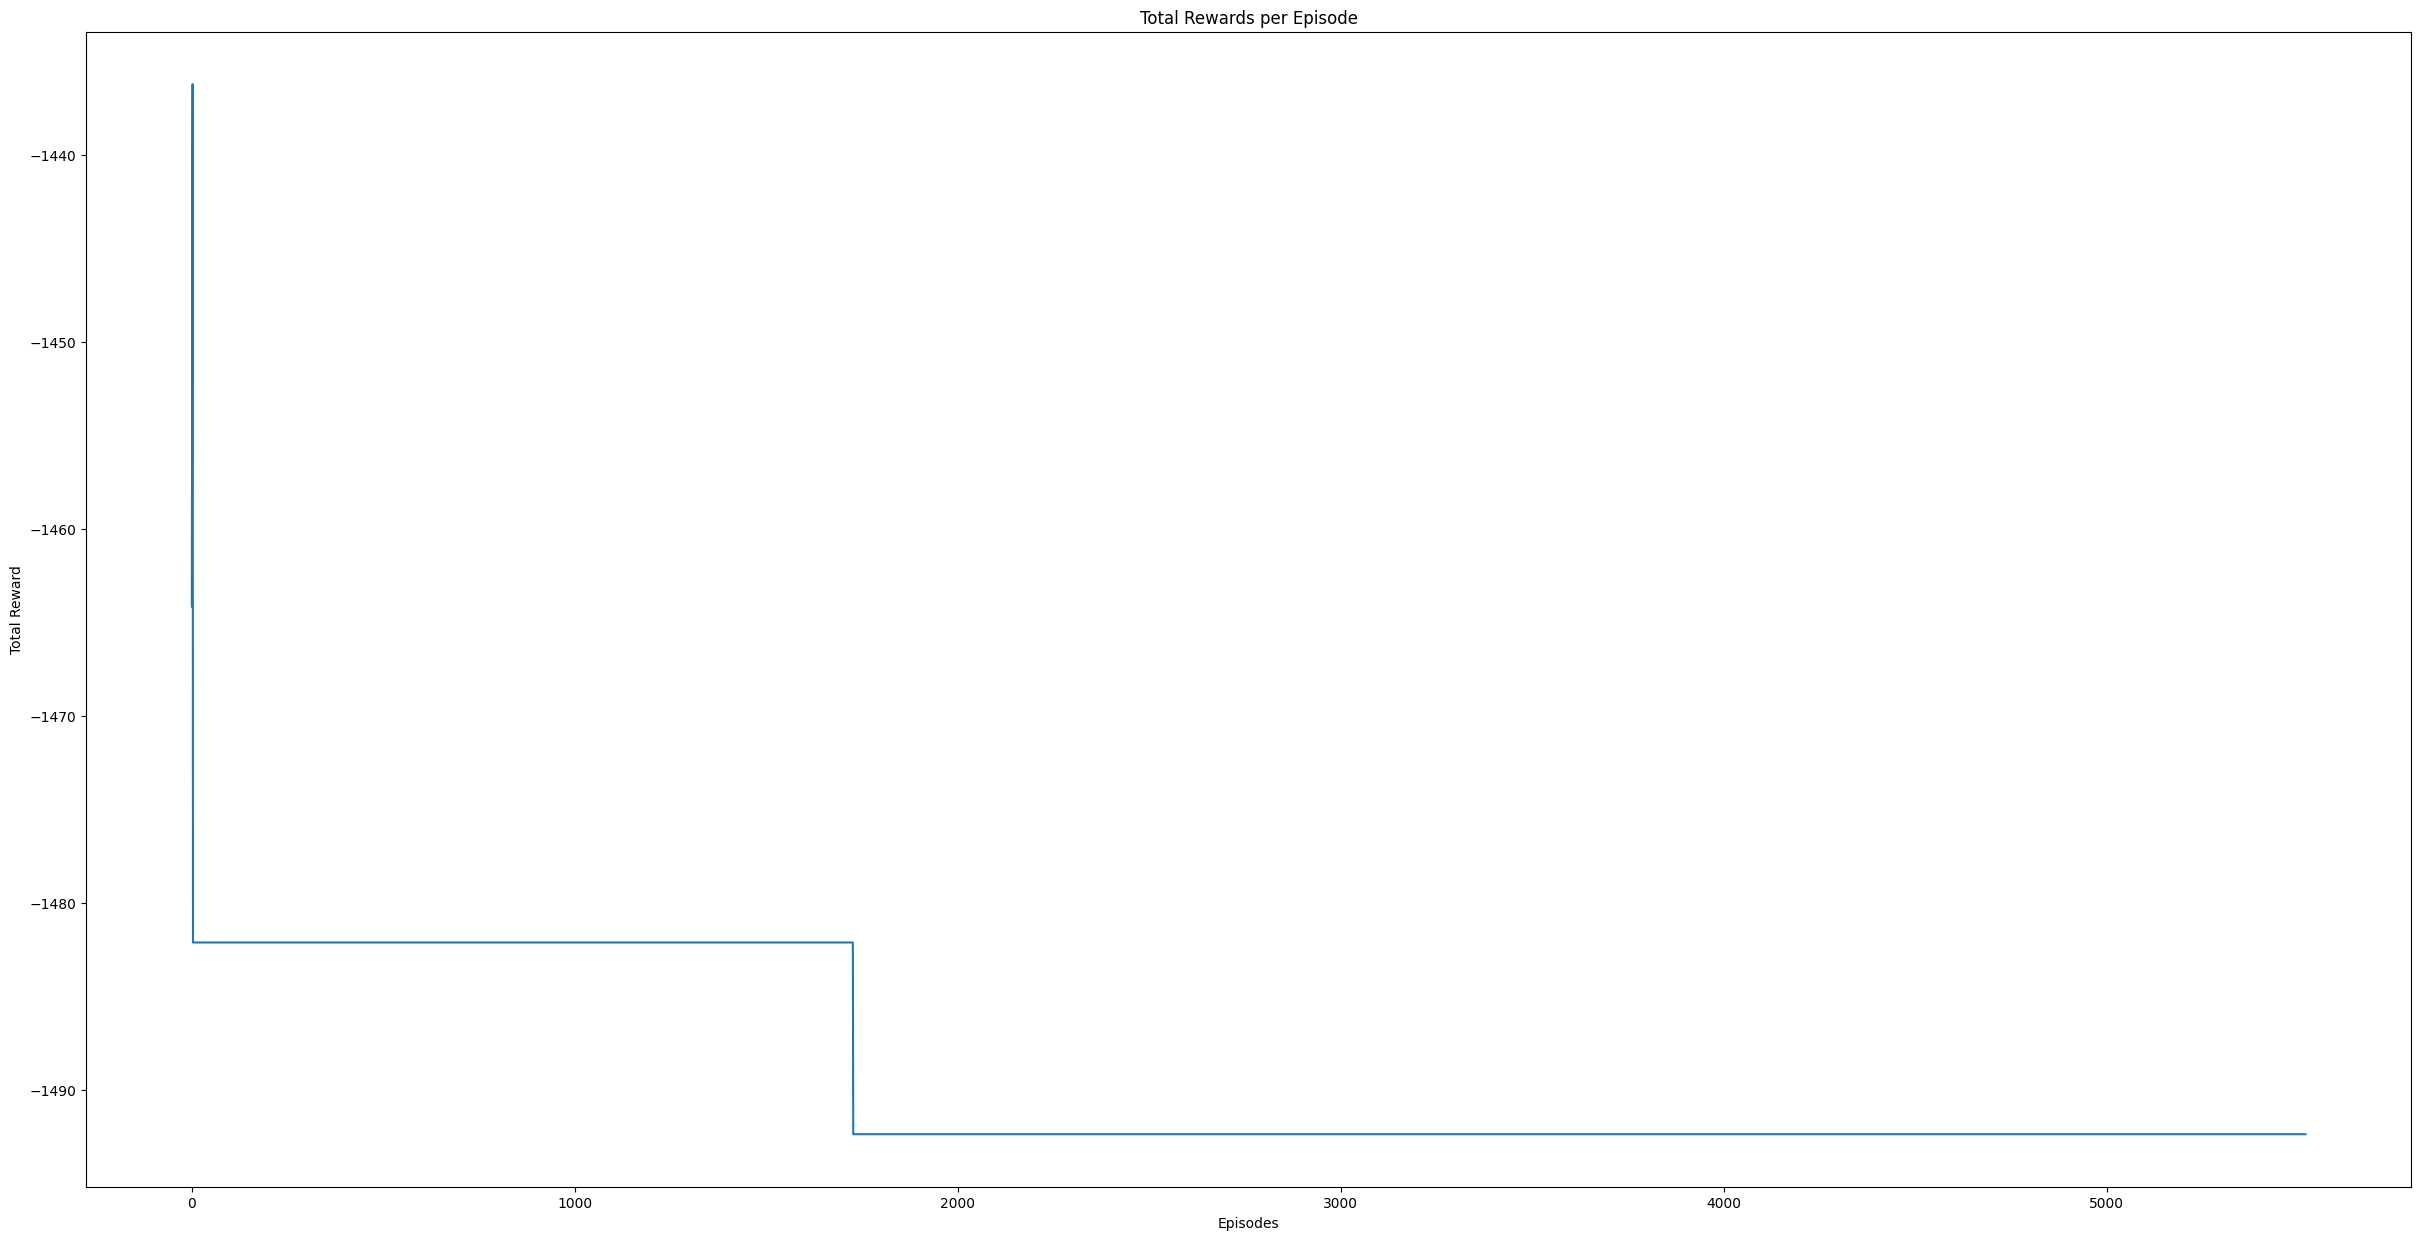

In [ ]:
# Executando Value Iteration
print("Executando Value Iteration...")
policy_vi, _, episode_rewards = value_iteration(env, theta=0.1, discount_factor=0.999)
histories_vi, rewards_vi, total_rewards_vi = run_policy(env, policy_vi, num_episodes=1, num_steps=10)

# Visualizando o histórico e as recompensas do primeiro episódio
plot_action_state_history(histories_vi[0], rewards_vi[0], env)

# Visualizando as recompensas acumuladas em todos os episódios
plot_total_rewards(episode_rewards)

#### Experimento 02 -> Já melhorou, porém os últimos episódios não foram os melhores

Executando Value Iteration...
Episode 1/1
Current API state: Available_Slow_Healthy_Low
Step 1: State=7, Action=6, Reward=-110, Next State=27
Current API state: Available_Medium_Healthy_High
Step 2: State=27, Action=7, Reward=9, Next State=38
Current API state: Available_Fast_Healthy_High
Step 3: State=38, Action=0, Reward=15, Next State=47


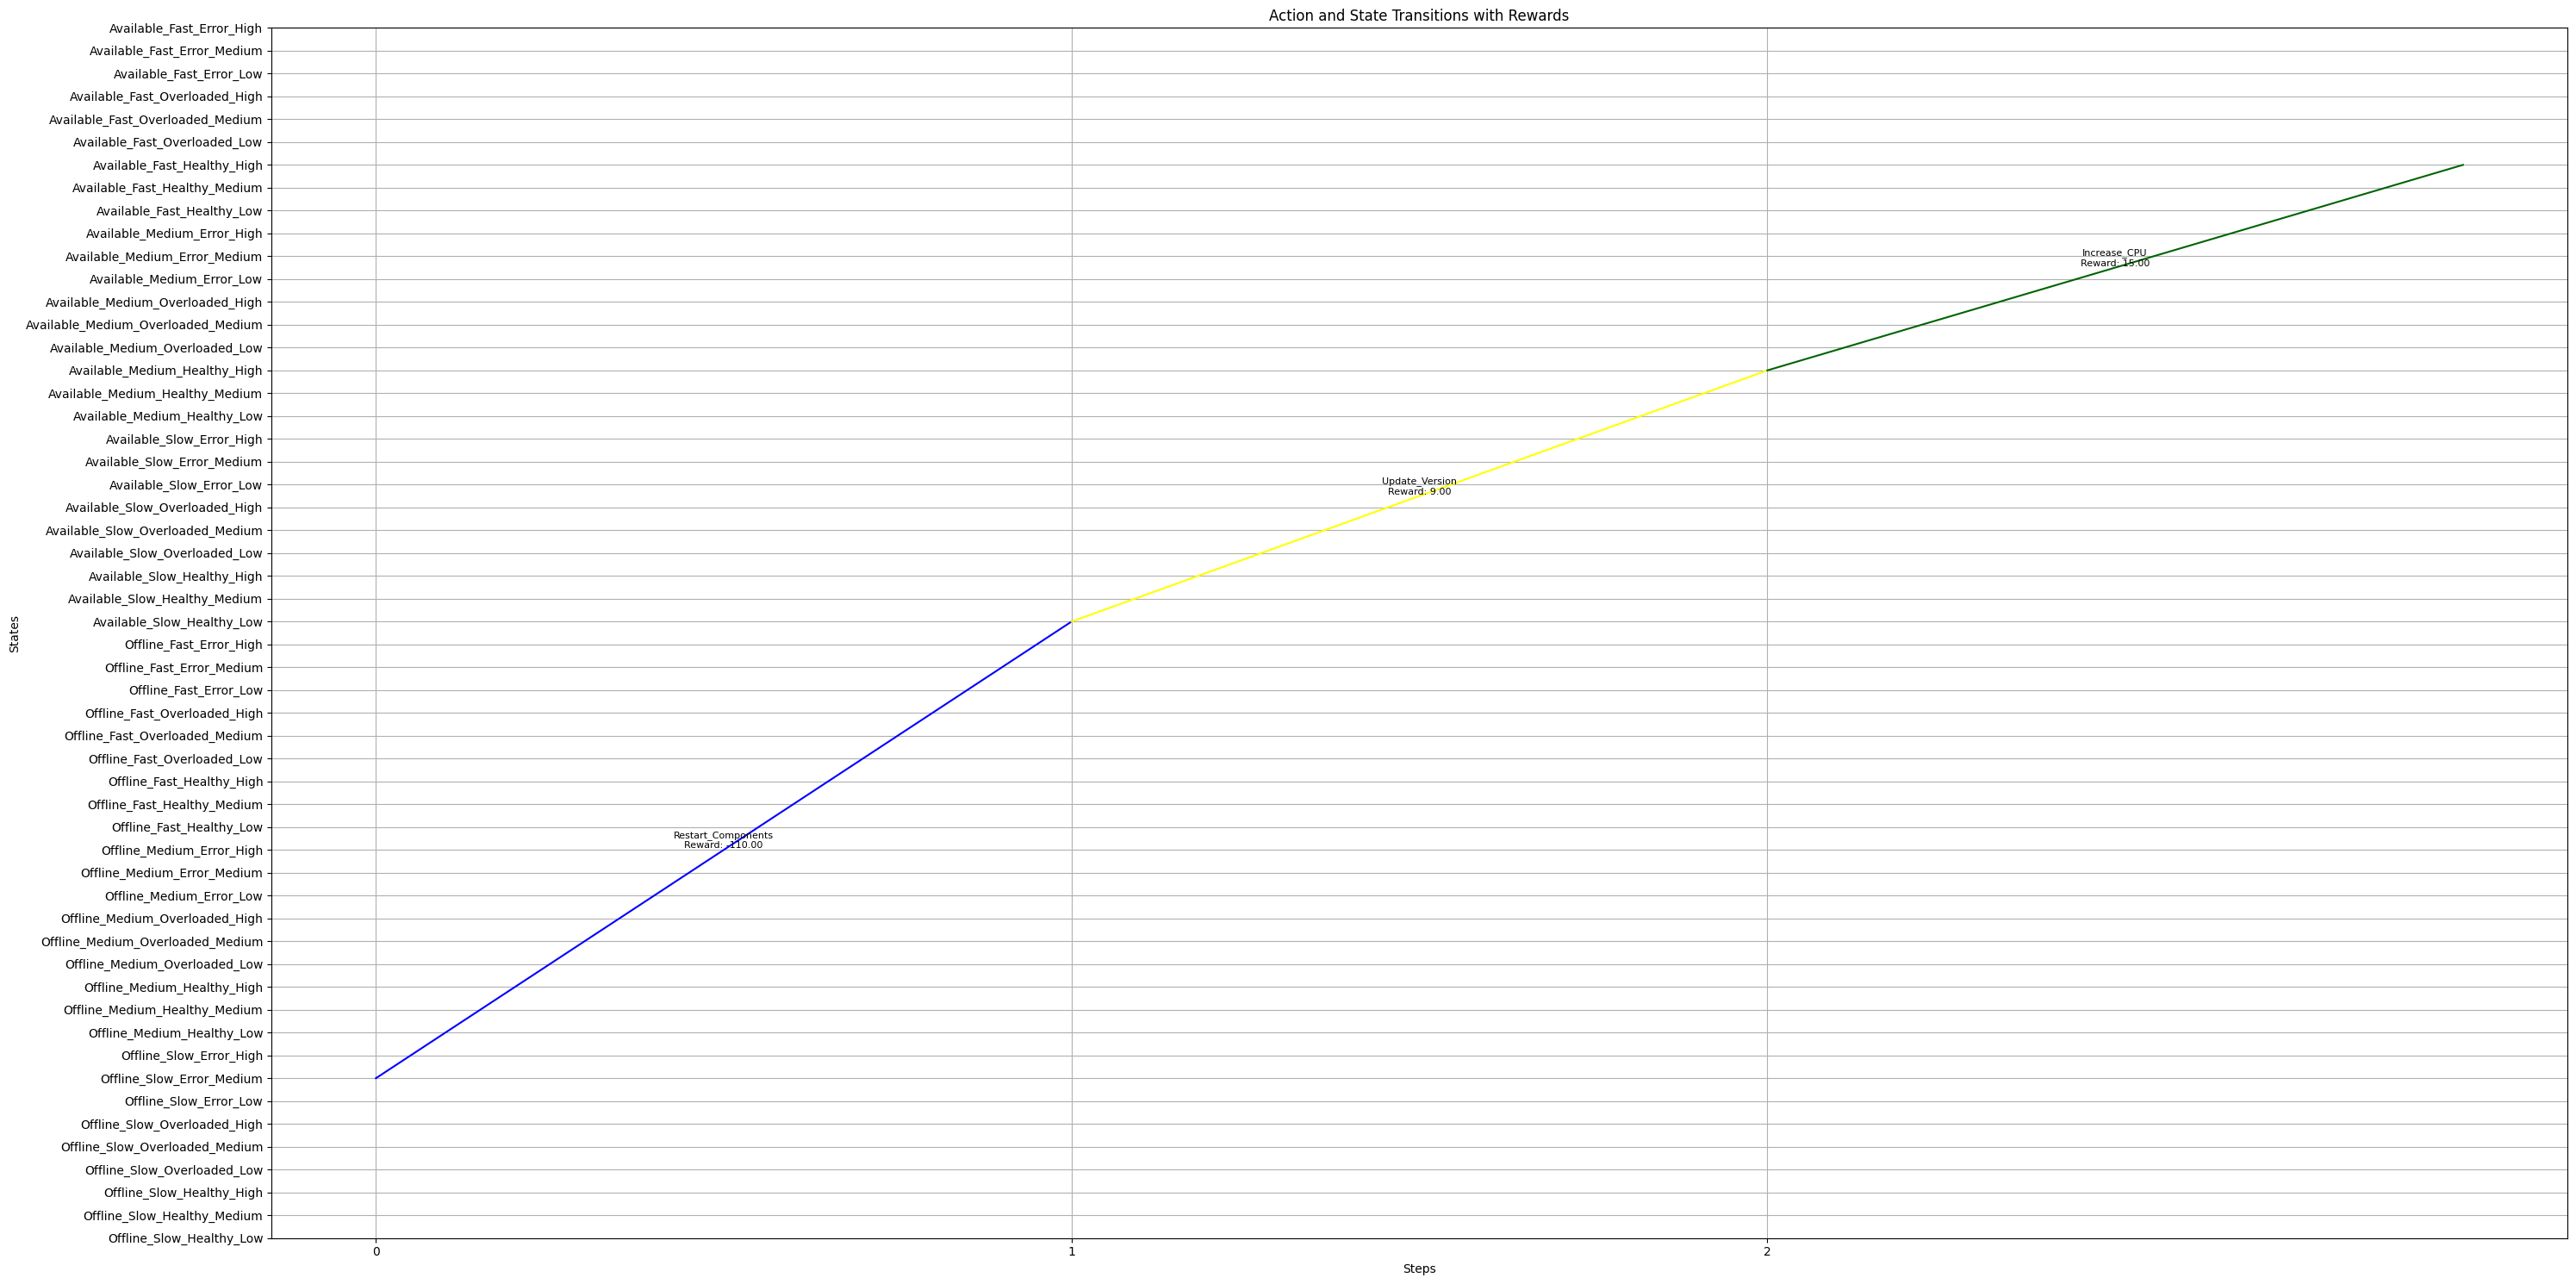

Somatório das recompensas: [-1464.1342037597124, -1423.5502416176887, -1450.7823569073212, -1436.1996521850915, -1482.1023046457635, -1482.1023046457635, -1482.1023046457635, -1482.1023046457635, -1482.1023046457635, -1482.1023046457635, -1436.1996521850915, -1436.1996521850915, -1436.1996521850915, -1446.45362339448, -1446.45362339448, -1446.45362339448, -1446.45362339448, -1446.45362339448, -1446.45362339448, -1446.45362339448, -1446.45362339448, -1446.45362339448, -1446.45362339448, -1446.45362339448, -1446.45362339448, -1446.45362339448, -1446.45362339448, -1446.45362339448, -1446.45362339448, -1446.45362339448, -1446.45362339448, -1446.45362339448, -1446.45362339448, -1446.45362339448, -1446.45362339448, -1446.45362339448, -1446.45362339448, -1446.45362339448, -1446.45362339448, -1446.45362339448, -1446.45362339448, -1446.45362339448, -1446.45362339448, -1446.45362339448, -1446.45362339448, -1446.45362339448, -1446.45362339448, -1446.45362339448, -1446.45362339448, -1446.453623394

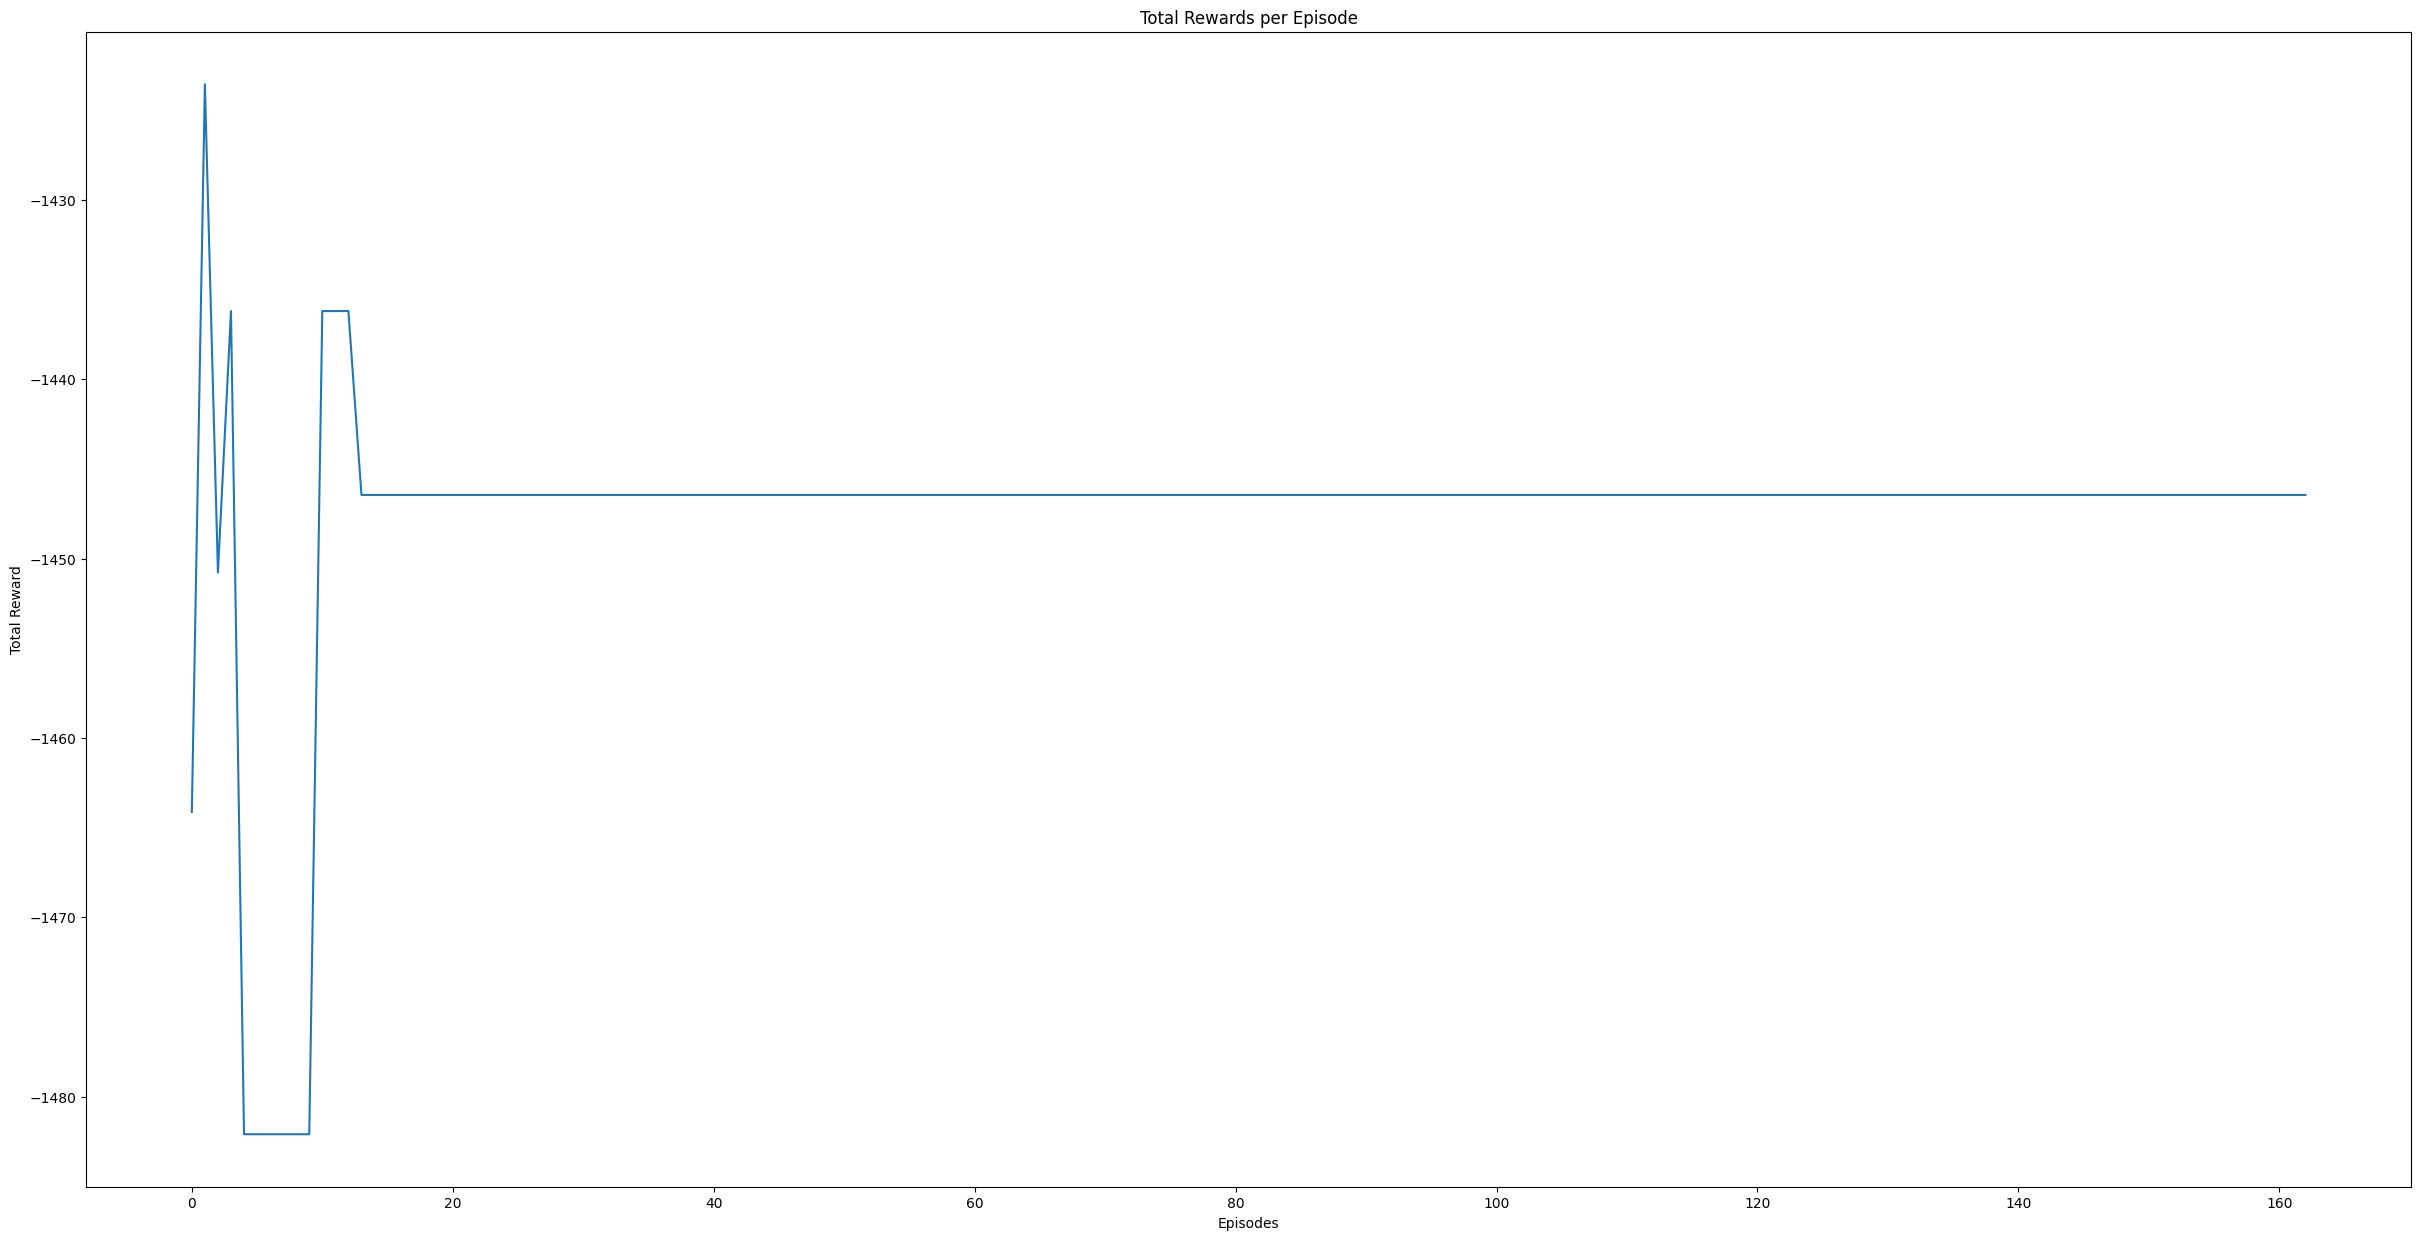

In [ ]:
# Executando Value Iteration
print("Executando Value Iteration...")
policy_vi, _, episode_rewards= value_iteration(env, theta=0.000001, discount_factor=0.9)
histories_vi, rewards_vi, total_rewards_vi = run_policy(env, policy_vi, num_episodes=1, num_steps=10)

# Visualizando o histórico e as recompensas do primeiro episódio
plot_action_state_history(histories_vi[0], rewards_vi[0], env)

# Visualizando as recompensas acumuladas em todos os episódios
plot_total_rewards(episode_rewards)

#### Experimento 3 -> Ficou muito curta a curva ainda

Executando Value Iteration...
Episode 1/1
Current API state: Available_Medium_Healthy_Medium
Step 1: State=7, Action=4, Reward=-9, Next State=37
Current API state: Available_Slow_Healthy_Medium
Step 2: State=37, Action=0, Reward=-117, Next State=28
Current API state: Available_Slow_Healthy_Medium
Step 3: State=28, Action=0, Reward=-117, Next State=28
Current API state: Available_Fast_Healthy_Medium
Step 4: State=28, Action=0, Reward=-2, Next State=46
Current API state: Available_Fast_Healthy_High
Step 5: State=46, Action=9, Reward=25, Next State=47


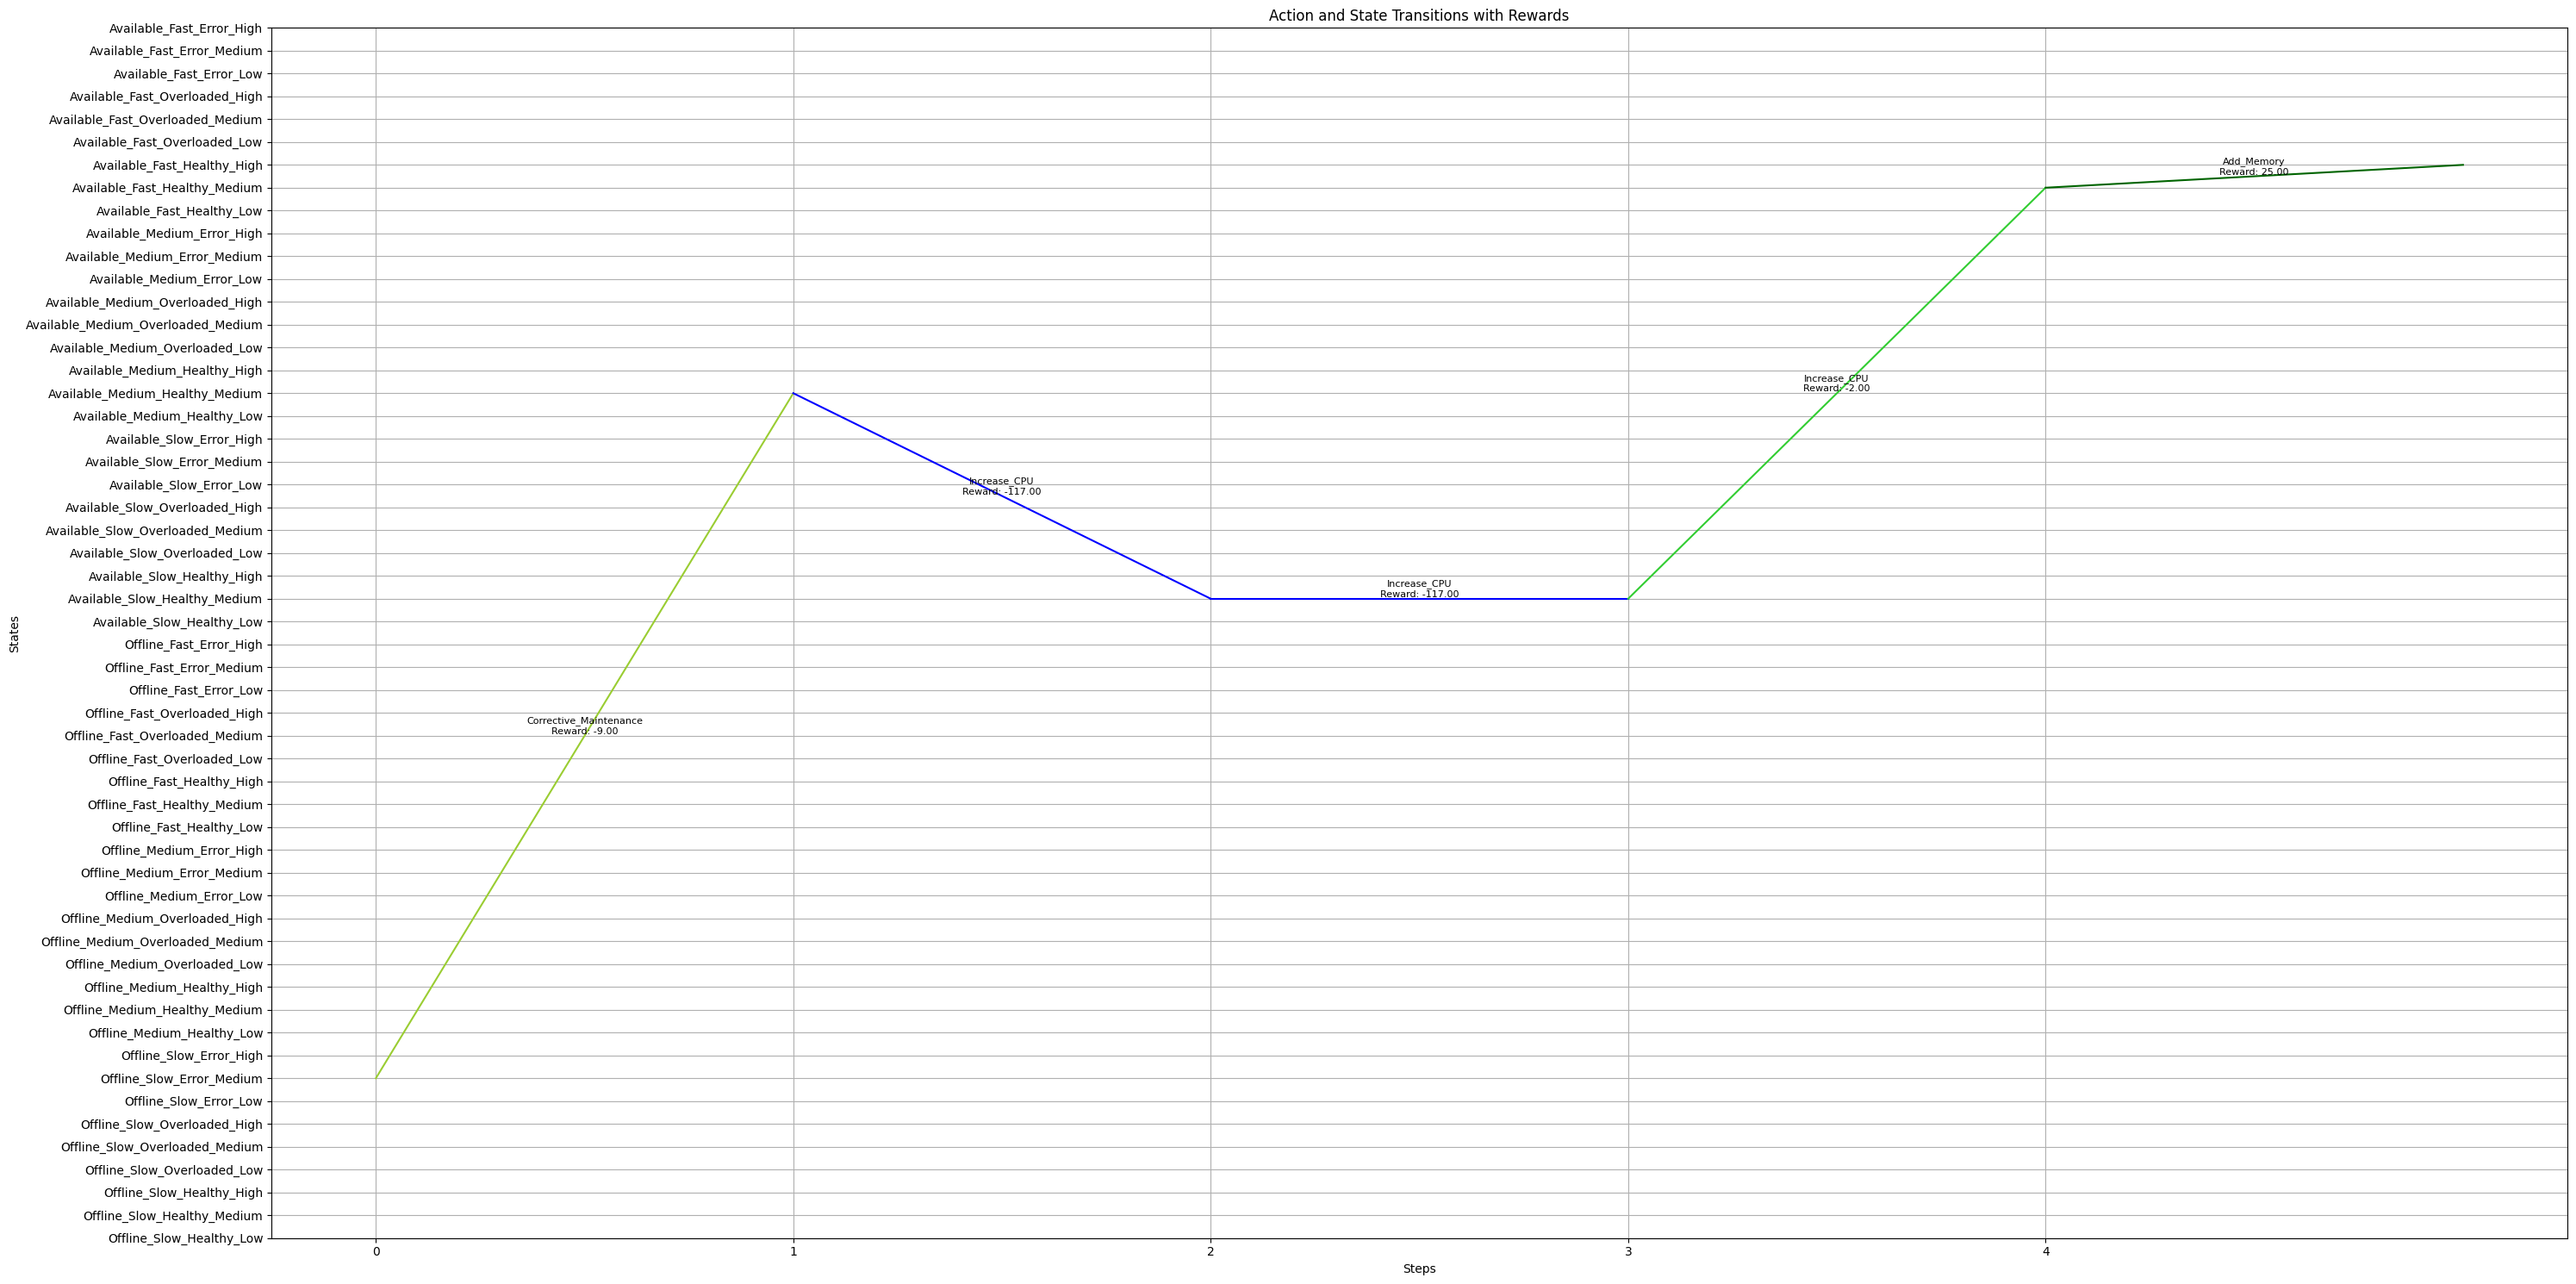

Somatório das recompensas: [-1489.9934524961752, -1433.5615440616484, -1433.5615440616484, -1433.5615440616484, -1414.503634182706, -1414.503634182706, -1414.503634182706, -1414.503634182706, -1414.503634182706, -1414.503634182706, -1414.503634182706, -1414.503634182706, -1414.503634182706, -1414.503634182706]
Somatório das recompensas: -19935.71442650818


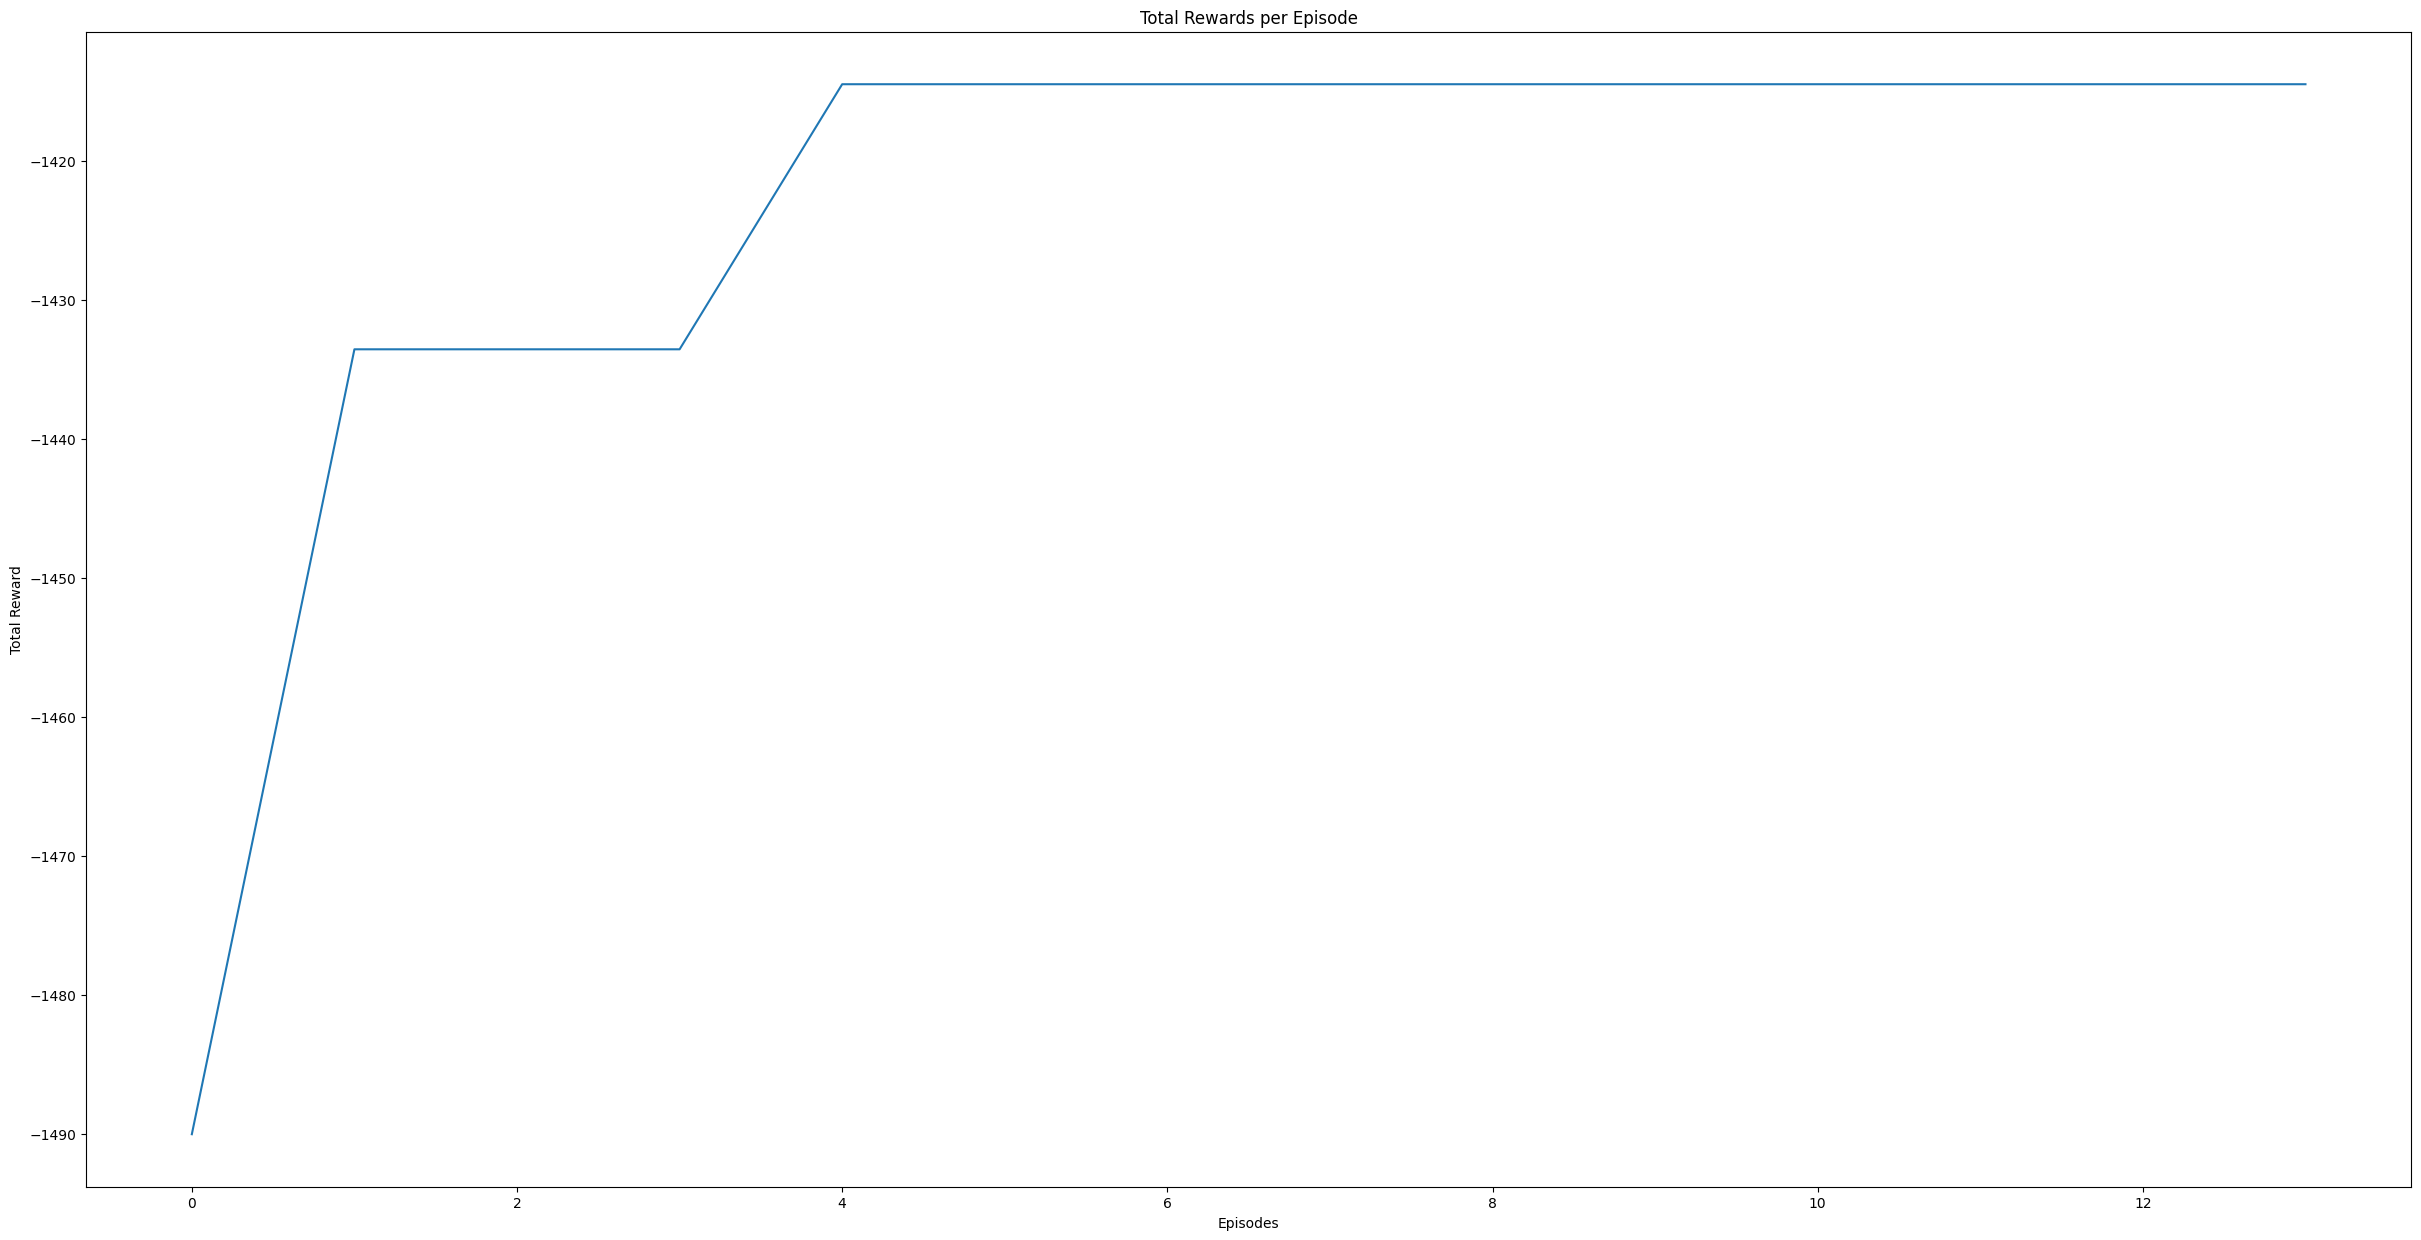

In [ ]:
# Executando Value Iteration
print("Executando Value Iteration...")
policy_vi, _, episode_rewards = value_iteration(env, theta=0.00001, discount_factor=0.3)
histories_vi, rewards_vi, total_rewards_vi = run_policy(env, policy_vi, num_episodes=1, num_steps=10)

# Visualizando o histórico e as recompensas do primeiro episódio
plot_action_state_history(histories_vi[0], rewards_vi[0], env)

# Visualizando as recompensas acumuladas em todos os episódios
plot_total_rewards(episode_rewards)

#### Experimento 4 -> Melhor resultado

Executando Value Iteration...
Episode 1/1
Current API state: Available_Slow_Healthy_Low
Step 1: State=7, Action=6, Reward=-110, Next State=27
Current API state: Available_Medium_Healthy_High
Step 2: State=27, Action=7, Reward=9, Next State=38
Current API state: Available_Fast_Healthy_High
Step 3: State=38, Action=0, Reward=15, Next State=47


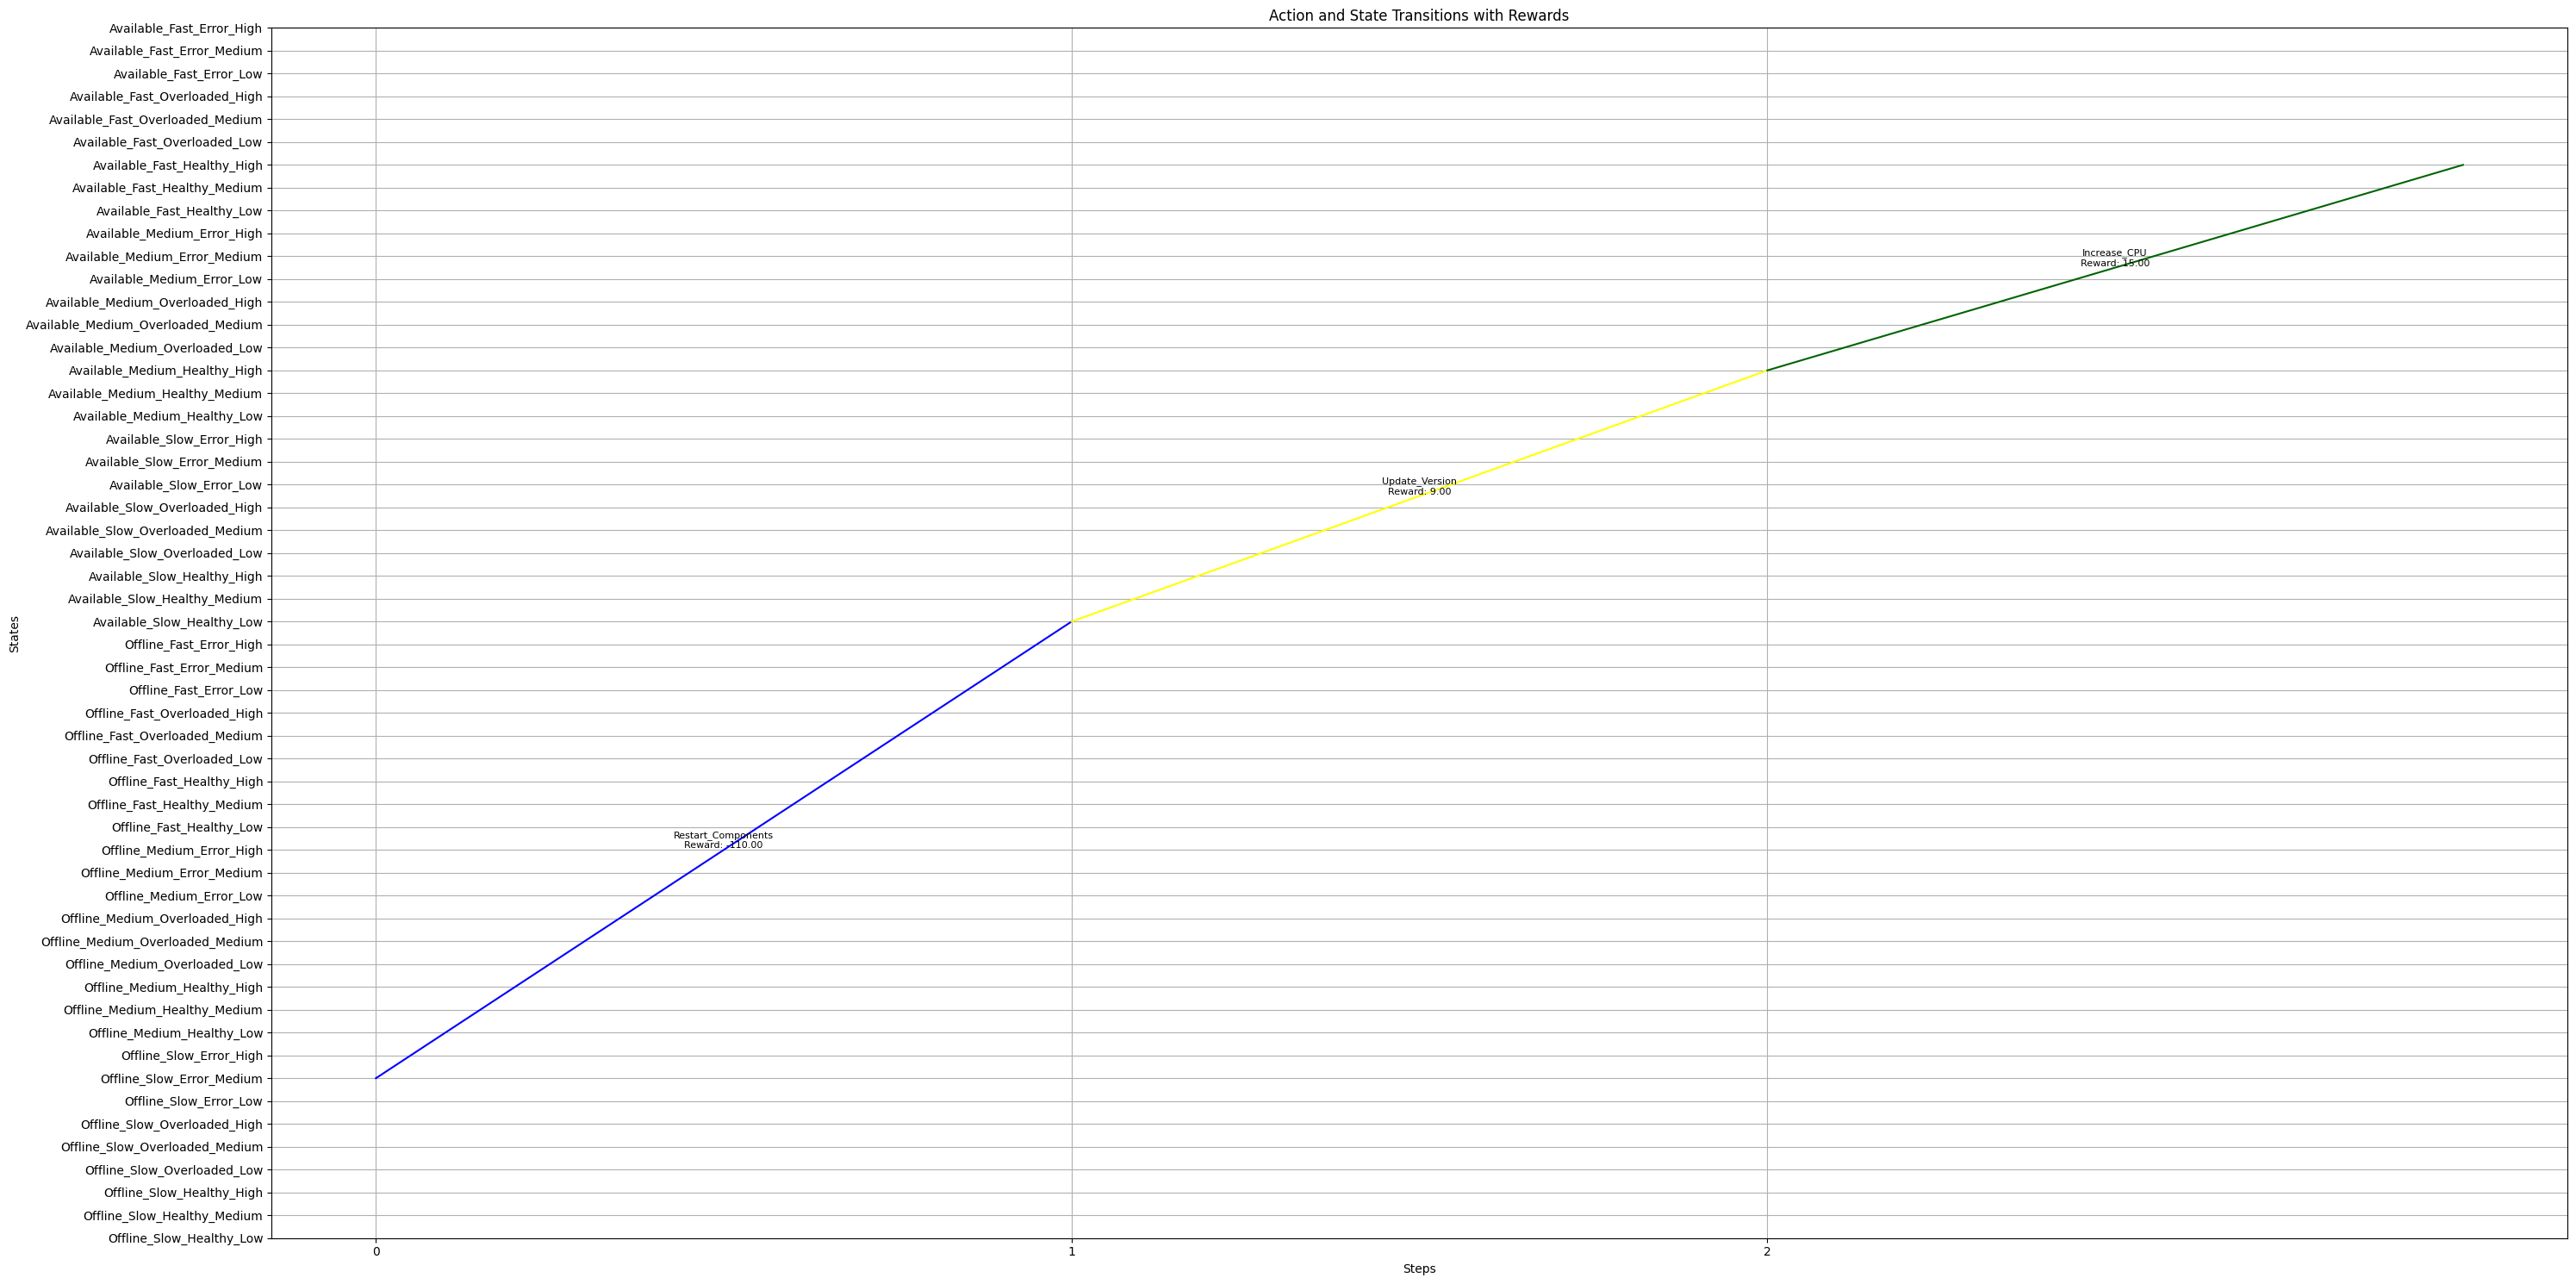

Somatório das recompensas: [-1462.5467968524035, -1423.5502416176887, -1434.2357401873287, -1436.1996521850915, -1436.1996521850915, -1436.1996521850915, -1446.45362339448, -1446.45362339448, -1446.45362339448, -1446.45362339448, -1421.7611407888226, -1421.7611407888226, -1421.7611407888226, -1421.7611407888226, -1421.7611407888226, -1421.7611407888226, -1421.7611407888226, -1421.7611407888226, -1421.7611407888226, -1421.7611407888226, -1408.6260523888172, -1408.6260523888172, -1408.6260523888172, -1408.6260523888172, -1408.6260523888172, -1408.6260523888172, -1408.6260523888172, -1408.6260523888172, -1408.6260523888172, -1408.6260523888172, -1408.6260523888172, -1408.6260523888172, -1408.6260523888172, -1408.6260523888172, -1408.6260523888172, -1408.6260523888172, -1408.6260523888172, -1408.6260523888172, -1408.6260523888172, -1408.6260523888172, -1408.6260523888172, -1408.6260523888172, -1408.6260523888172, -1408.6260523888172, -1408.6260523888172, -1408.6260523888172, -1408.62605238

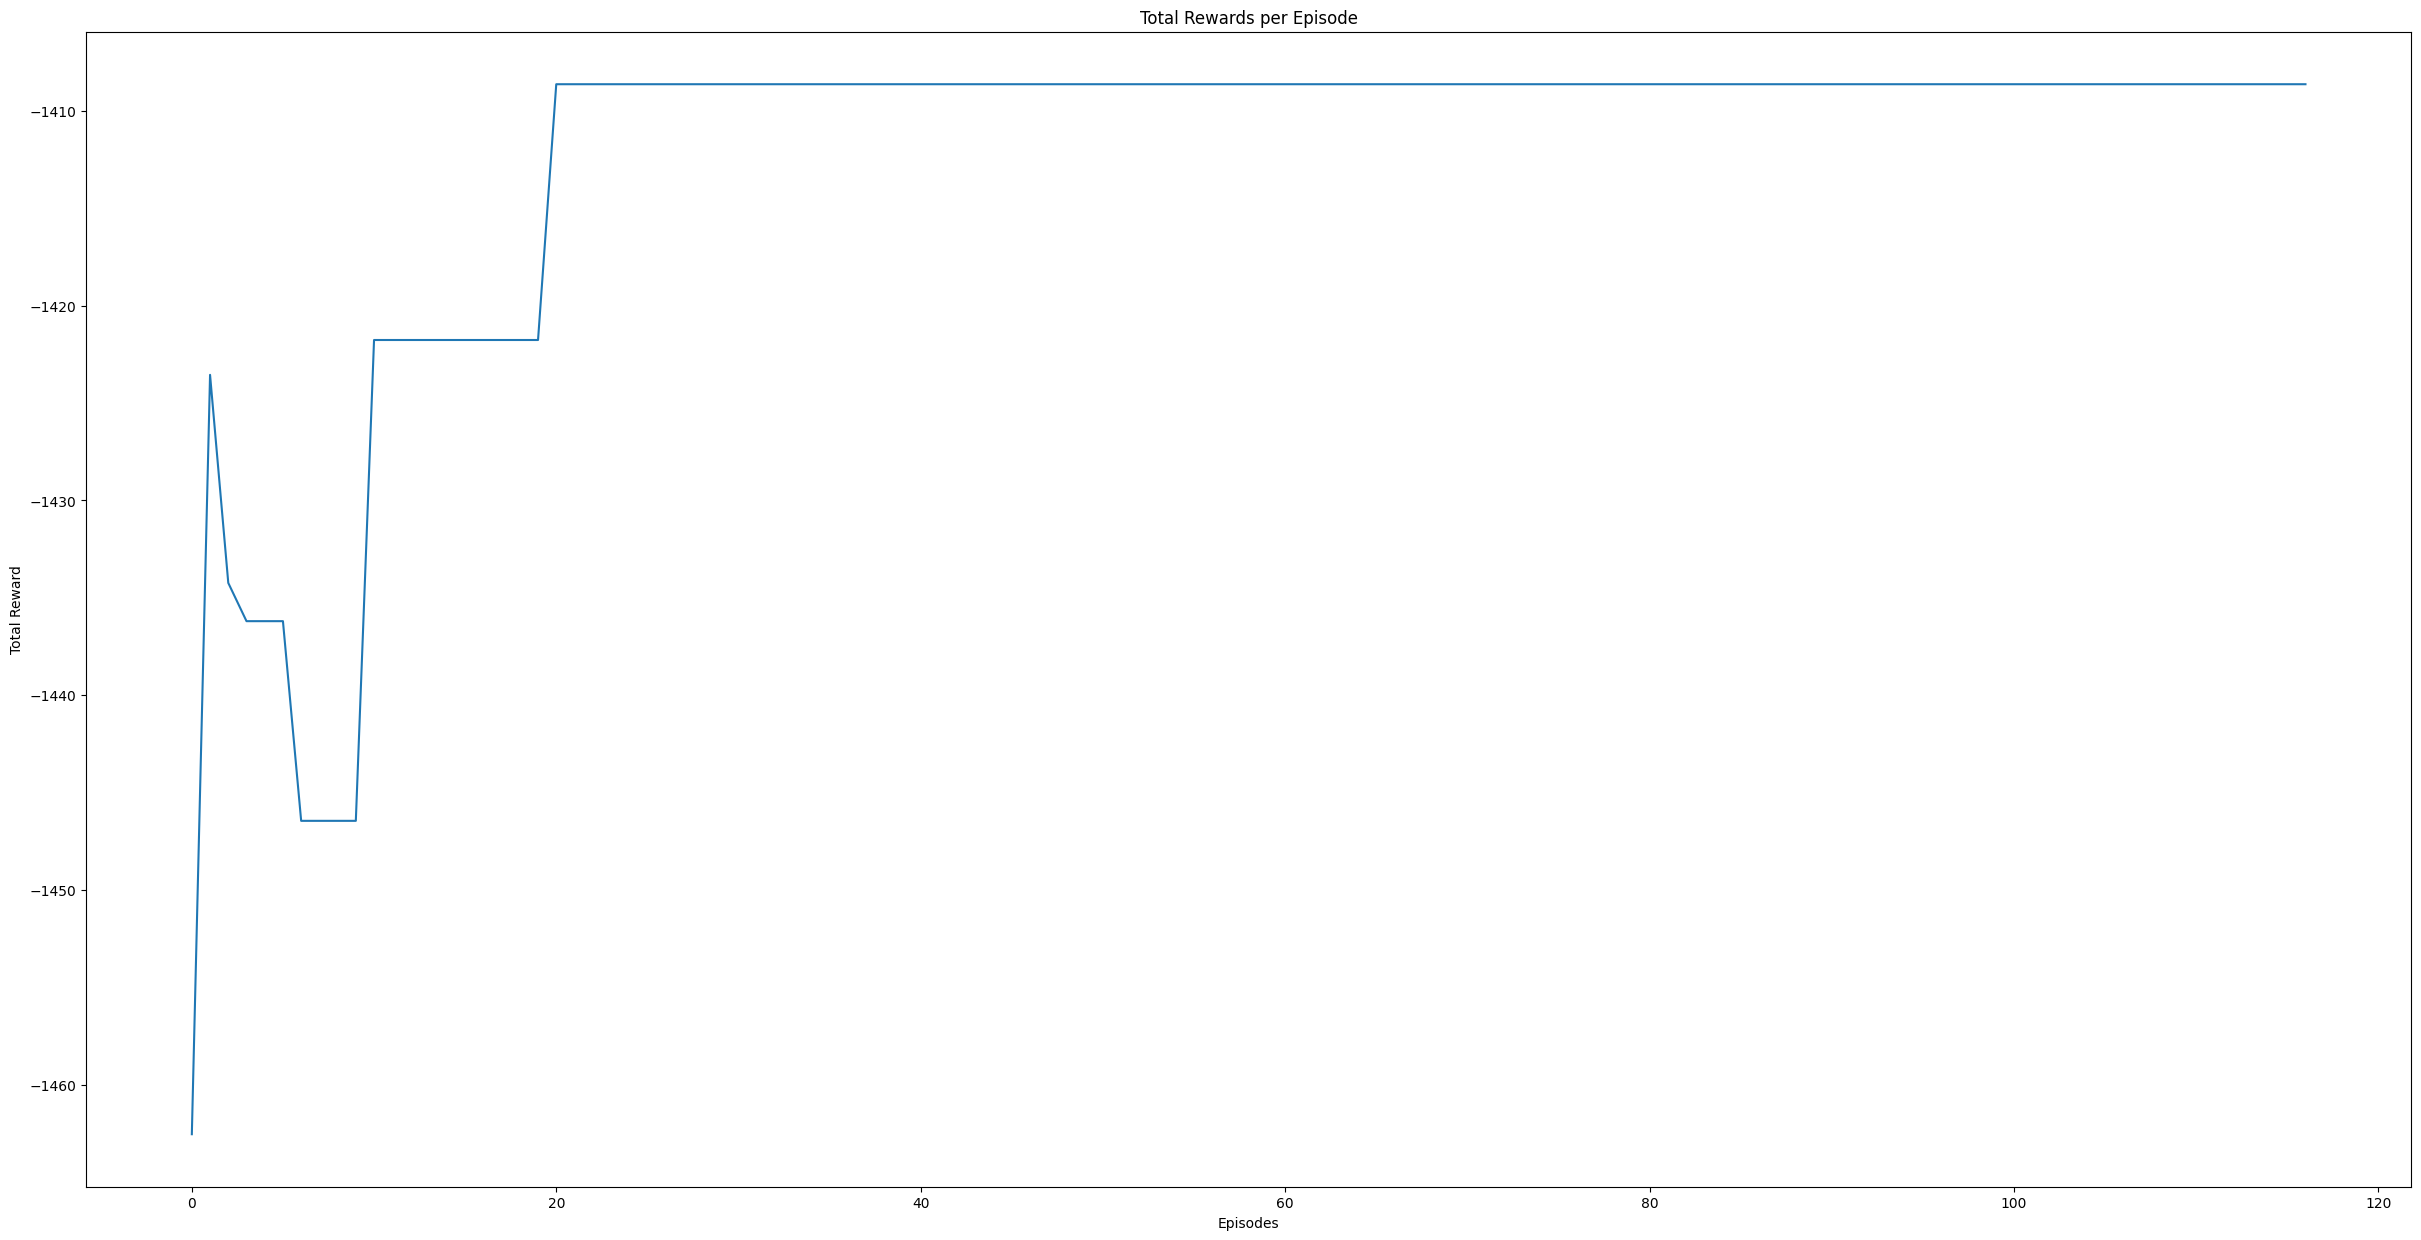

In [ ]:
# Executando Value Iteration
print("Executando Value Iteration...")
policy_vi, _, episode_rewards = value_iteration(env, theta=0.00000001, discount_factor=0.829)
histories_vi, rewards_vi, total_rewards_vi = run_policy(env, policy_vi, num_episodes=1, num_steps=100)

# Visualizando o histórico e as recompensas do primeiro episódio
plot_action_state_history(histories_vi[0], rewards_vi[0], env)

# Visualizando as recompensas acumuladas em todos os episódios
plot_total_rewards(episode_rewards)

### Policy Improvement



In [ ]:
env.reset()

(7, {})

#### Experimento 1 -> Resultado bom


Executando Policy Improvement...
Política estável após 4 iterações
Episode 1/1
Current API state: Available_Medium_Healthy_Medium
Step 1: State=7, Action=4, Reward=-9, Next State=37
Current API state: Available_Slow_Healthy_Medium
Step 2: State=37, Action=9, Reward=-107, Next State=28
Current API state: Available_Medium_Healthy_High
Step 3: State=28, Action=7, Reward=9, Next State=38
Current API state: Available_Fast_Healthy_High
Step 4: State=38, Action=0, Reward=15, Next State=47


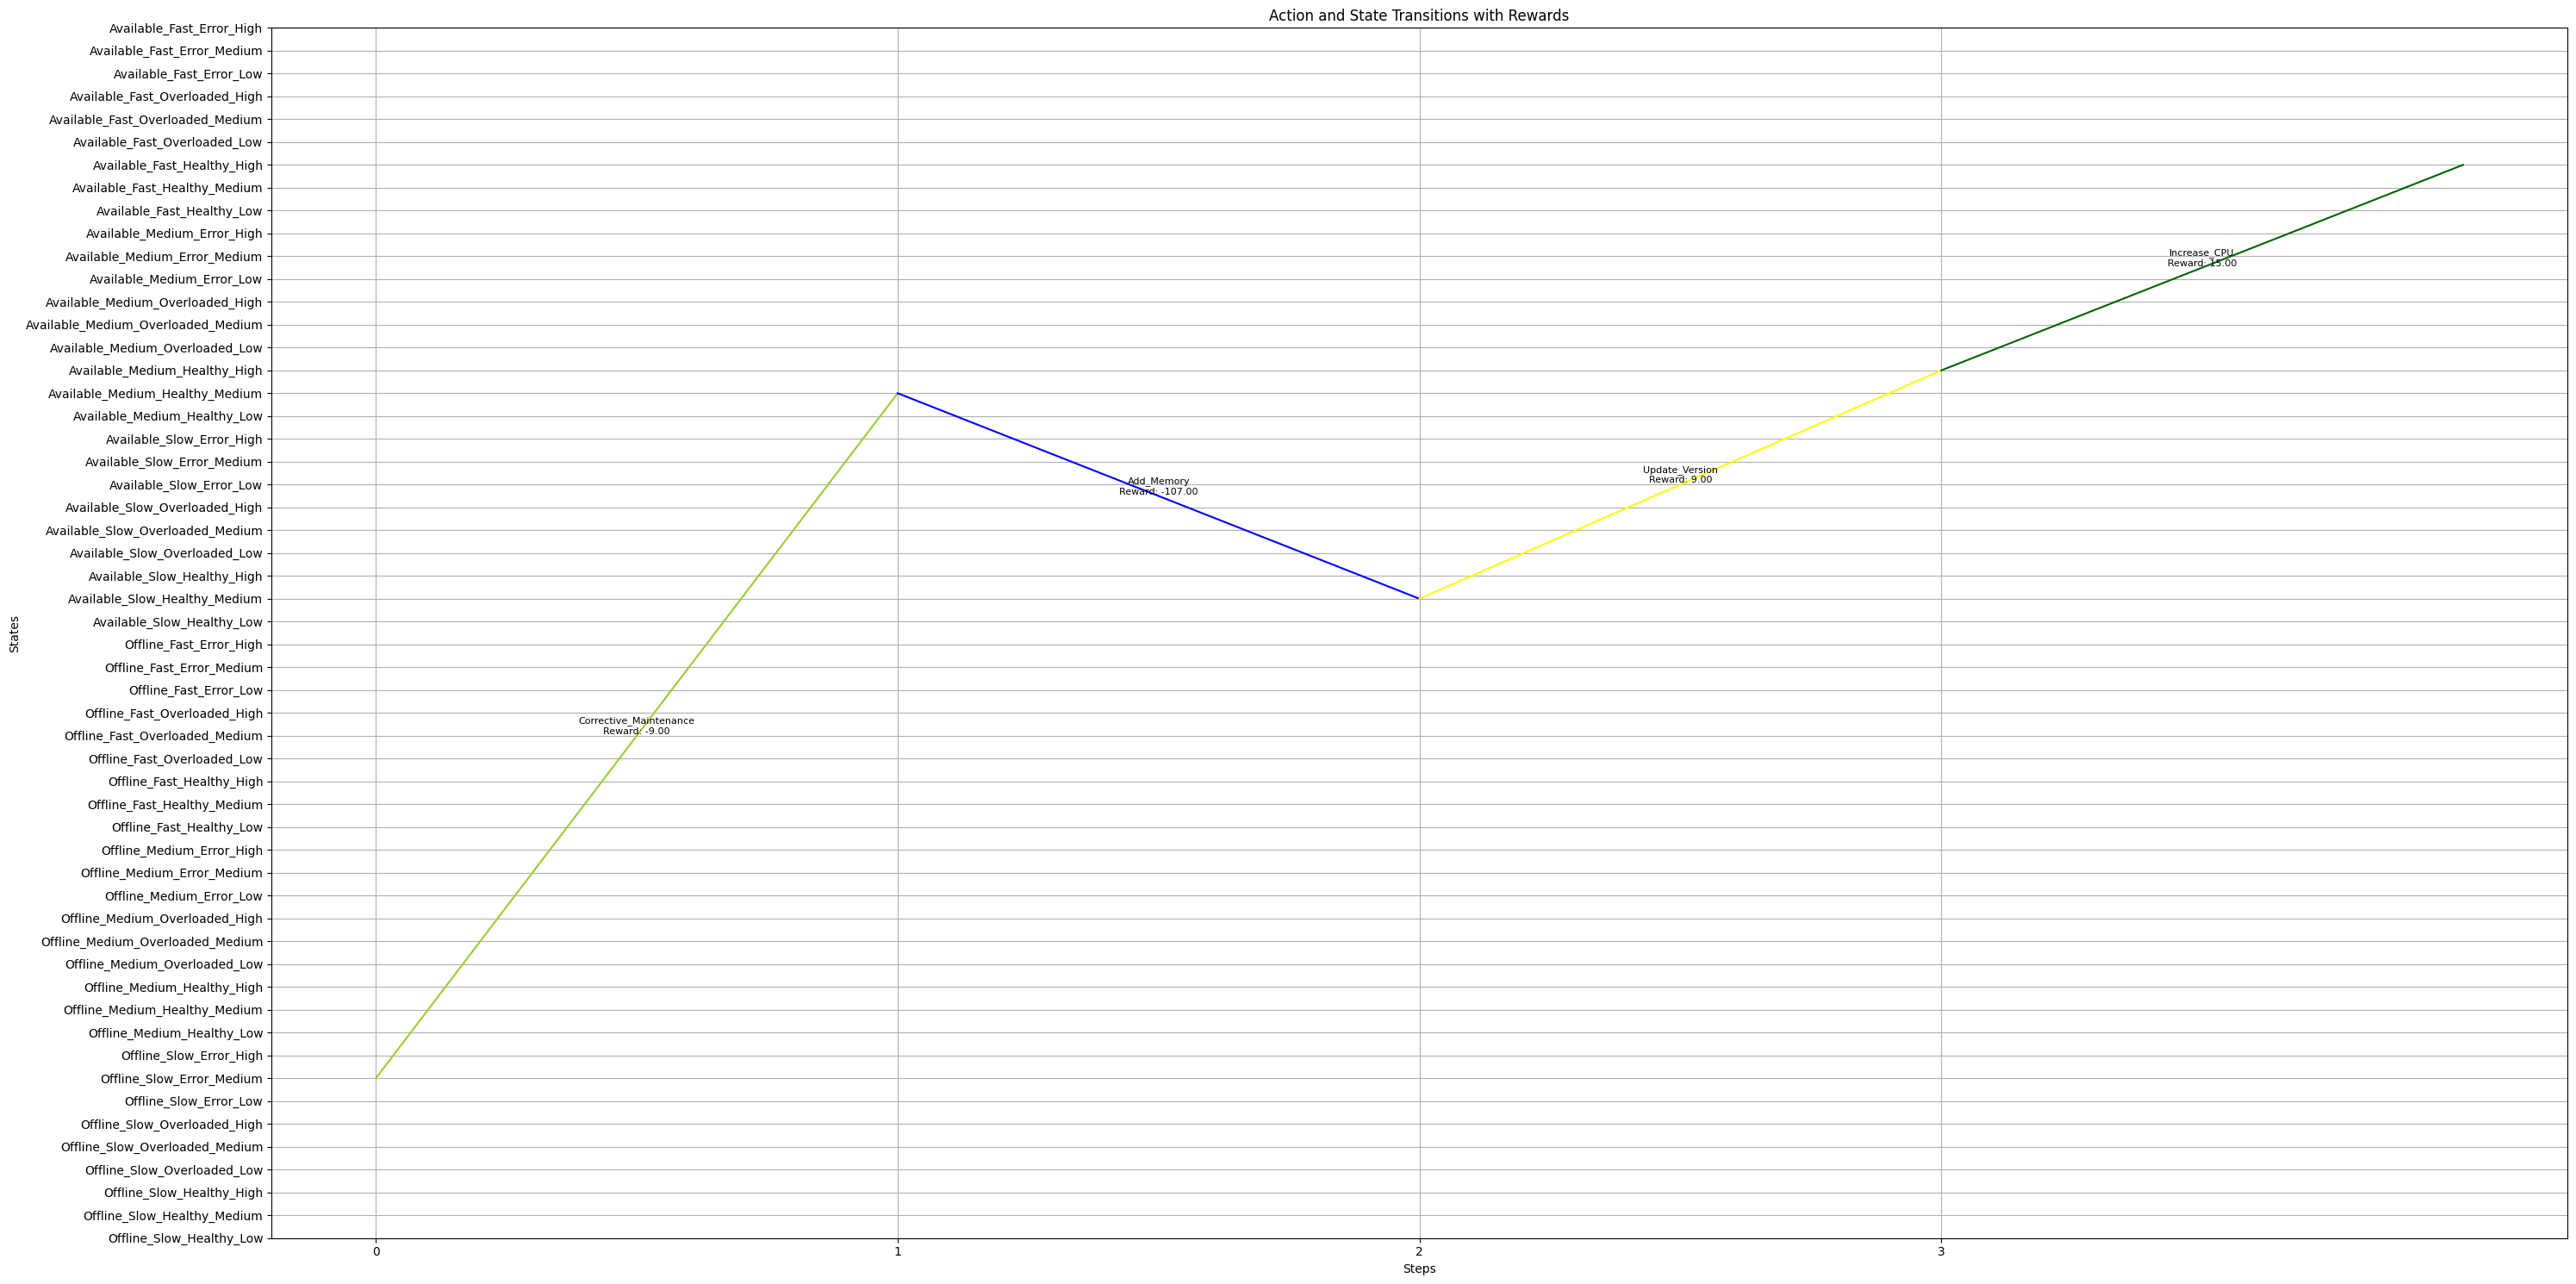

Somatório das recompensas: [-1312776.8938725332, -1219007.115738781, -1219007.115738781, -1219007.115738781]
Somatório das recompensas: -4969798.2410888765


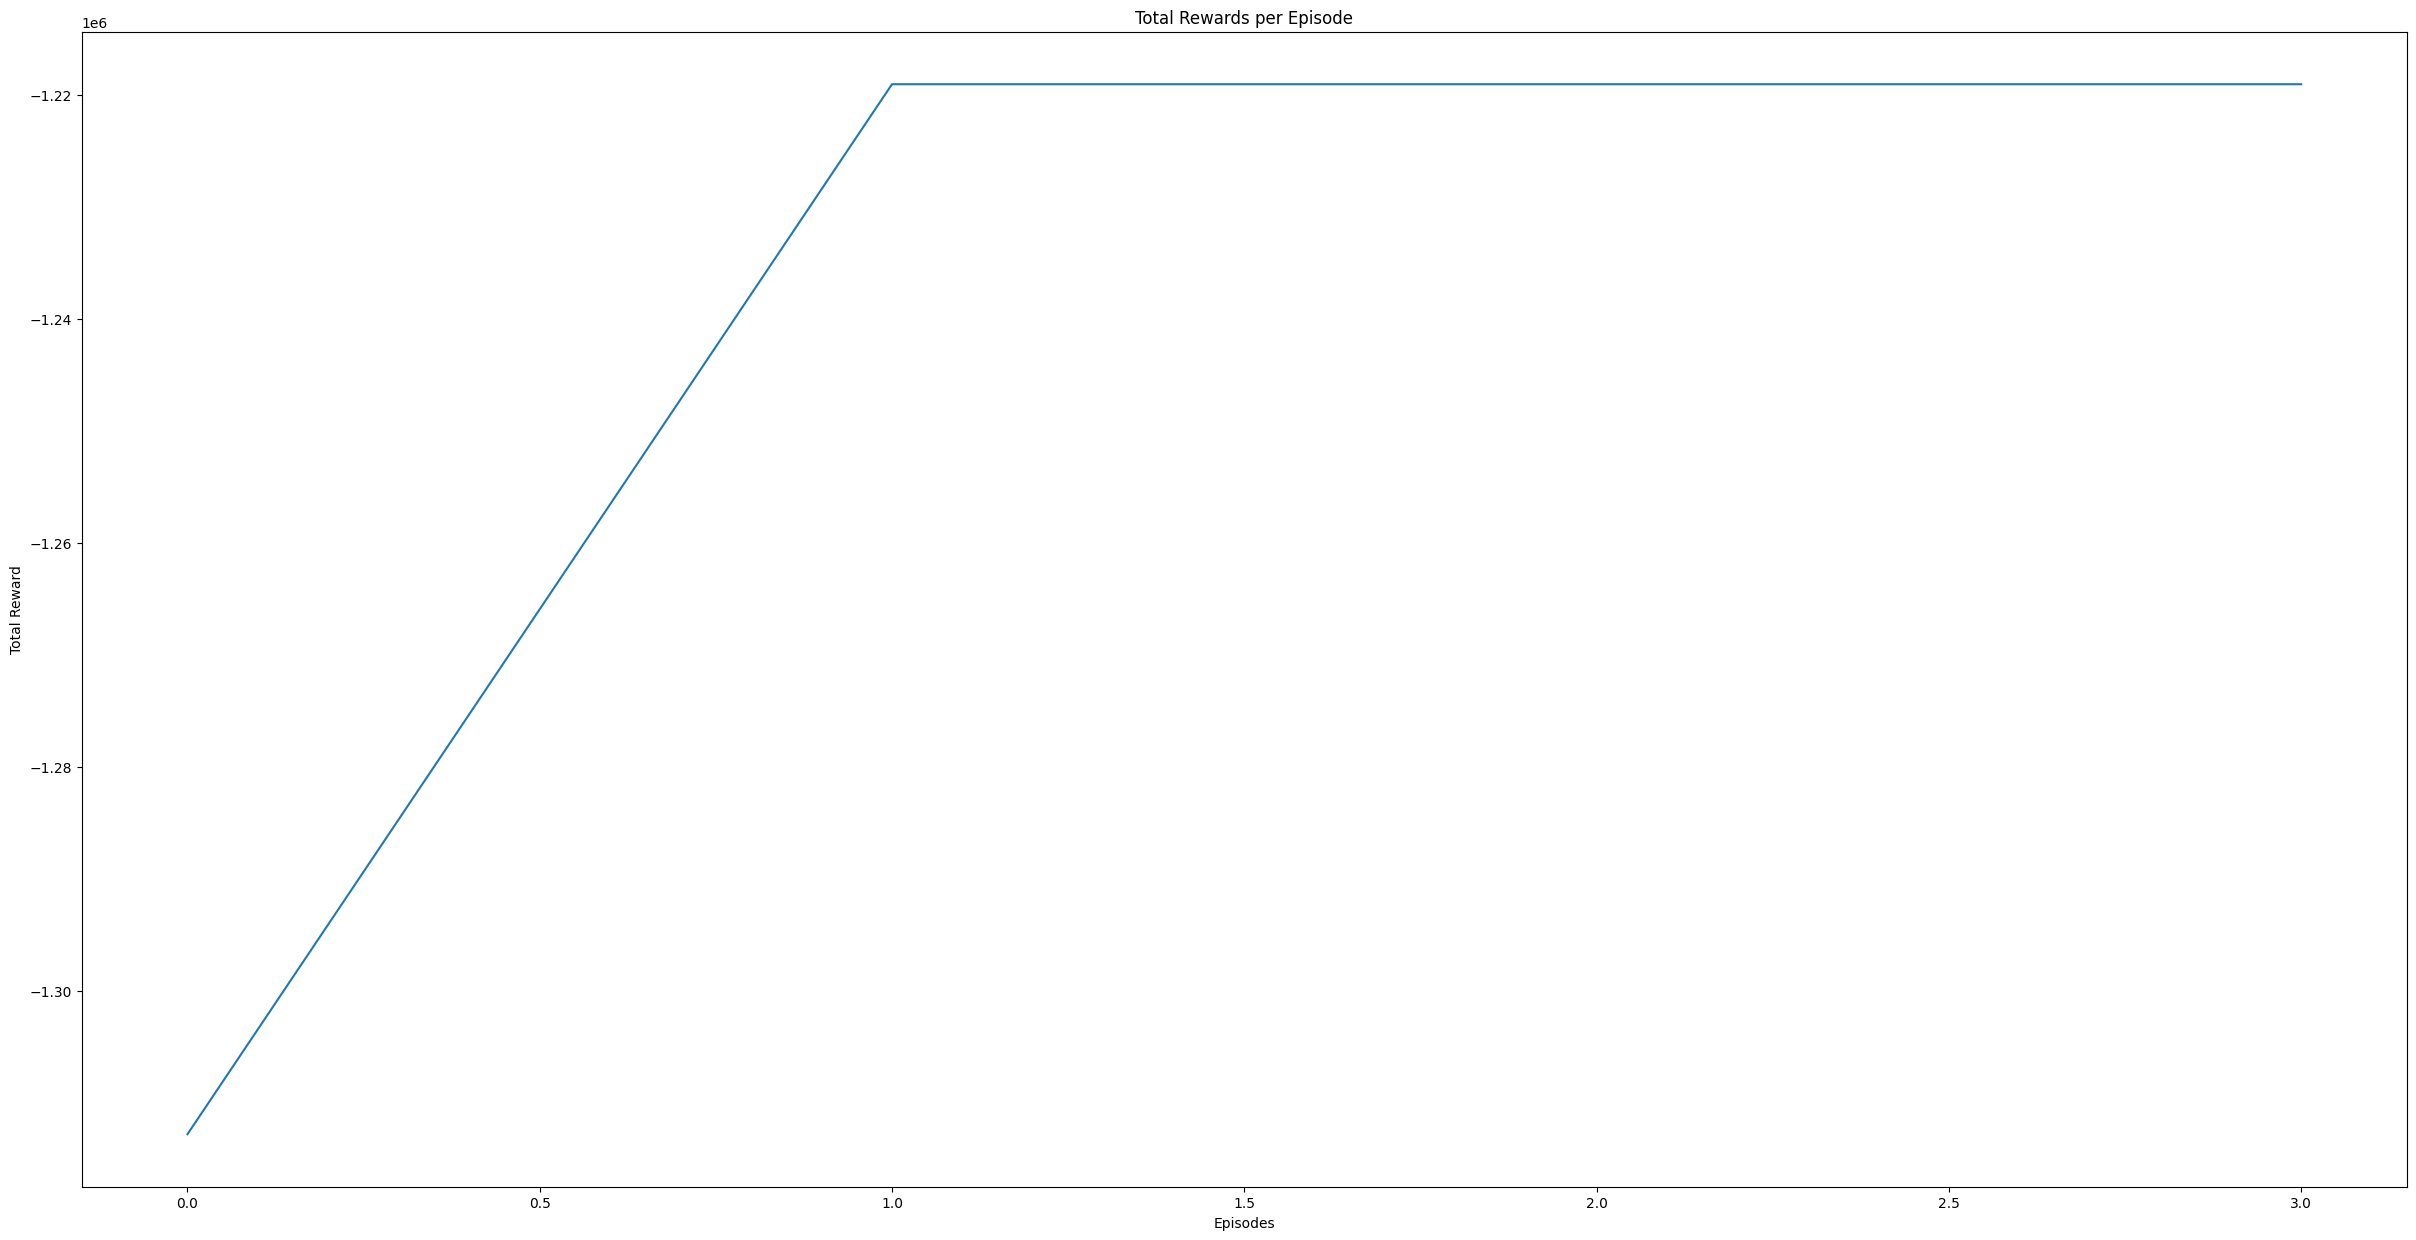

In [ ]:
# Executando Policy Improvement e visualizando o progresso
print("\nExecutando Policy Improvement...")
policy_pi, _, episode_rewards = policy_improvement(env, discount_factor=0.7, theta=0.4)
histories_pi, rewards_pi, total_rewards_pi = run_policy(env, policy_pi, num_episodes=1, num_steps=100)

# Visualizando o histórico e as recompensas do primeiro episódio
plot_action_state_history(histories_pi[0], rewards_pi[0], env)

# Visualizando as recompensas acumuladas em todos os episódios
plot_total_rewards(episode_rewards)

#### Experimento 2 -> Recompensa ficou mais baixa e ficou muito lento


Executando Policy Improvement...
Política estável após 6 iterações
Episode 1/1
Current API state: Offline_Slow_Error_Medium
Step 1: State=7, Action=4, Reward=-419, Next State=7
Current API state: Available_Medium_Healthy_Medium
Step 2: State=7, Action=4, Reward=-9, Next State=37
Current API state: Available_Medium_Healthy_High
Step 3: State=37, Action=9, Reward=-5, Next State=38
Current API state: Available_Fast_Healthy_High
Step 4: State=38, Action=0, Reward=15, Next State=47


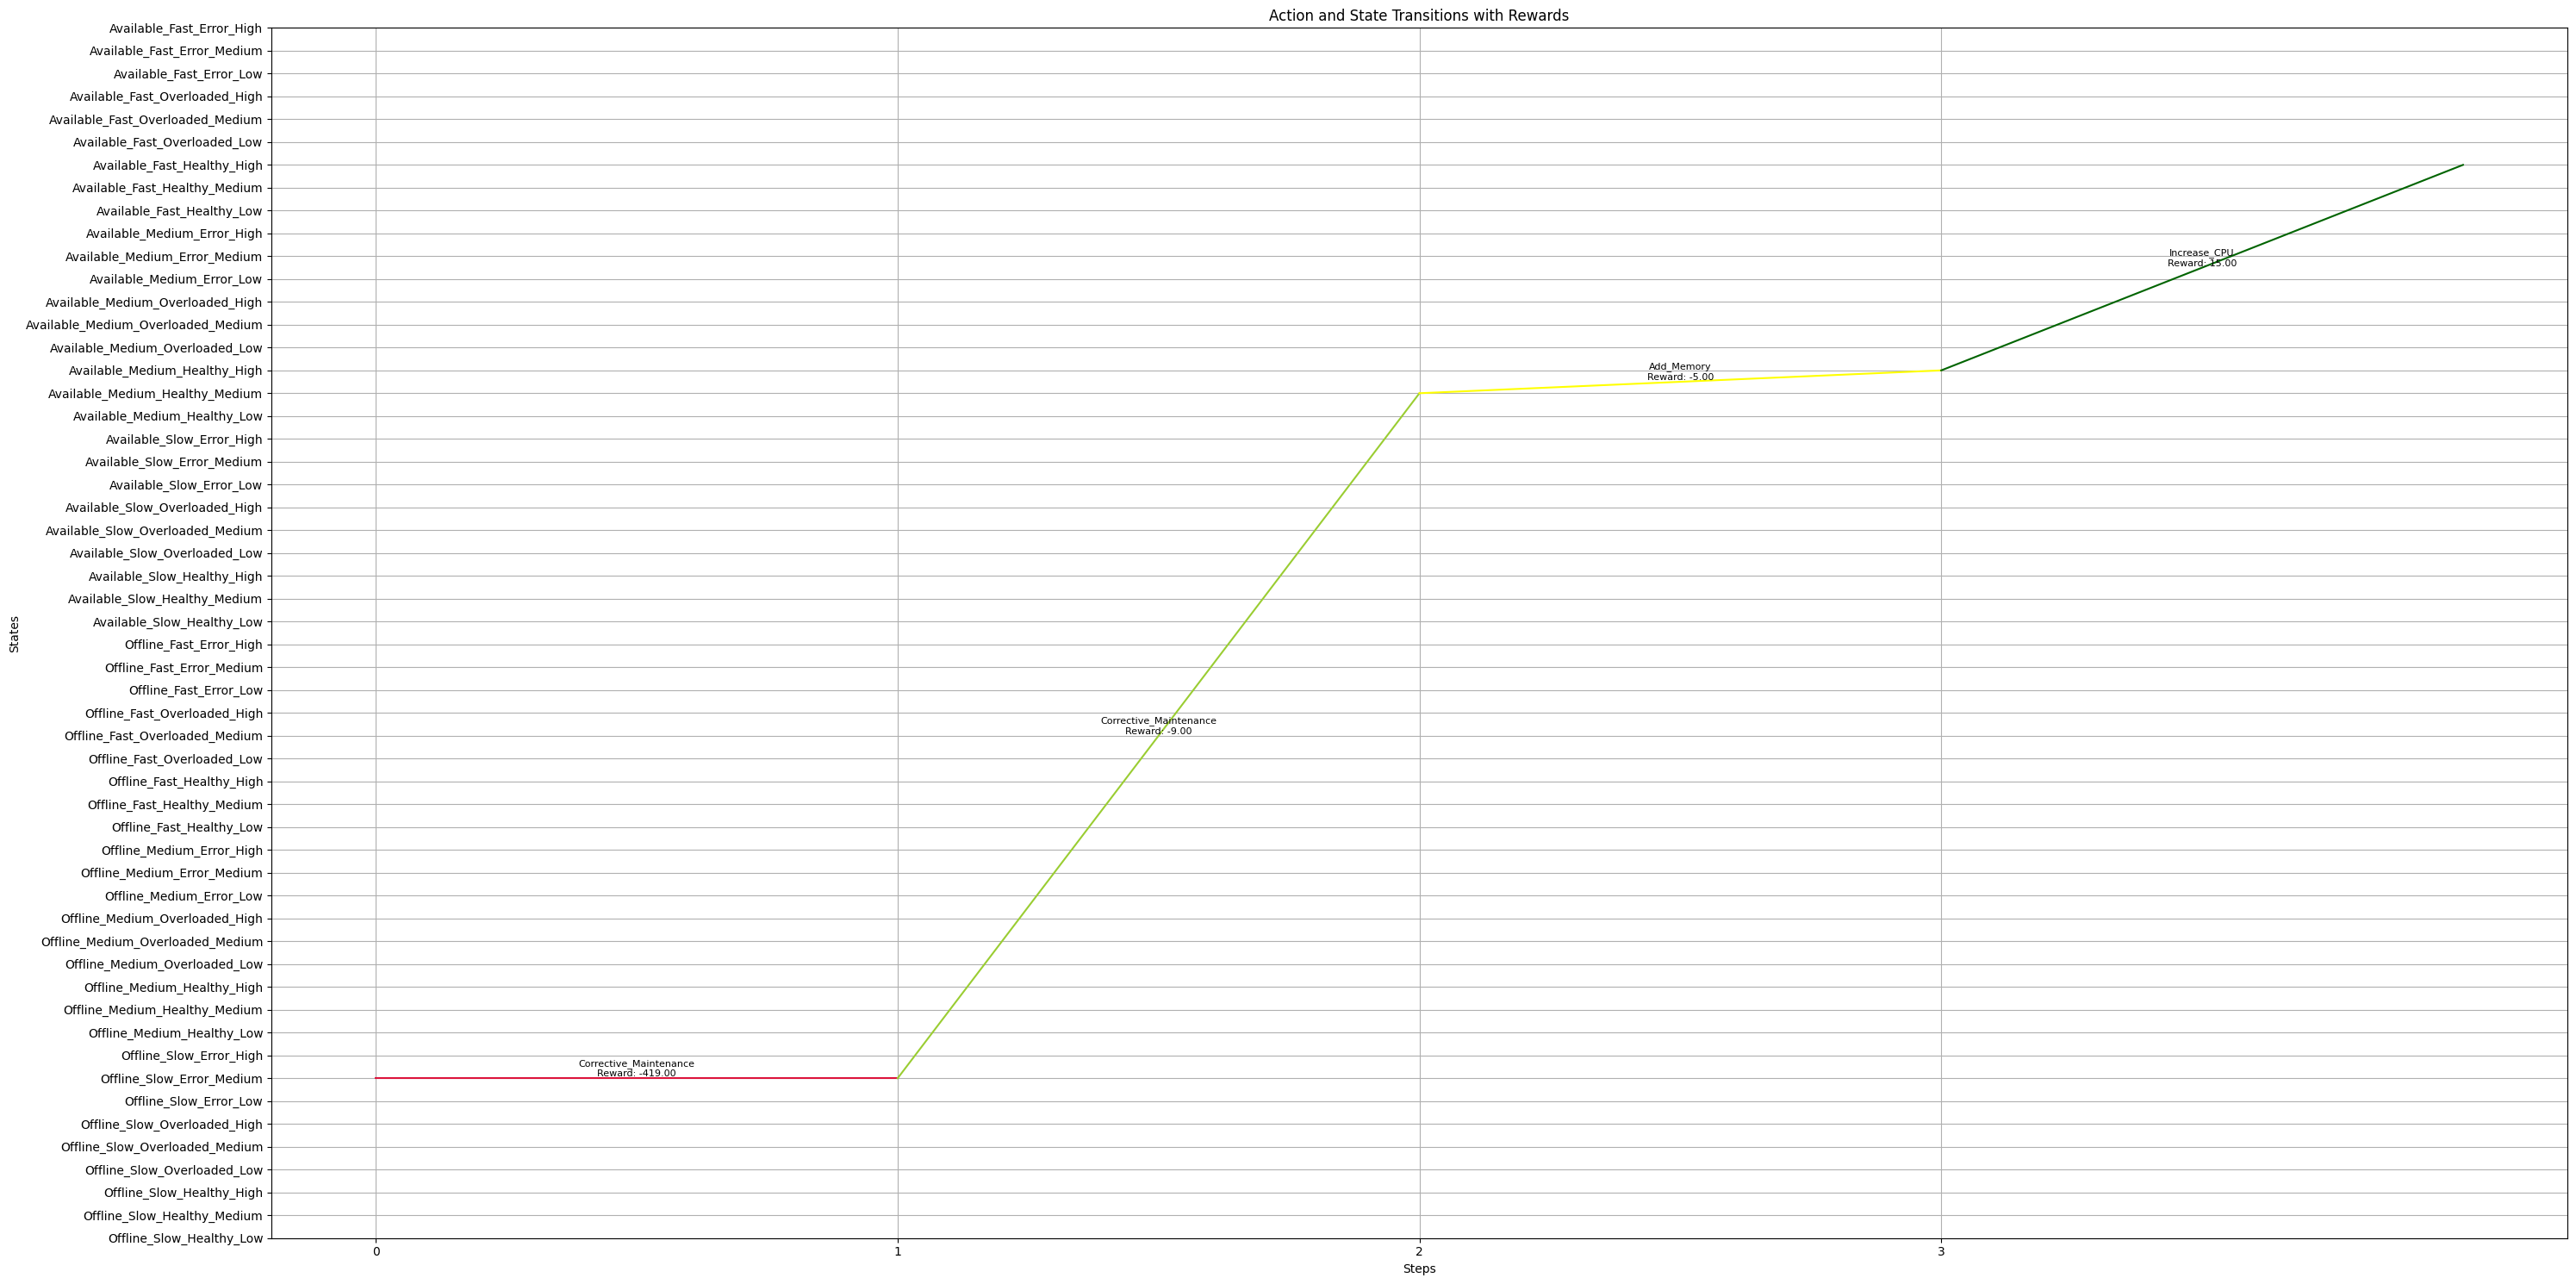

Somatório das recompensas: [-1177654643.5817962, -1596618012.2834015, -1596618012.2834015, -1596618012.2834015, -1596618012.2834015, -1596618012.2834015]
Somatório das recompensas: -9160744704.998804


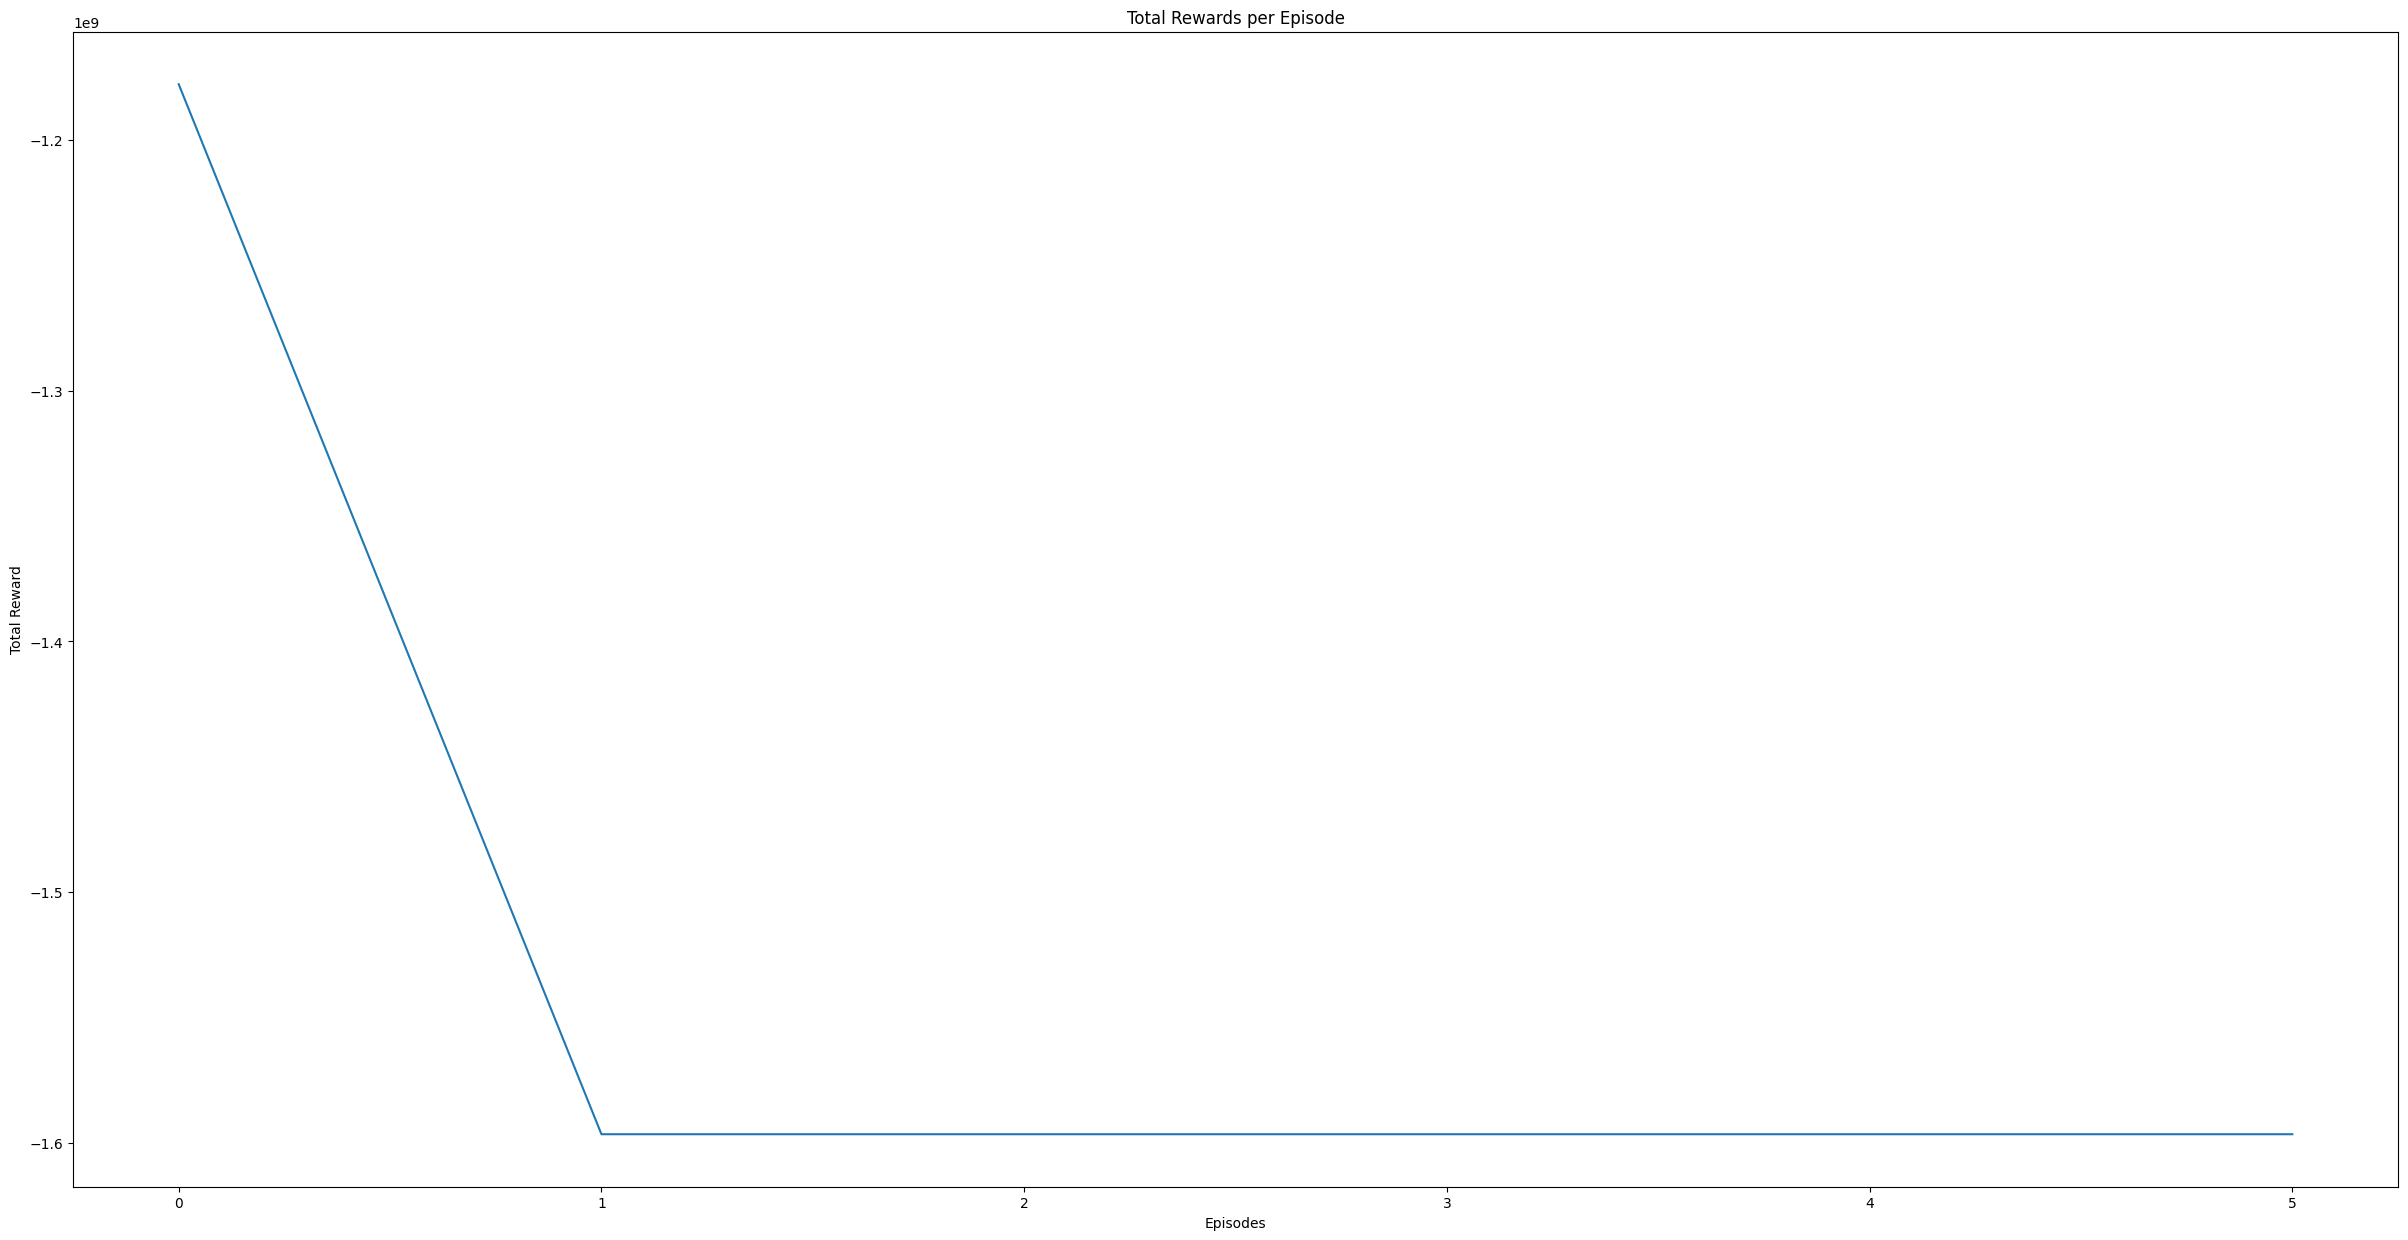

In [ ]:
# Executando Policy Improvement e visualizando o progresso
print("\nExecutando Policy Improvement...")
policy_pi, _, episode_rewards = policy_improvement(env, discount_factor=0.999, theta=0.000001)
histories_pi, rewards_pi, total_rewards_pi = run_policy(env, policy_pi, num_episodes=1, num_steps=10)

# Visualizando o histórico e as recompensas do primeiro episódio
plot_action_state_history(histories_pi[0], rewards_pi[0], env)

# Visualizando as recompensas acumuladas em todos os episódios
plot_total_rewards(episode_rewards)

#### Experimento 3 -> Resultado ruim, sem aprendizado


Executando Policy Improvement...
Política estável após 5 iterações
Episode 1/1
Current API state: Available_Medium_Healthy_Medium
Step 1: State=7, Action=4, Reward=-9, Next State=37
Current API state: Available_Medium_Healthy_High
Step 2: State=37, Action=9, Reward=-5, Next State=38
Current API state: Available_Fast_Healthy_High
Step 3: State=38, Action=0, Reward=15, Next State=47


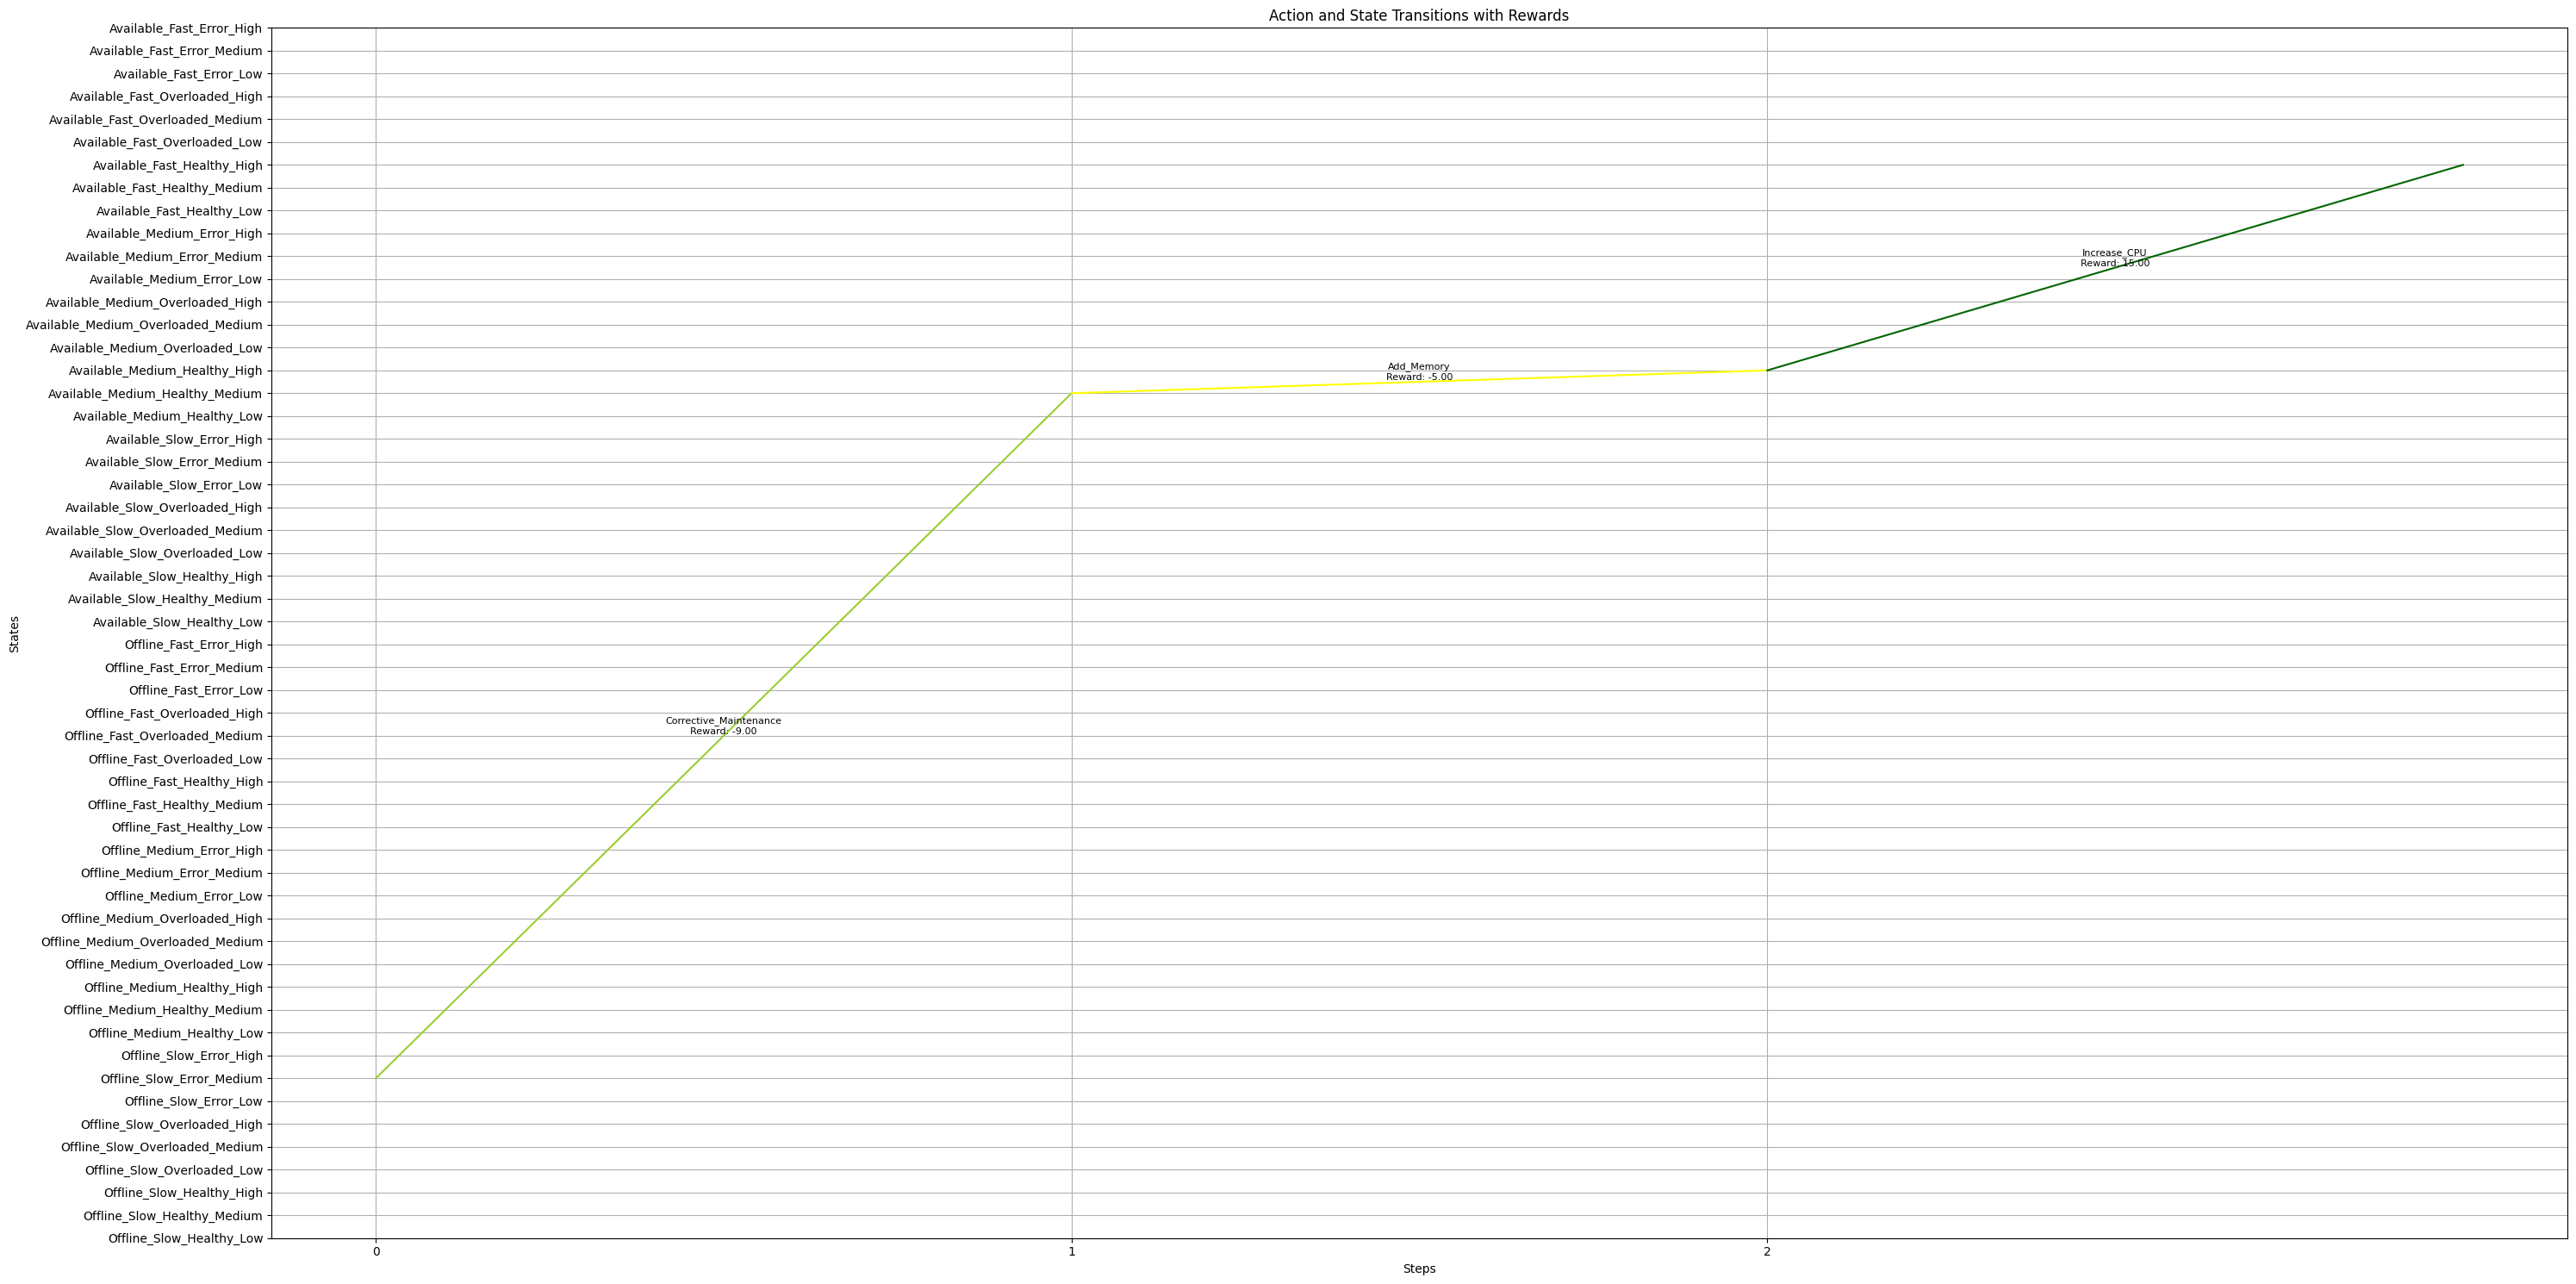

Somatório das recompensas: [-6001265.800560153, -7126503.138165183, -7126503.138165183, -7126503.138165183, -7126503.138165183]
Somatório das recompensas: -34507278.35322089


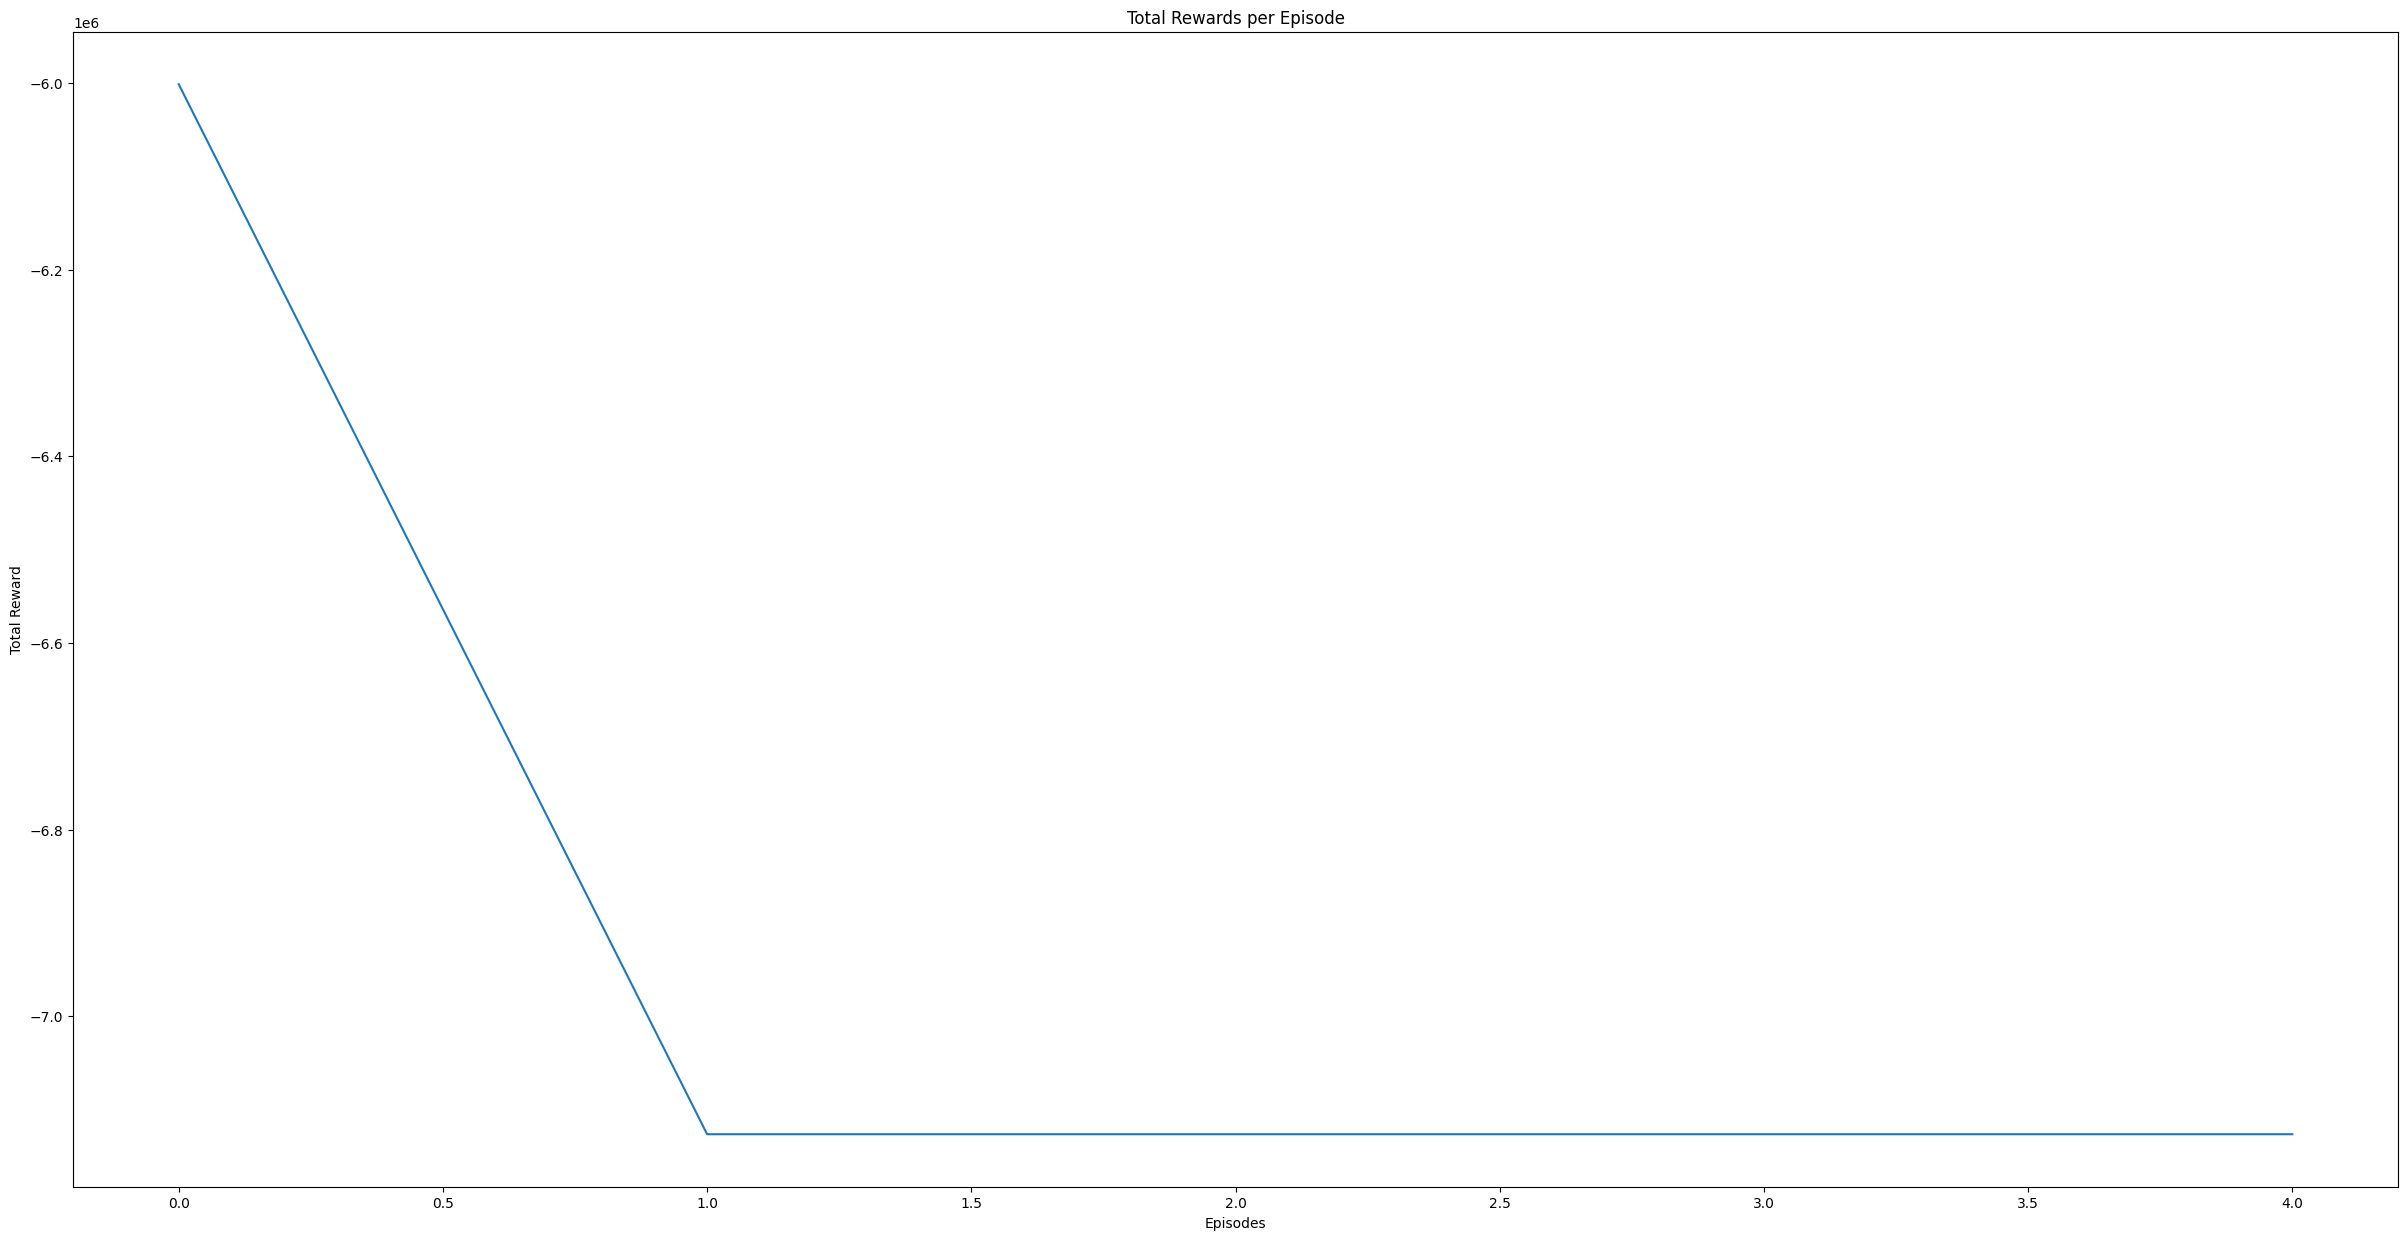

In [ ]:
# Executando Policy Improvement e visualizando o progresso
print("\nExecutando Policy Improvement...")
policy_pi, _, episode_rewards = policy_improvement(env, discount_factor=0.9, theta=0.01)
histories_pi, rewards_pi, total_rewards_pi = run_policy(env, policy_pi, num_episodes=1, num_steps=10)

# Visualizando o histórico e as recompensas do primeiro episódio
plot_action_state_history(histories_pi[0], rewards_pi[0], env)

# Visualizando as recompensas acumuladas em todos os episódios
plot_total_rewards(episode_rewards)

## Monte Carlo


In [ ]:
from src.algorithms.monte_carlo.utils import (
    plot_action_state_history_with_rewards,
    run_monte_carlo_policy,
)
from src.algorithms.monte_carlo.epsilon_greedy_control import mc_control_epsilon_greedy

In [ ]:
env.reset()

(7, {})

#### Experimento 1 -> Finalizou em um estado terminal, com um gráfico de aprendizado crescente.


Executando Monte Carlo Control...
Episode 1000/5000
Episode 2000/5000
Episode 3000/5000
Episode 4000/5000
Episode 5000/5000
Somatório das recompensas: [-5724, -44882, -9757, -2542, -537, -2787, -7237, -78343, -179778, -20239, -32955, -14634, -8311, -491, -2538, -10682, -1591, -801, -1165, -893, -1251, -3844, -2853, -2509, -5461, -1514, -569, -476, -2413, -1339, -1298, -676, -1277, -479, -1211, -595, -1930, -837, -887, -1596, -1110, -3966, -495, -1133, -1834, -4709, -583, -3690, -370, -370, -597, -1012, -597, -676, -2563, -1413, -1435, -1232, -1512, -495, -1342, -676, -268, -1397, -819, -2302, -1820, -626, -903, -1291, -1390, -1606, -807, -1563, -268, -494, -1900, -495, -1157, -1113, -1012, -1301, -1856, -1805, -1436, -1084, -2739, -738, -472, -936, -268, -1867, -370, -1346, -2724, -680, -982, -1010, -819, -370, -2902, -2329, -1005, -717, -802, -1300, -1602, -1056, -1390, -1036, -1084, -726, -2299, -2127, -2084, -1025, -3353, -2962, -922, -1209, -2526, -676, -1584, -595, -903, -473, -1

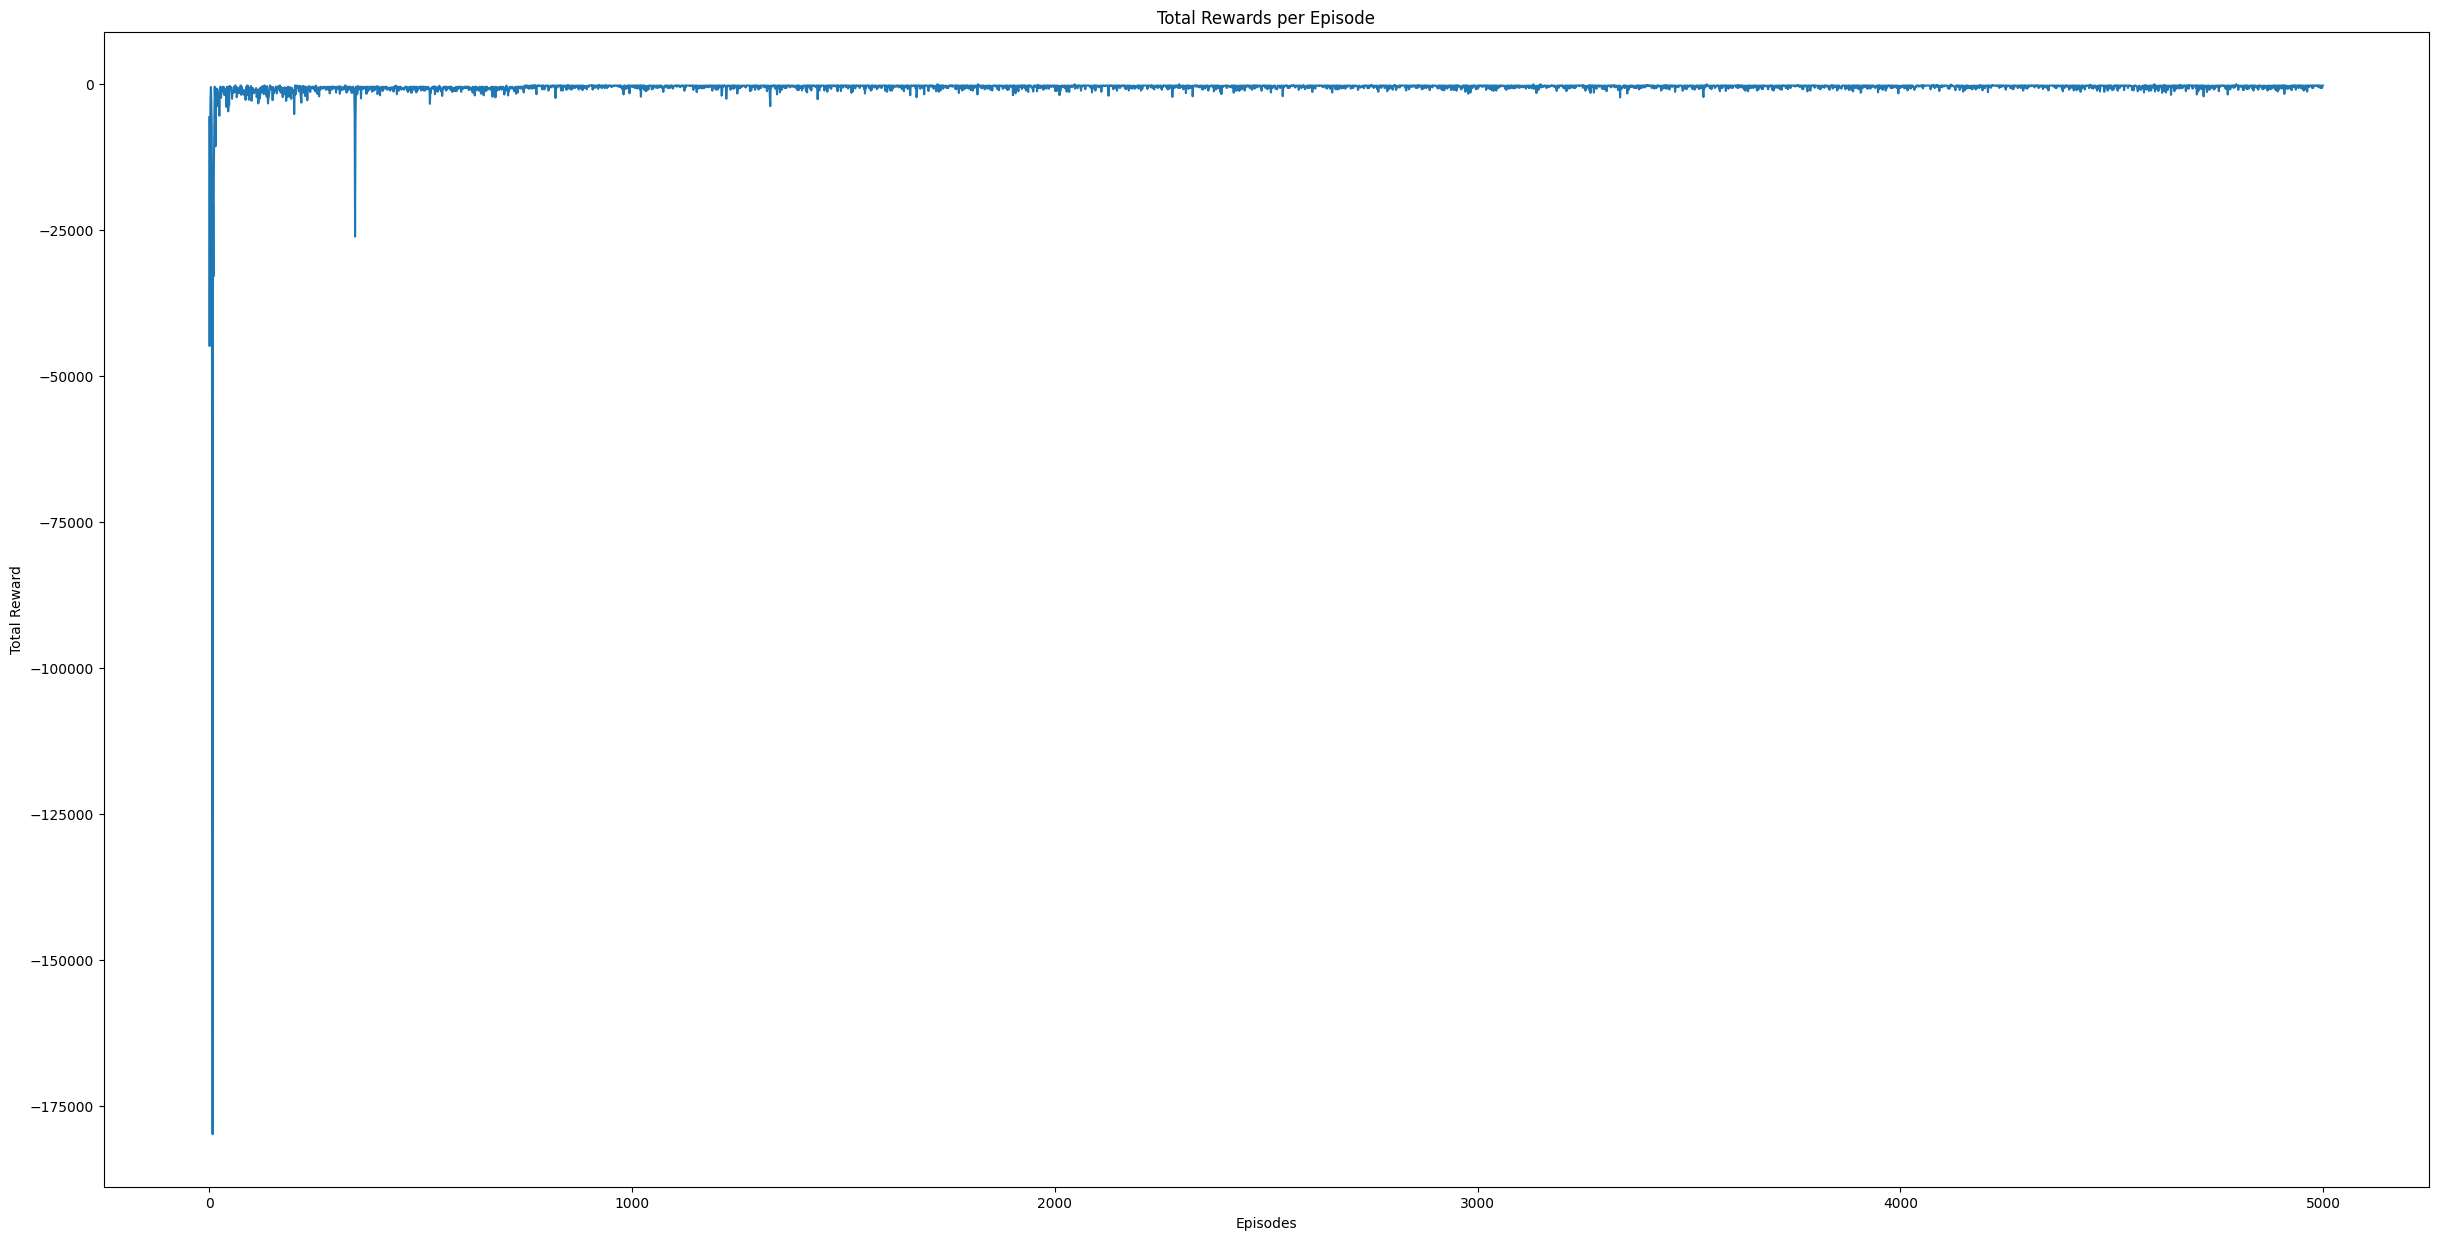

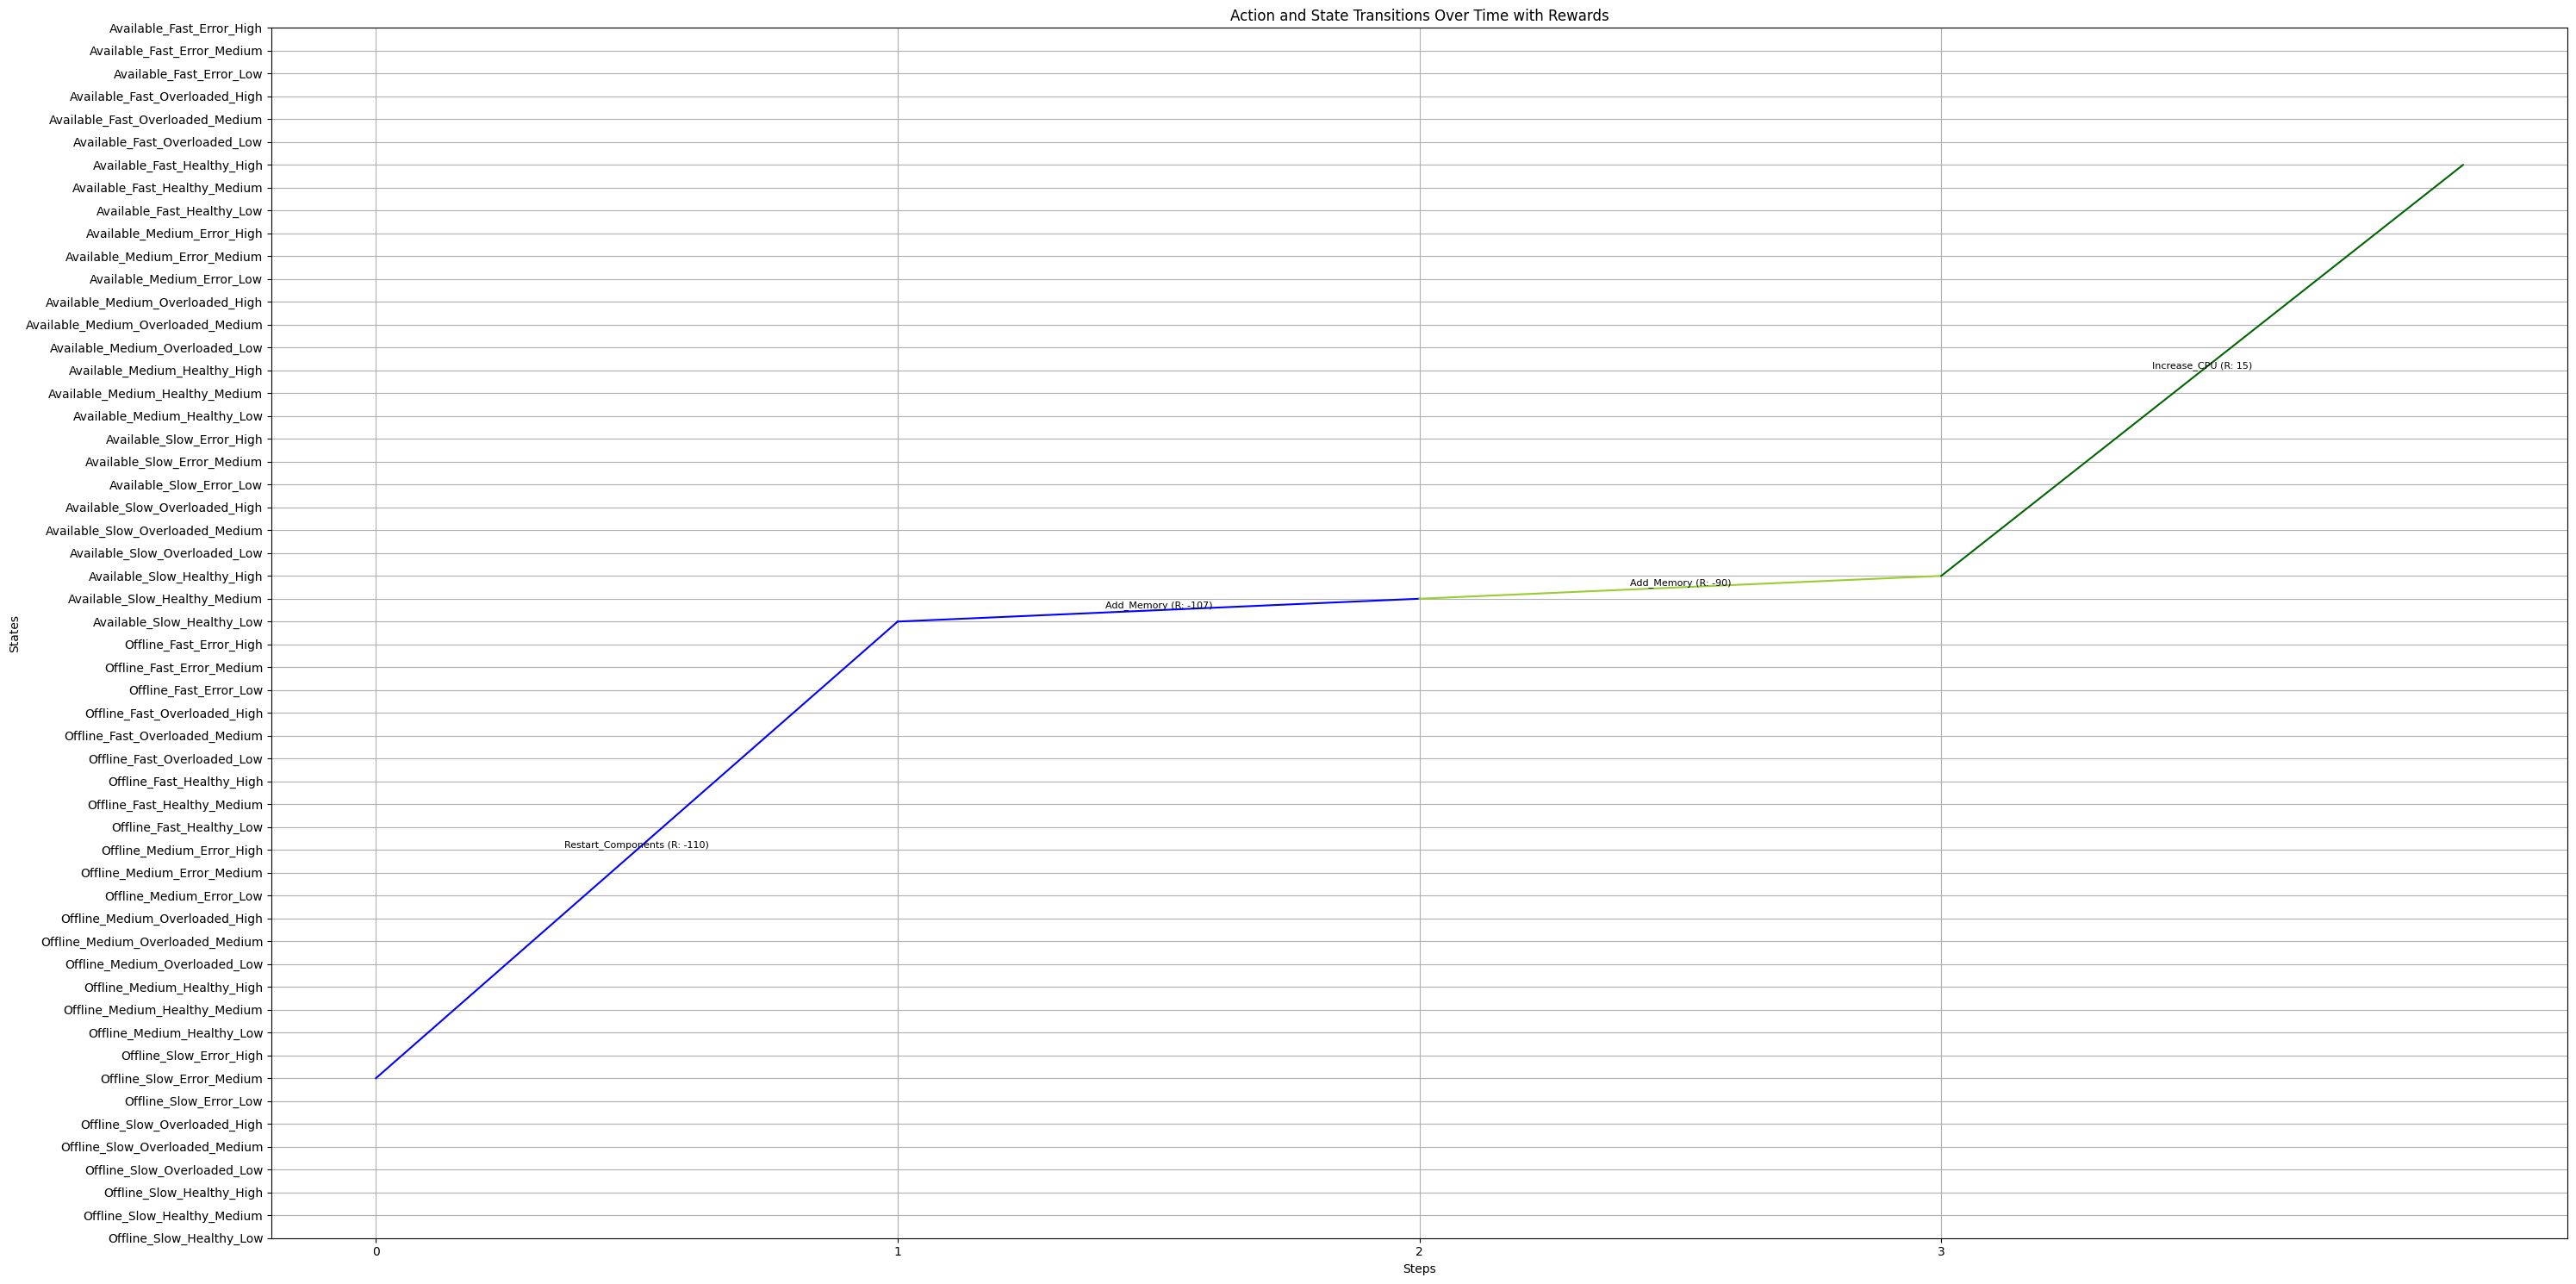

In [ ]:

discount_factor = 0.99
epsilon = 0.1
print("\nExecutando Monte Carlo Control...")
Q_mc, policy_mc, episode_rewards = mc_control_epsilon_greedy(env, 5000, discount_factor, epsilon)
total_rewards_mc, history_mc = run_monte_carlo_policy(
    env, policy_mc, num_episodes=1, num_steps=100
)

# Exibir recompensas totais por episódio
plot_total_rewards(episode_rewards)

# Exibir histórico de estados e ações com recompensas
plot_action_state_history_with_rewards(history_mc, env)

#### Experimento 2 -> Recompensa melhor que o anterior


Executando Monte Carlo Control...
Episode 1000/5000
Episode 2000/5000
Episode 3000/5000
Episode 4000/5000
Episode 5000/5000
Somatório das recompensas: [-47541, -45955, -26041, -14639, -18219, -48397, -15943, -3266, 15, -4635, -31211, -6155, -1706, -5088, -668, -1053, -4427, -288, -288, -292, -101, -181, -1369, -707, -390, -186, -1429, -2934, -1338, -1327, -432, -1958, -88, -3175, -914, -391, -84, -1206, -398, -883, -5355, -7830, -846, -1130, -1046, -615, -296, -84, -1002, -84, -744, -4333, -1370, -5089, -2230, 3, -1, -84, -730, 3, -1603, -193, -1935, -1040, -4131, 1, -76, -190, -7, -289, -2846, -438, -2304, -611, -900, -1580, -1275, -180, -480, -1504, -4157, -183, -1813, -1916, -477, -812, -711, -912, -691, -2655, -475, -153, -2470, -1059, -1247, -2562, -2107, -485, -1045, -1217, -379, 2, 15, -2269, -1109, 15, 15, 15, 15, 7, 15, 15, 15, -729, -1113, -708, -215, -1163, -804, 7, 15, 15, -710, 15, 15, -2588, -9, 15, 15, 15, -417, -908, 7, 15, 15, 15, 15, 15, 15, -404, -418, -3429, -2278,

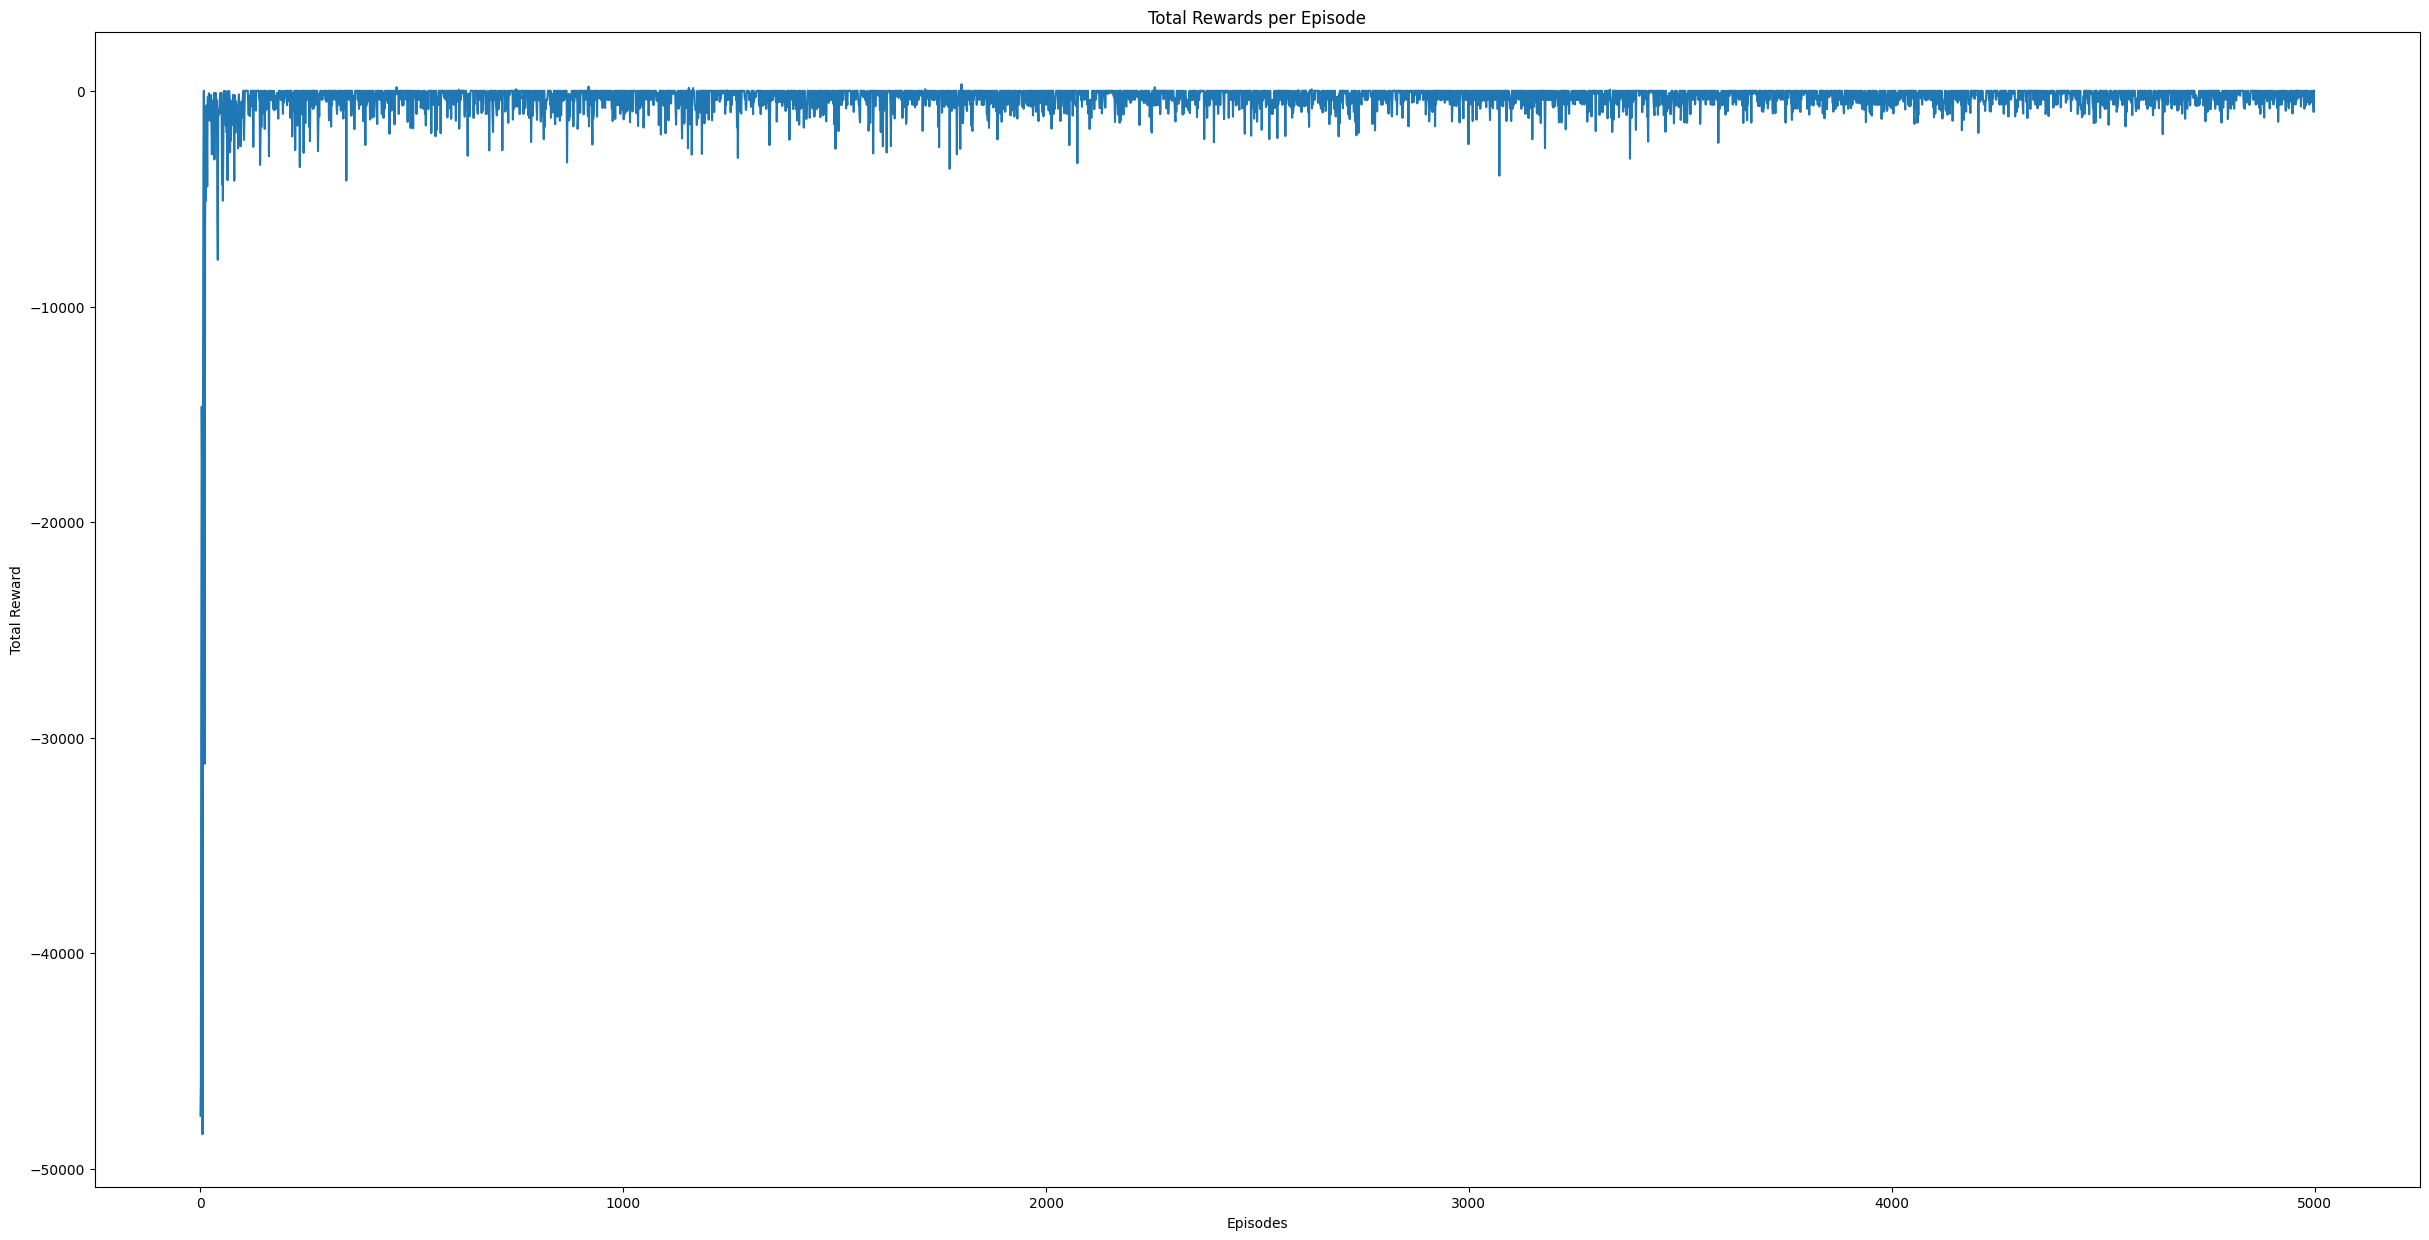

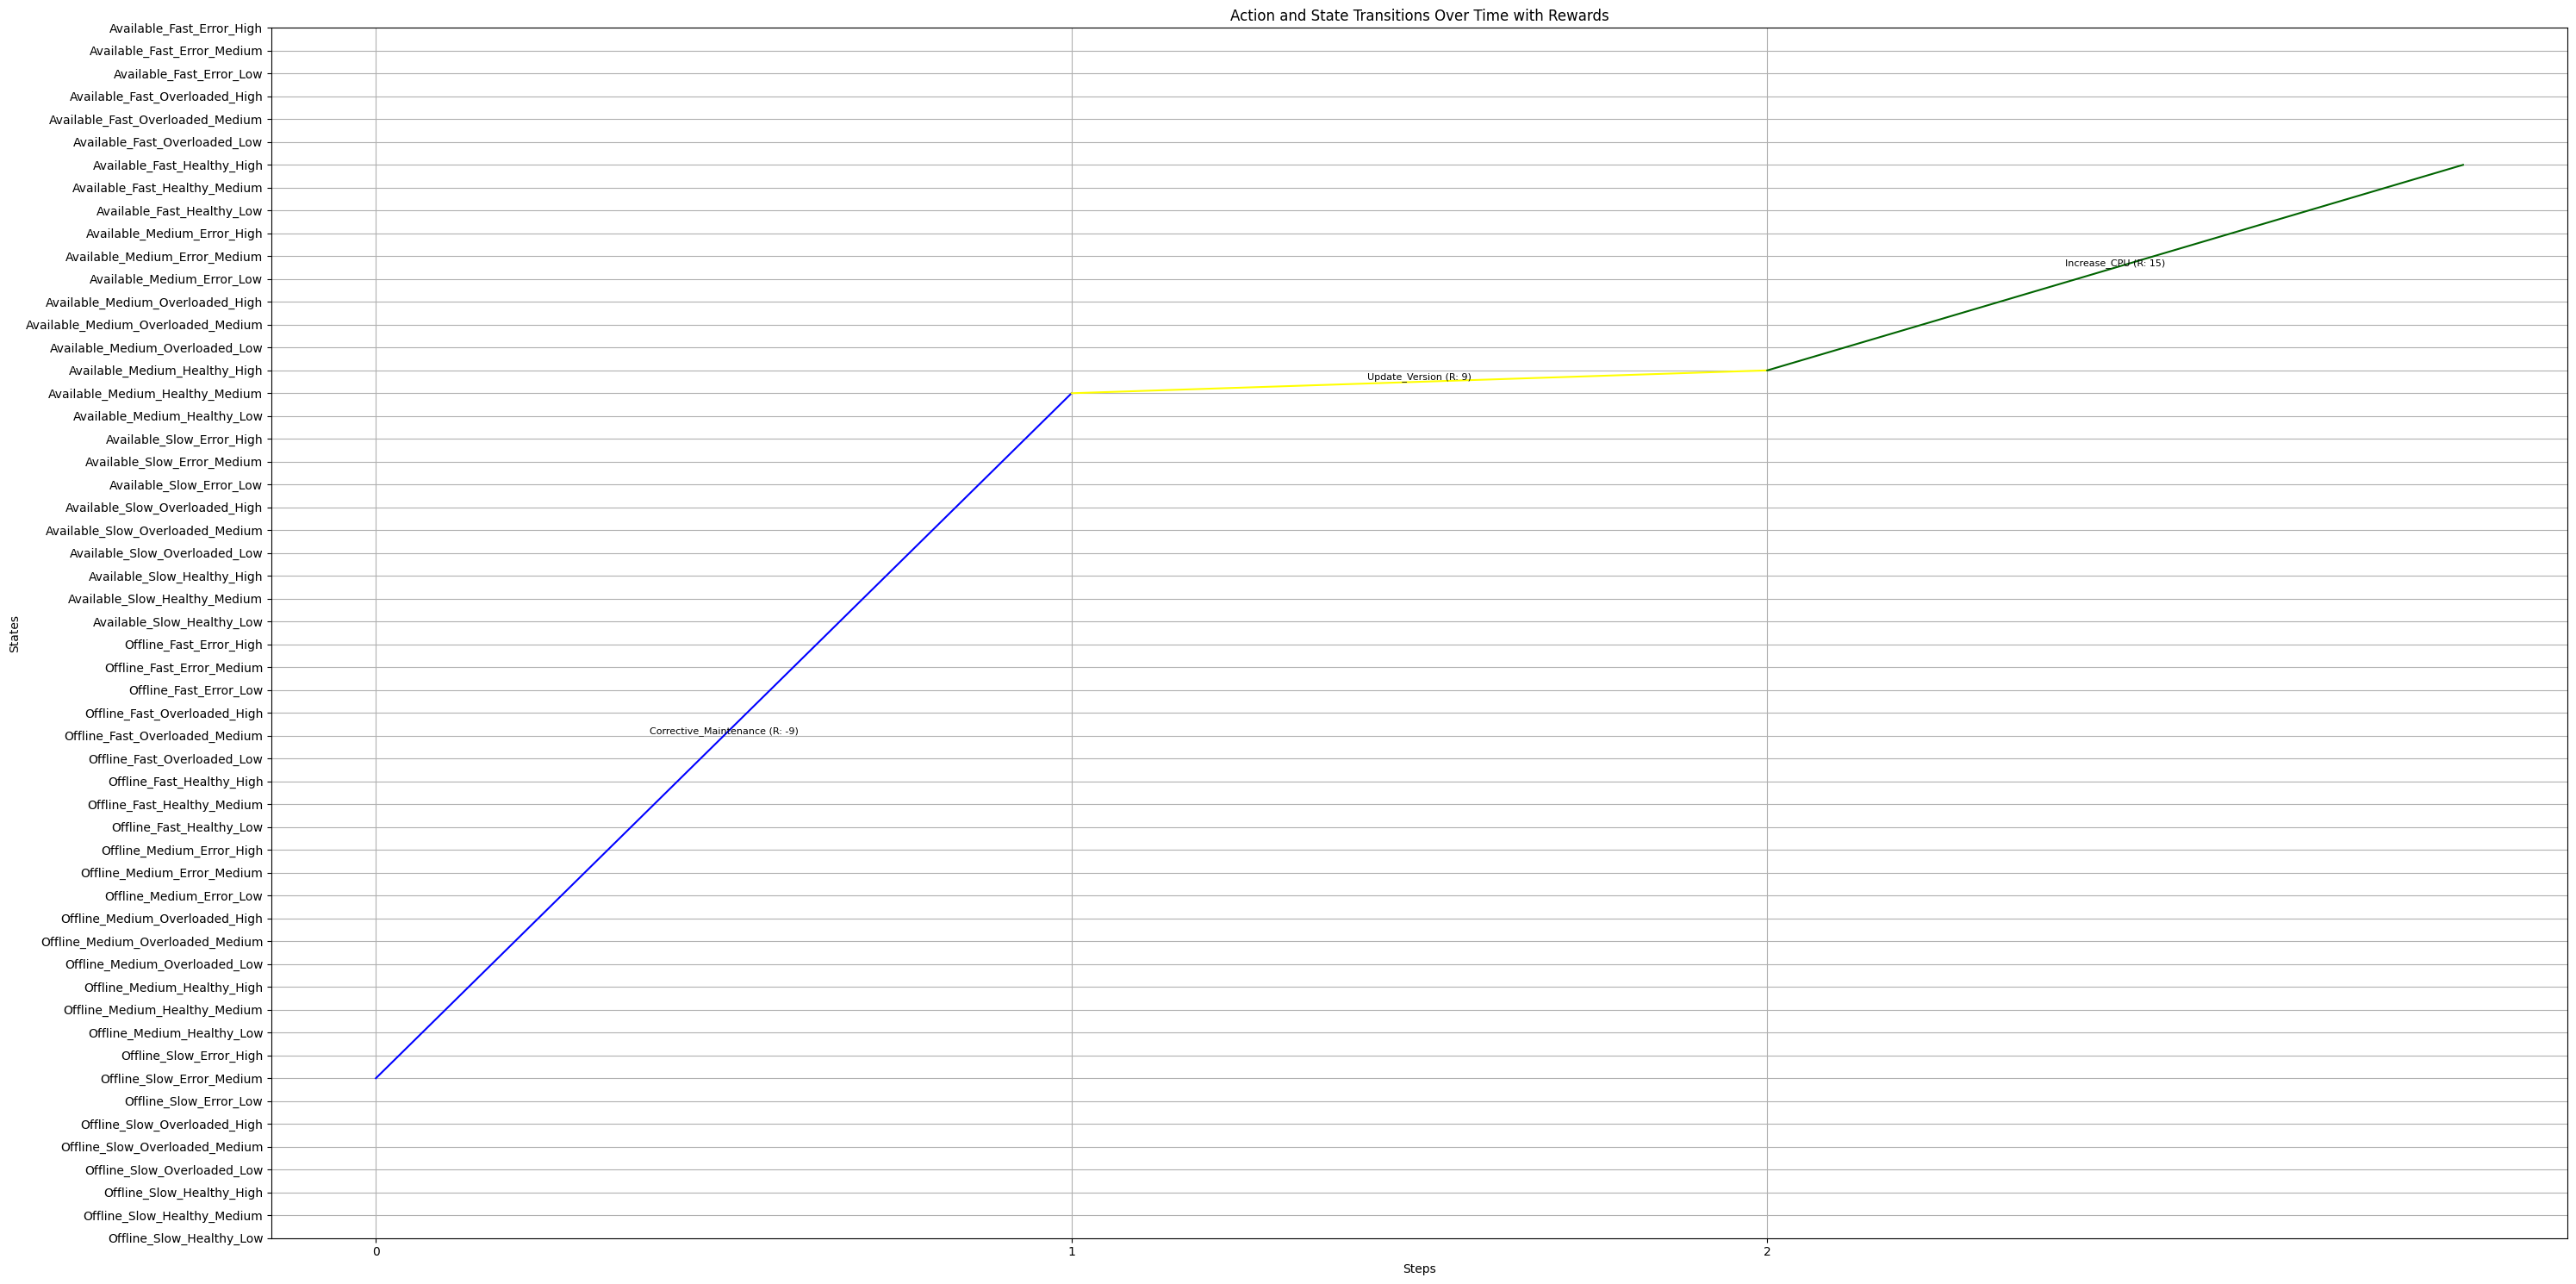

In [ ]:
num_episodes = 5000
num_steps = 10
discount_factor = 0.9
epsilon = 0.1
print("\nExecutando Monte Carlo Control...")
Q_mc, policy_mc, episode_rewards  = mc_control_epsilon_greedy(env, num_episodes, discount_factor, epsilon)

num_episodes = 1
num_steps = 10
total_rewards_mc, history_mc = run_monte_carlo_policy(
    env, policy_mc, num_episodes, num_steps
)

# Exibir recompensas totais por episódio
plot_total_rewards(episode_rewards)

# Exibir histórico de estados e ações com recompensas
plot_action_state_history_with_rewards(history_mc, env)

#### Experimento 3 -> Melor resultado até então porém sem muita diferença


Executando Monte Carlo Control...
Episode 1000/10000
Episode 2000/10000
Episode 3000/10000
Episode 4000/10000
Episode 5000/10000
Episode 6000/10000
Episode 7000/10000
Episode 8000/10000
Episode 9000/10000
Episode 10000/10000
Somatório das recompensas: [-30453, -8124, -23012, -2332, -41234, -3835, -12942, -262621, -35747, -92680, -8874, -237, -107, -2009, -358, -107, -107, -107, -107, -107, -207, -337, -116, -690, -570, -1093, -207, -107, -210, -142, -288, -107, -996, -107, -342, -540, -1424, -107, -535, -516, -8, -526, -959, -237, -535, -422, -107, -347, -895, -98, -2043, -342, -342, -232, -239, -140, -107, -206, -1721, -643, -963, -107, -573, -107, -207, -107, -98, -342, -207, -665, -107, -824, -538, -107, -107, -107, -767, -936, -1132, -107, -137, -342, -1045, -223, -961, -107, -627, -168, -107, -704, -107, -1122, -1945, -558, -646, -107, -107, -278, -413, -112, -102, -107, -107, 1, -530, -98, -107, -701, -1724, -107, -107, -535, -107, -107, -533, -107, -107, -342, -232, -107, -801,

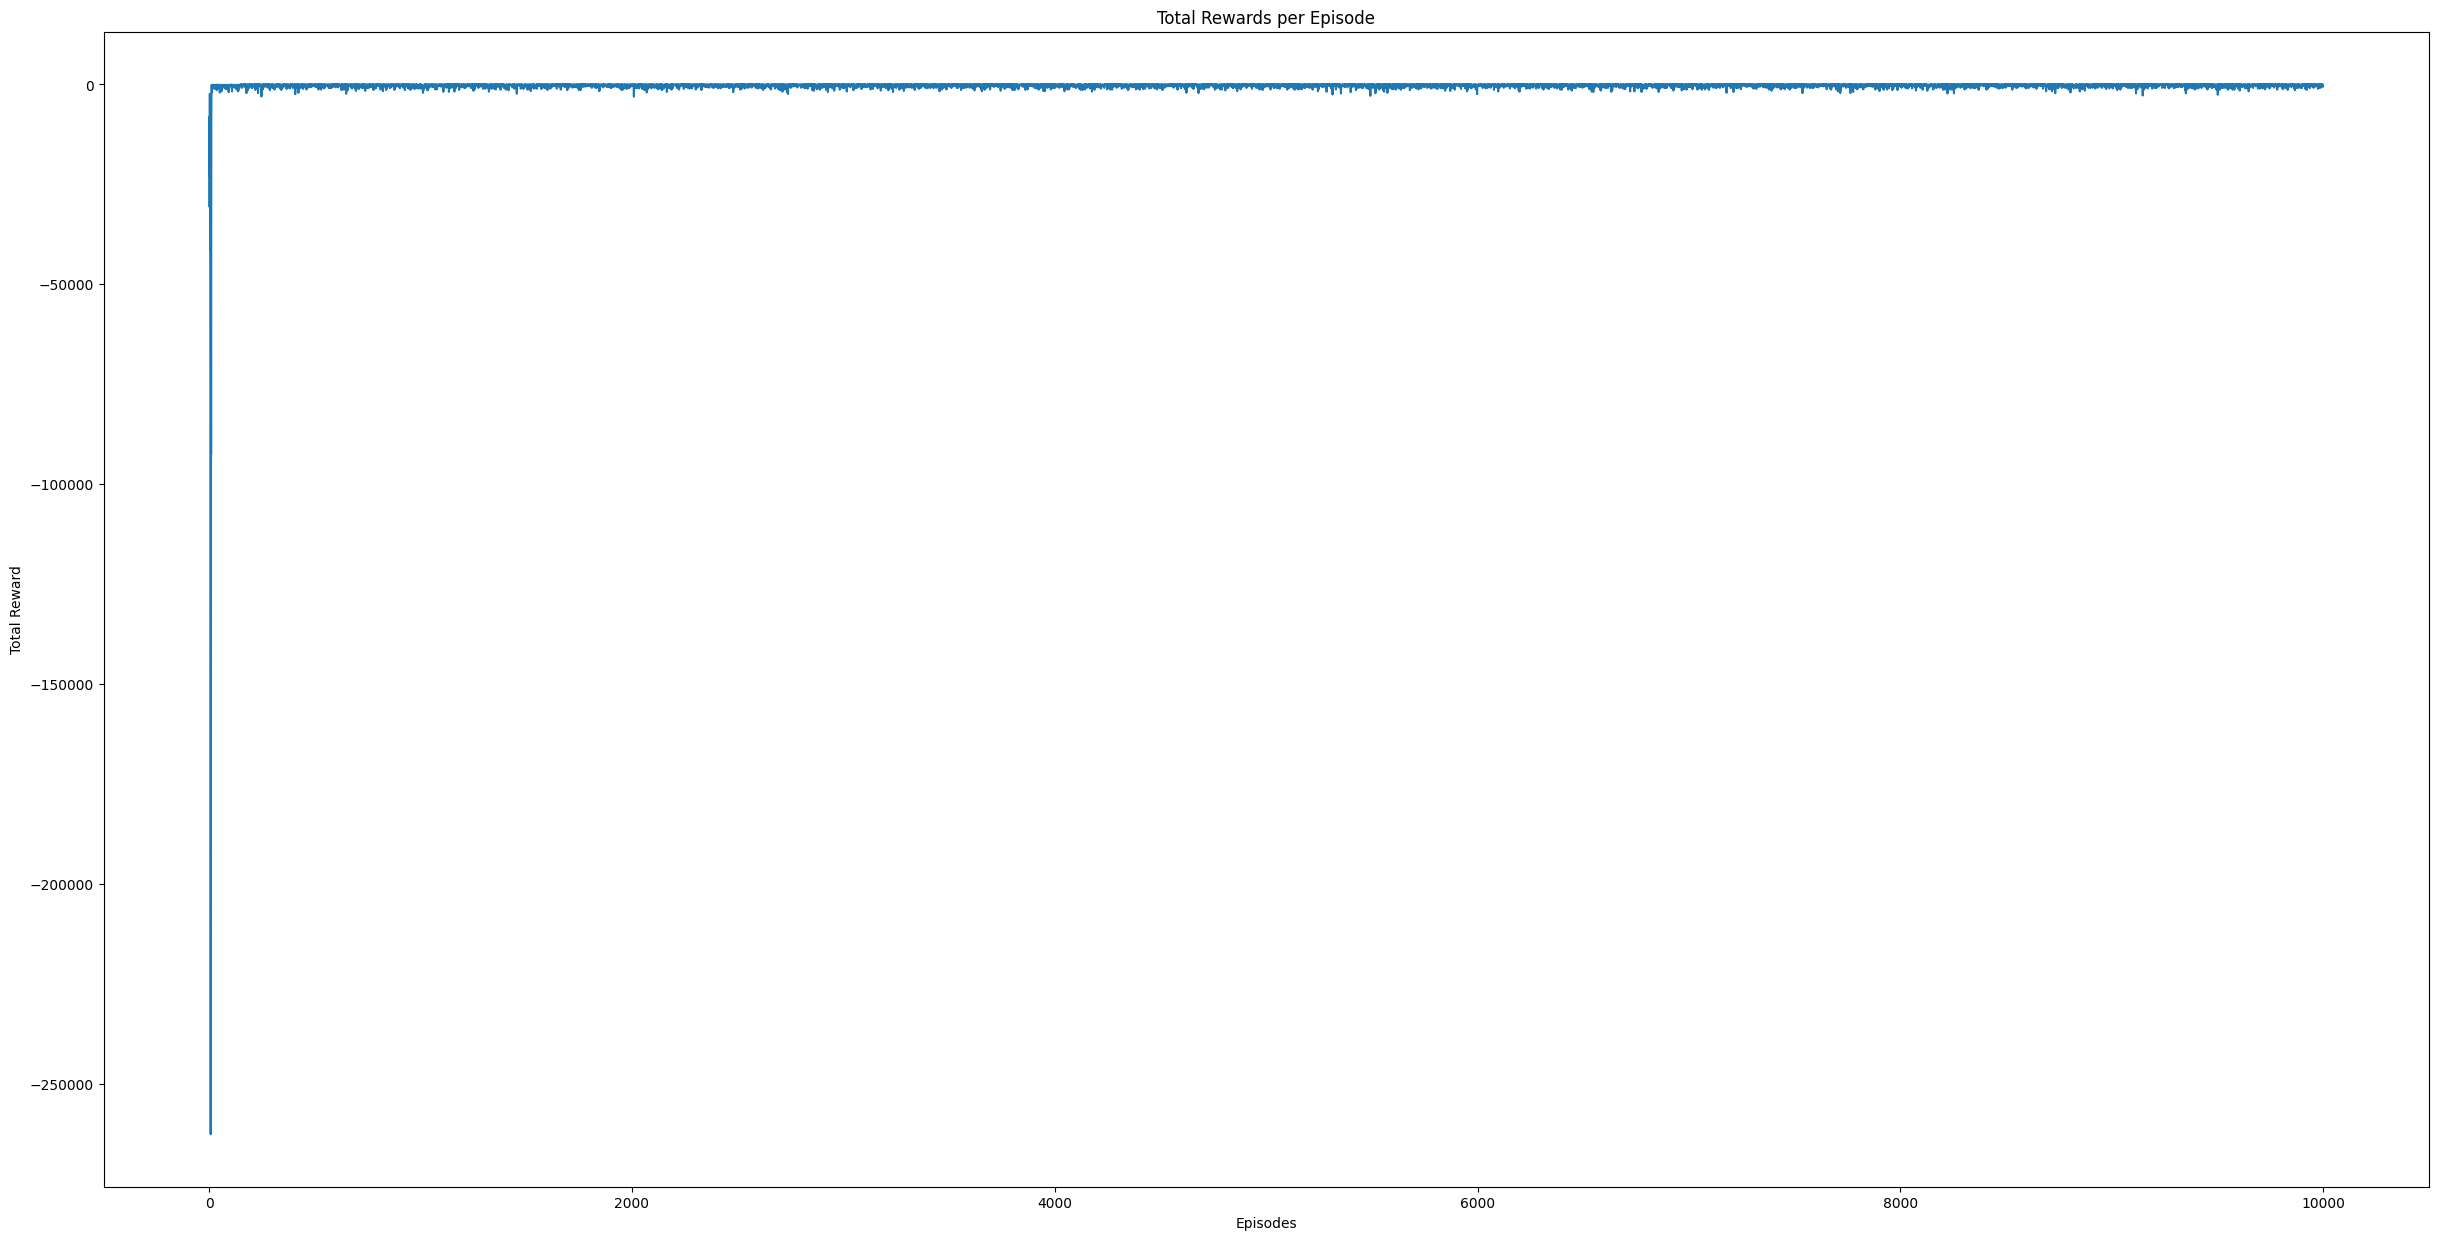

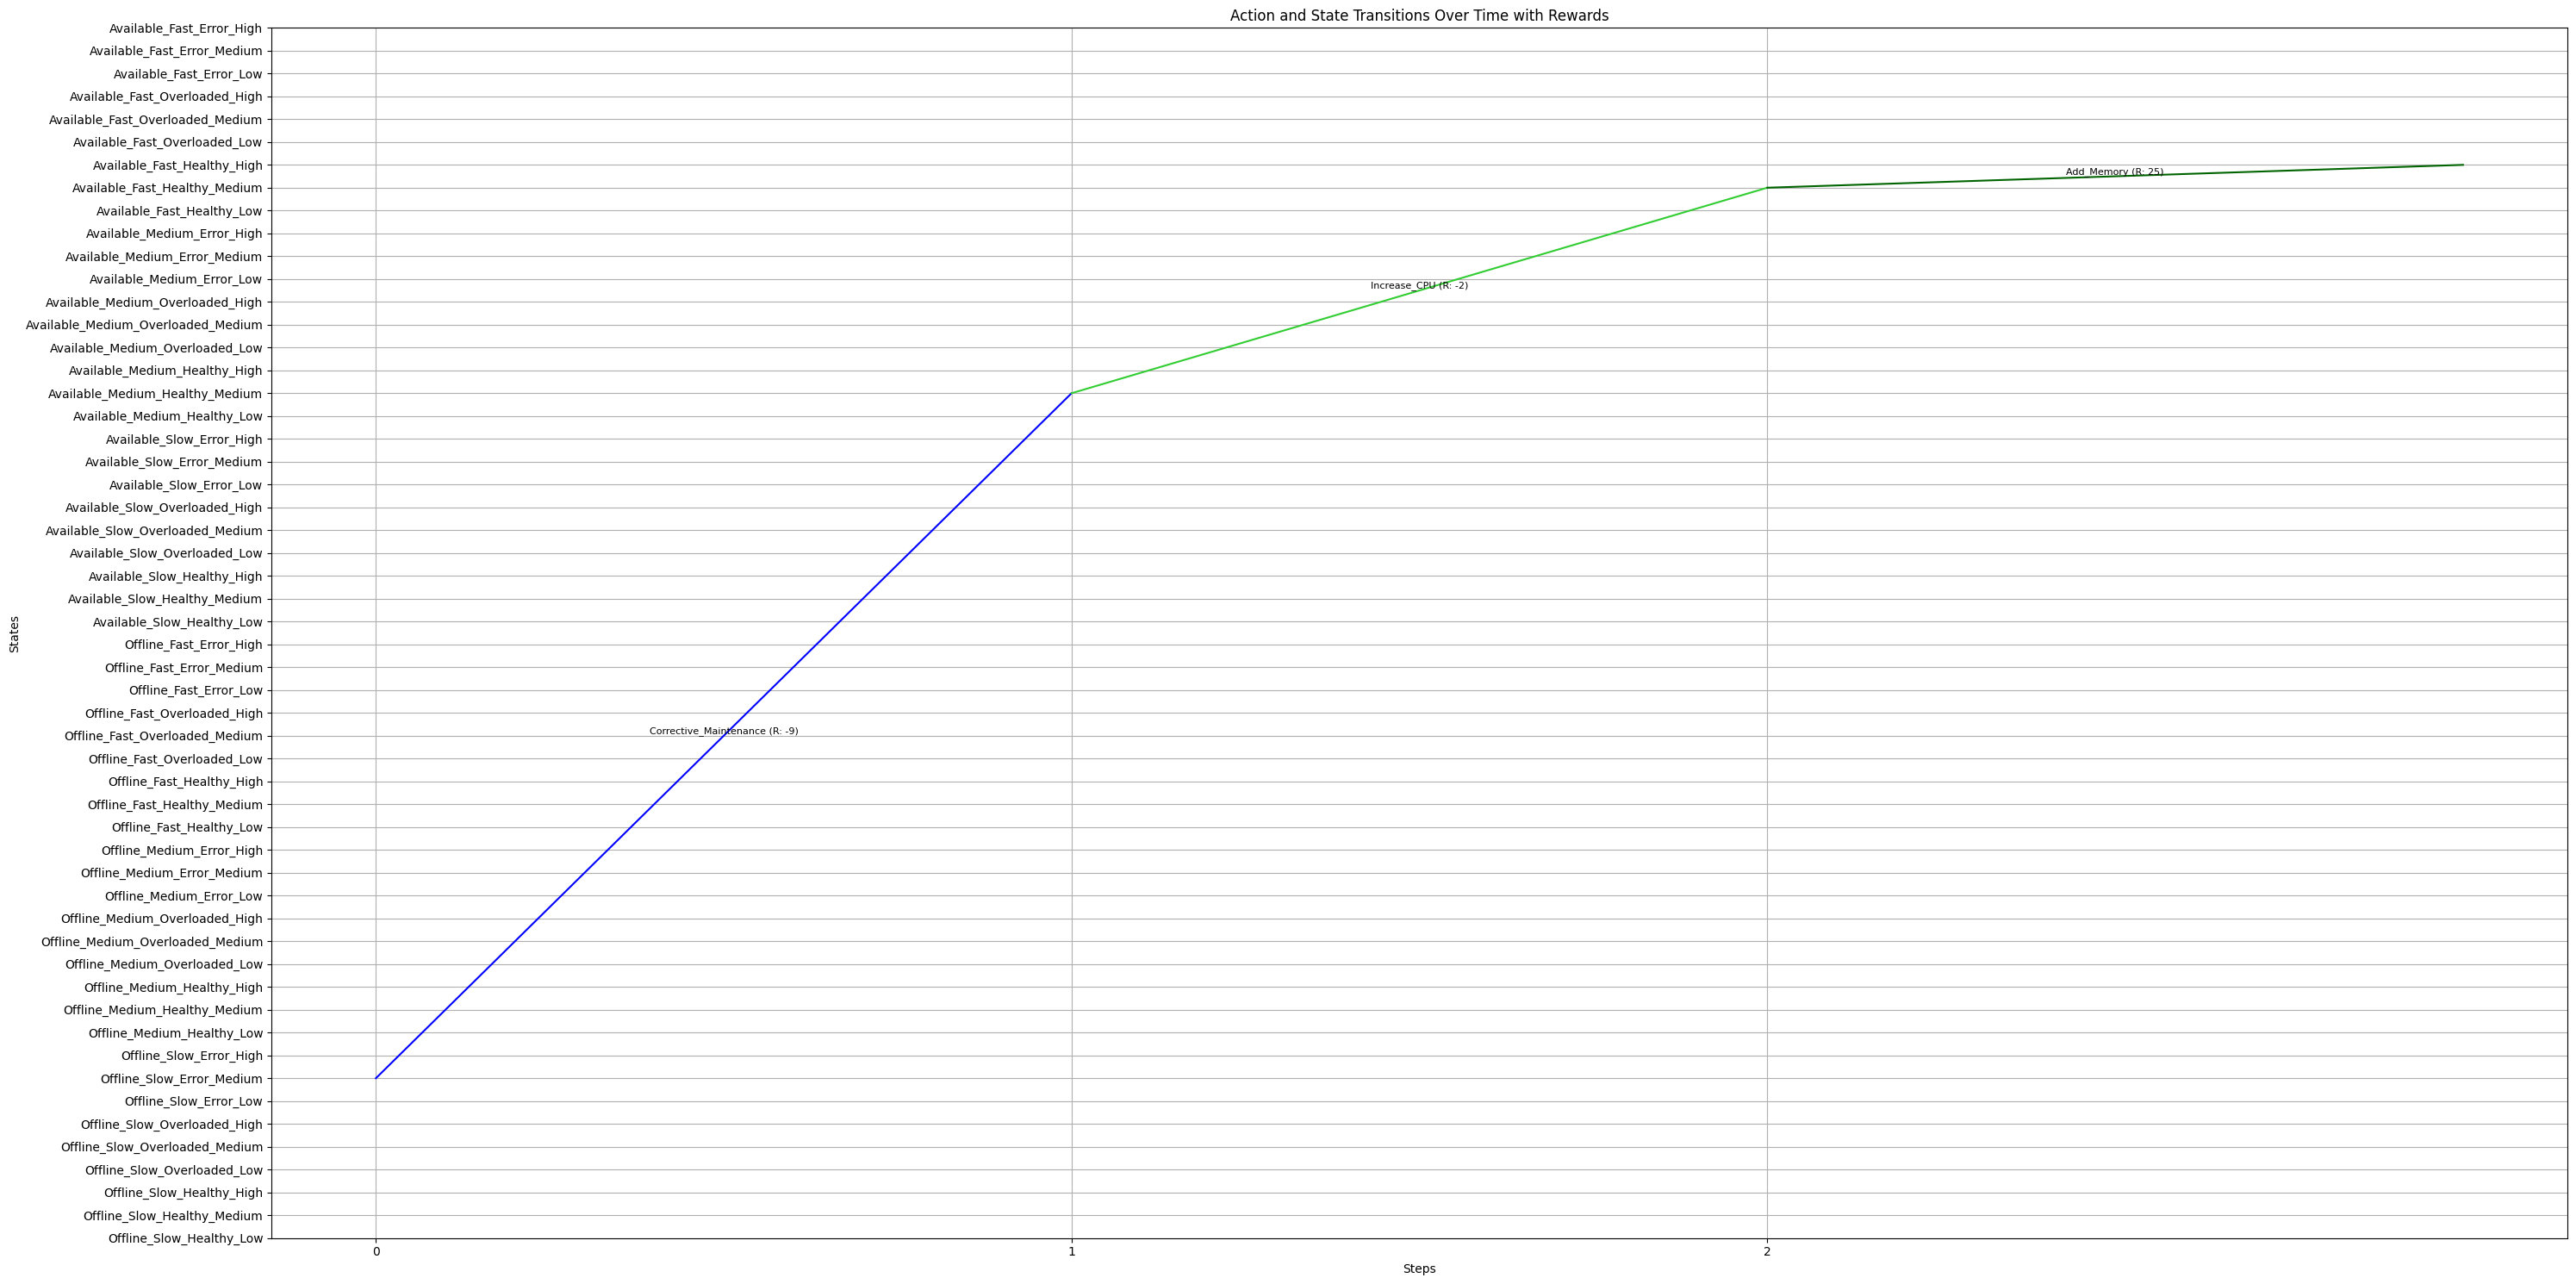

In [ ]:
num_episodes = 10000
num_steps = 10
discount_factor = 0.9
epsilon = 0.1
print("\nExecutando Monte Carlo Control...")
Q_mc, policy_mc, episode_rewards = mc_control_epsilon_greedy(env, num_episodes, discount_factor, epsilon)

num_episodes = 1
num_steps = 10
discount_factor = 0.9
epsilon = 0.01
total_rewards_mc, history_mc = run_monte_carlo_policy(
    env, policy_mc, num_episodes, num_steps
)

# Exibir recompensas totais por episódio
plot_total_rewards(episode_rewards)

# Exibir histórico de estados e ações com recompensas
plot_action_state_history_with_rewards(history_mc, env)

## Temporal Difference


### Q Learning


In [ ]:
env.reset()

(7, {})

In [ ]:
from src.algorithms.temporal_difference.q_learning import q_learning
from src.algorithms.temporal_difference.utils import (
    run_q_learning_policy,
    plot_action_state_history,
    plot_total_rewards
)

#### Experimento 1 -> Resultado bom mas não chegou no estado terminal


Executando Q-learning...
Episode 0/500 completed. Total reward: -216
Episode 100/500 completed. Total reward: -183
Episode 200/500 completed. Total reward: 368
Episode 300/500 completed. Total reward: 5543
Episode 400/500 completed. Total reward: 2885
Current API state: Available_Slow_Healthy_Low
Current API state: Available_Fast_Healthy_Low
Current API state: Available_Fast_Healthy_Low
Current API state: Available_Fast_Healthy_Medium
Current API state: Available_Fast_Healthy_Medium
Current API state: Available_Fast_Healthy_Medium
Current API state: Available_Fast_Healthy_Medium
Current API state: Available_Fast_Healthy_Medium
Current API state: Available_Fast_Healthy_Medium
Current API state: Available_Fast_Healthy_Medium


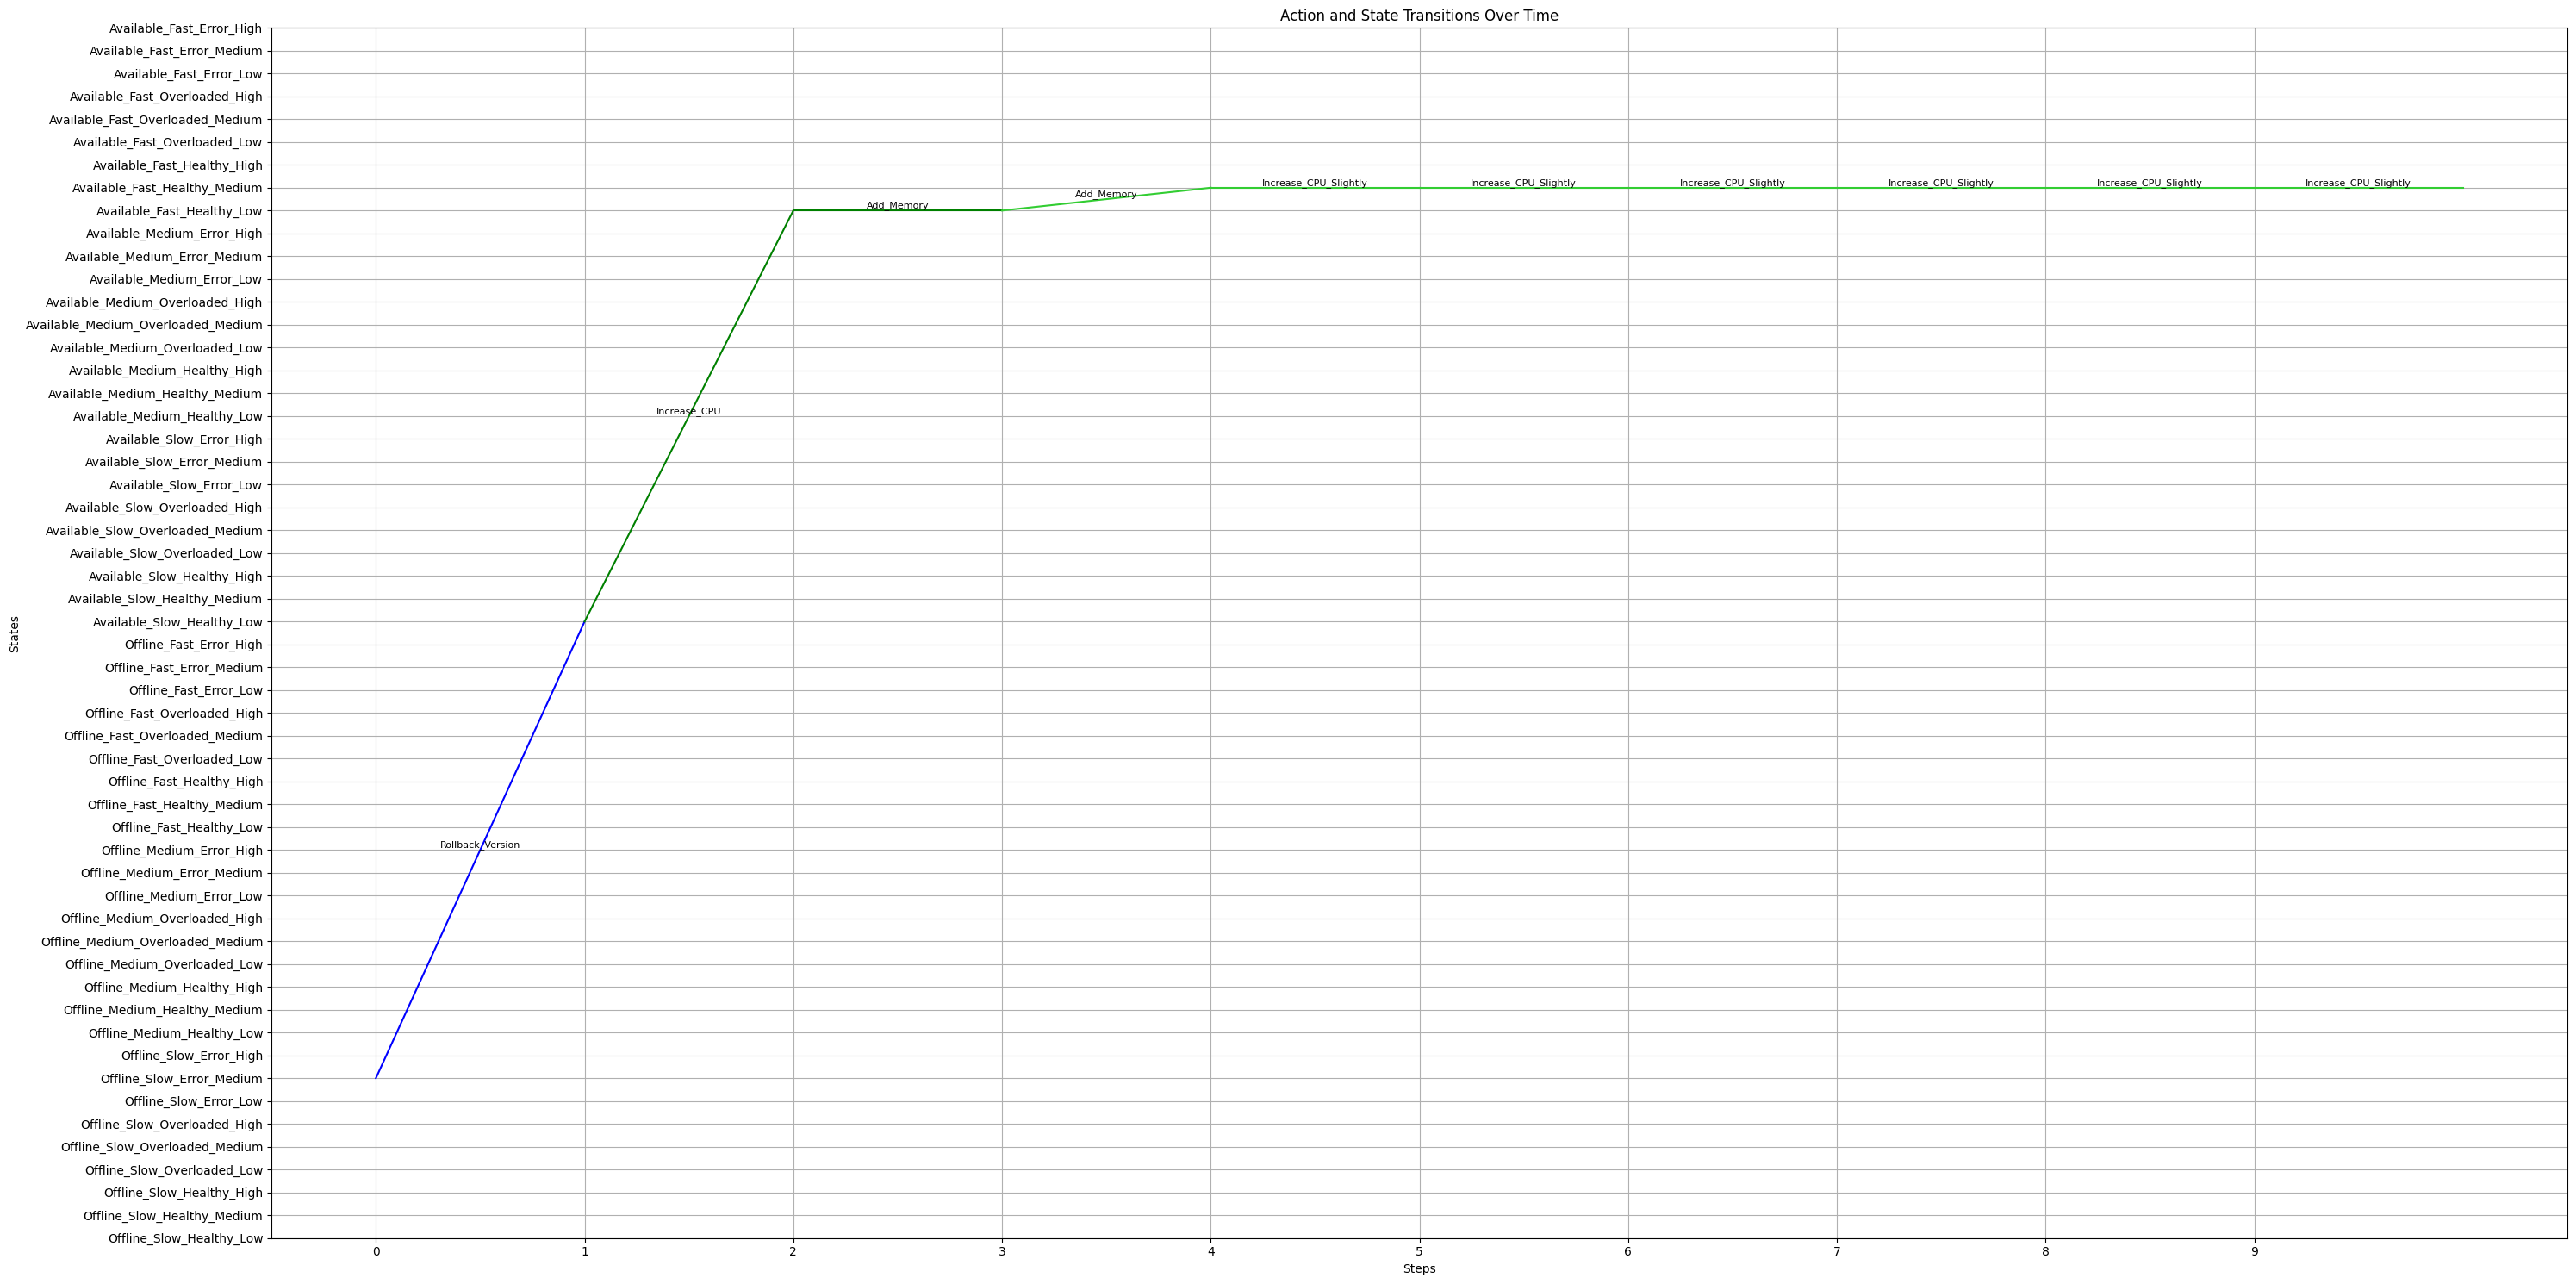

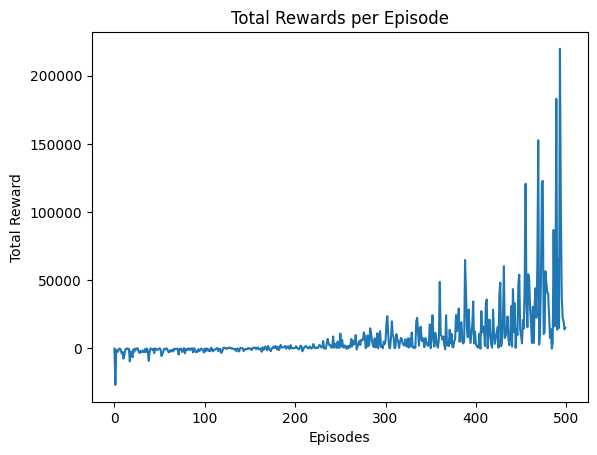

In [ ]:
num_episodes = 500  # Número de episódios de treinamento
alpha = 0.1  # Taxa de aprendizado
gamma = 0.999  # Fator de desconto
epsilon = 0.3  # Exploração inicial
epsilon_decay = 0.99  # Decaimento de epsilon ao longo dos episódios

print("\nExecutando Q-learning...")
Q_qlearning, policy_qlearning, epidodes_rewards = q_learning(
    env, num_episodes, alpha, gamma, epsilon, epsilon_decay
)
history_qlearning, rewards_qlearning = run_q_learning_policy(env, policy_qlearning, 10)
plot_action_state_history(history_qlearning, env)

plot_total_rewards(epidodes_rewards)


#### Experimento 2 -> Demorou muito e não terminou a execução

In [ ]:
num_episodes = 5000  # Número de episódios de treinamento
alpha = 0.1  # Taxa de aprendizado
gamma = 0.99  # Fator de desconto
epsilon = 0.3  # Exploração inicial
epsilon_decay = 0.9  # Decaimento de epsilon ao longo dos episódios

print("\nExecutando Q-learning...")
Q_qlearning, policy_qlearning, epidodes_rewards = q_learning(
    env, num_episodes, alpha, gamma, epsilon, epsilon_decay
)
history_qlearning, rewards_qlearning = run_q_learning_policy(env, policy_qlearning, 10)
plot_action_state_history(history_qlearning, env)

plot_total_rewards(epidodes_rewards)



Executando Q-learning...


NameError: name 'q_learning' is not defined

#### Experimento 3 -> Resultado bom, demorou bastante e não chegou em um estado terminal também.


Executando Q-learning...
Episode 0/1000 completed. Total reward: -2764
Episode 100/1000 completed. Total reward: -5606
Episode 200/1000 completed. Total reward: -42
Episode 300/1000 completed. Total reward: 2841
Episode 400/1000 completed. Total reward: 12333
Episode 500/1000 completed. Total reward: 71582
Episode 600/1000 completed. Total reward: 237539
Episode 700/1000 completed. Total reward: 313283
Episode 800/1000 completed. Total reward: 271004
Episode 900/1000 completed. Total reward: 700017
Current API state: Available_Slow_Healthy_Low
Current API state: Available_Slow_Healthy_Low
Current API state: Available_Fast_Healthy_Low
Current API state: Available_Fast_Healthy_Medium
Current API state: Available_Fast_Healthy_Medium
Current API state: Available_Fast_Healthy_Medium
Current API state: Available_Fast_Healthy_Medium
Current API state: Available_Fast_Healthy_Medium
Current API state: Available_Fast_Healthy_Medium
Current API state: Available_Fast_Healthy_Medium


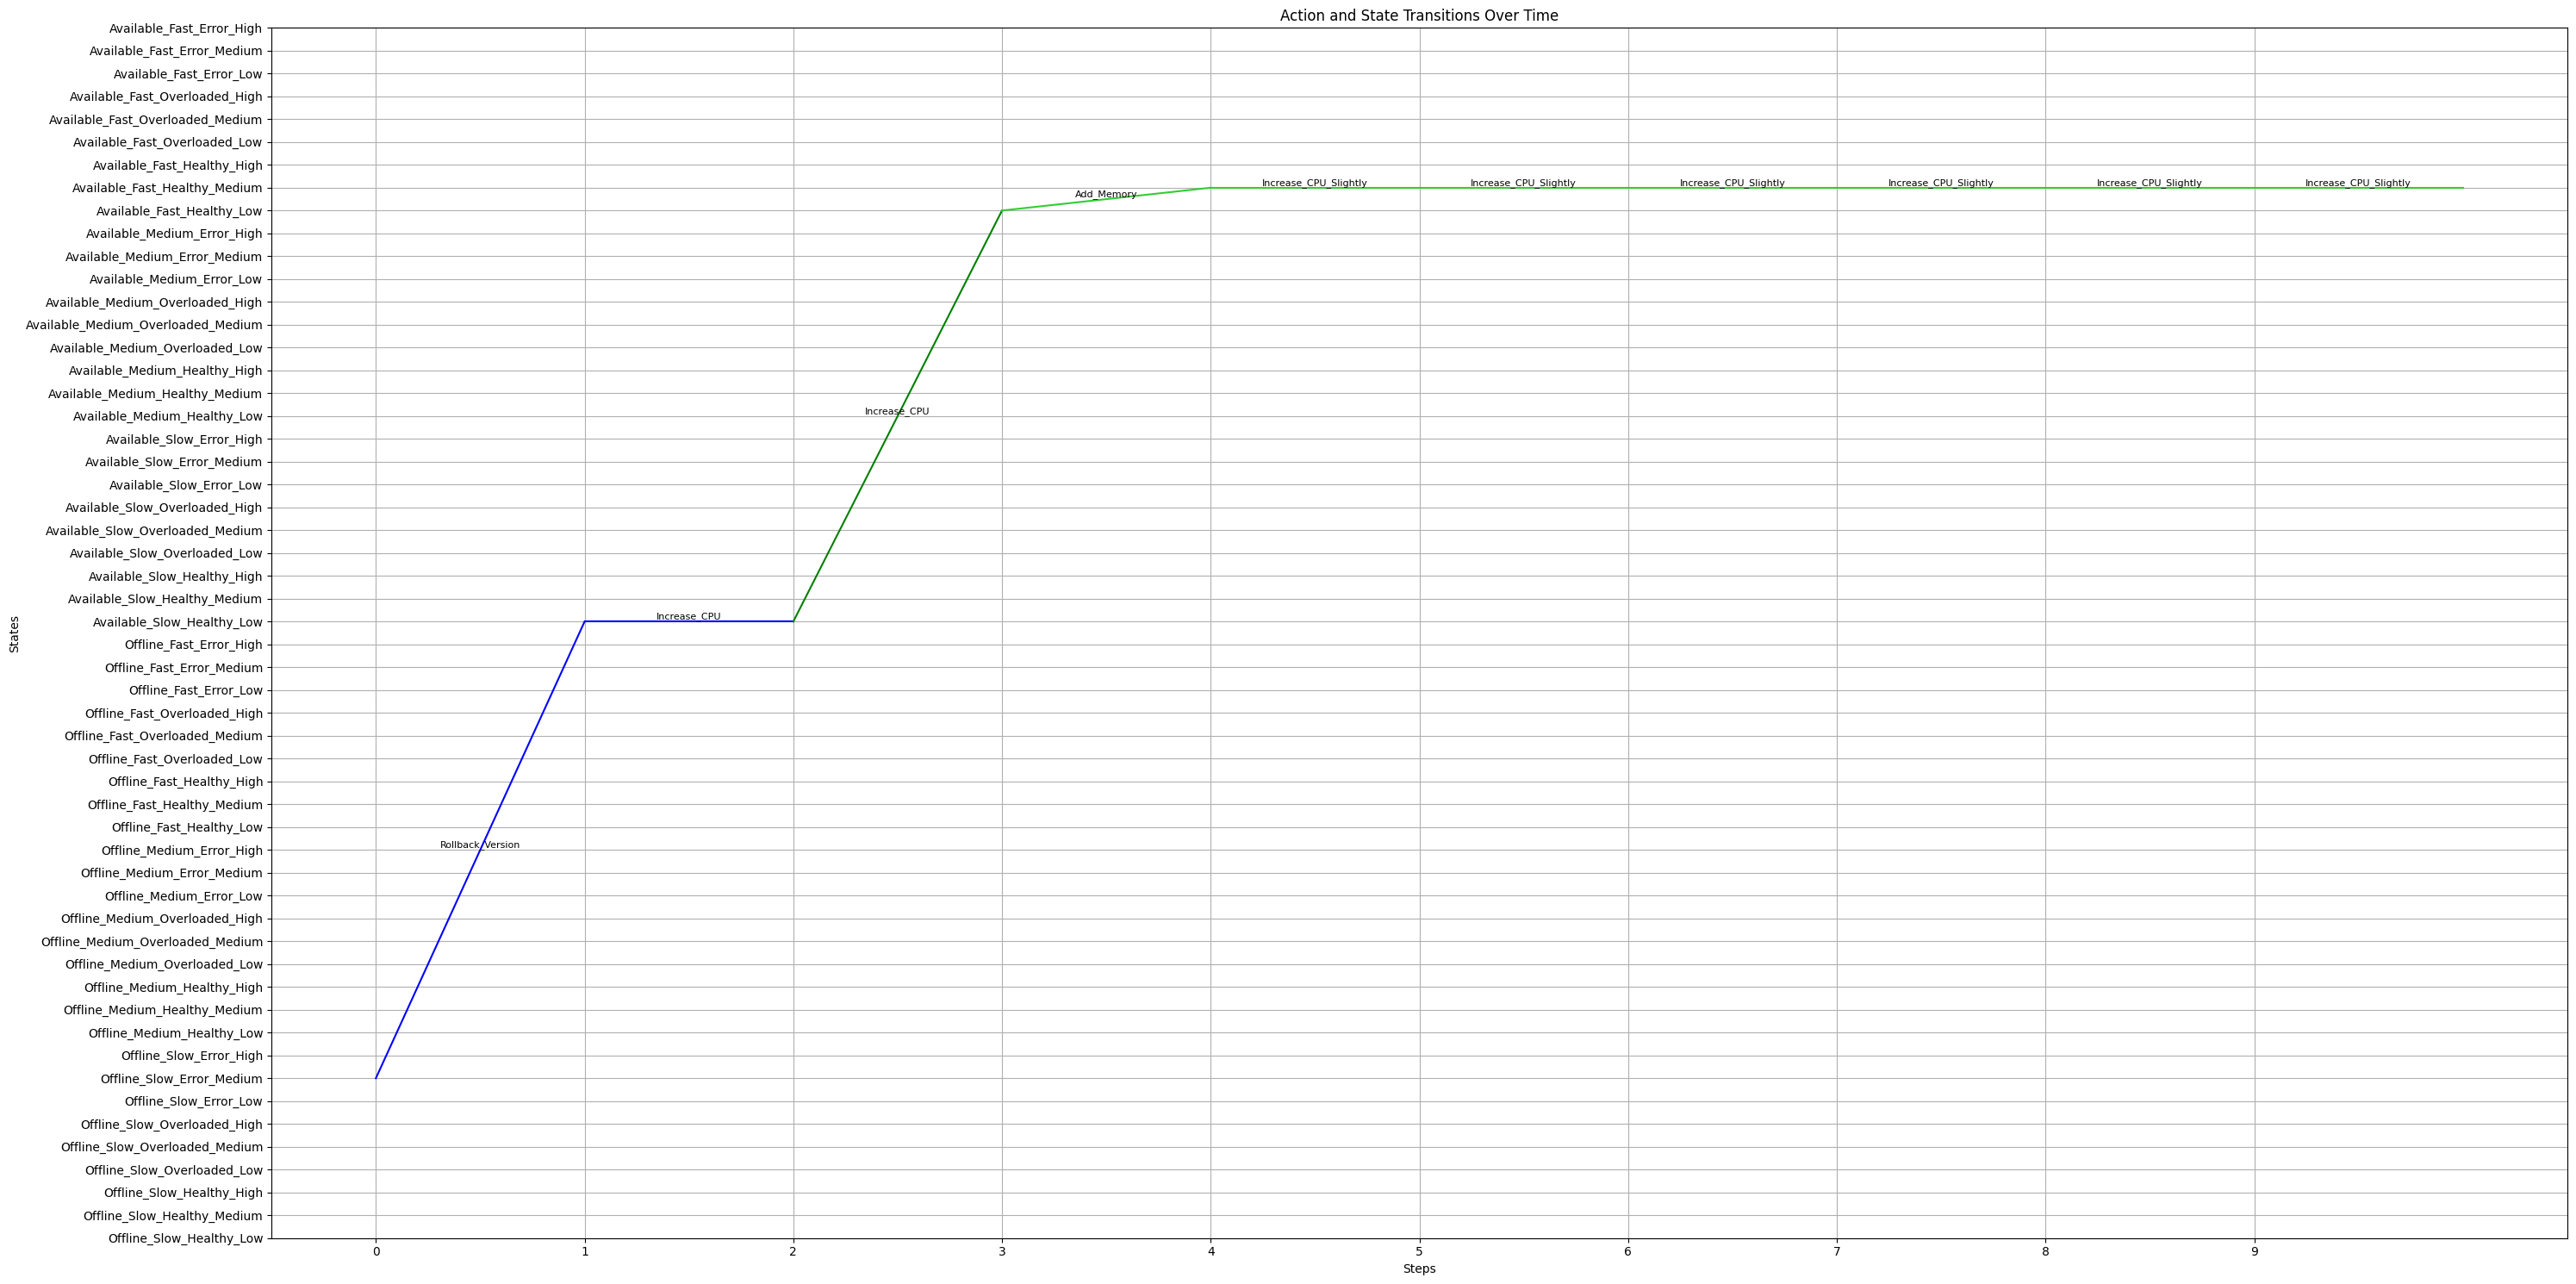

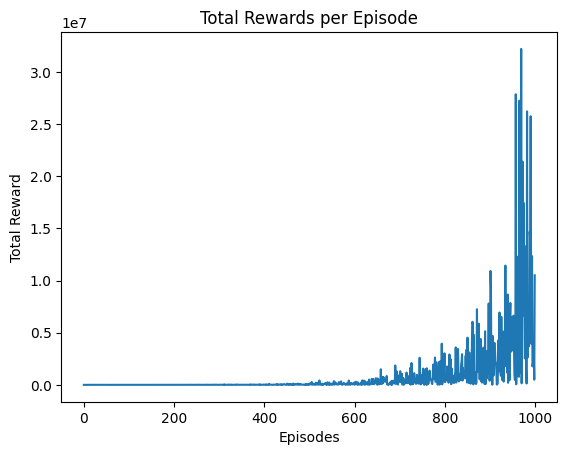

In [ ]:
num_episodes = 1000  # Número de episódios de treinamento
alpha = 0.1  # Taxa de aprendizado
gamma = 0.999  # Fator de desconto
epsilon = 0.3  # Exploração inicial
epsilon_decay = 0.99  # Decaimento de epsilon ao longo dos episódios

print("\nExecutando Q-learning...")
Q_qlearning, policy_qlearning, epidodes_rewards = q_learning(
    env, num_episodes, alpha, gamma, epsilon, epsilon_decay
)
history_qlearning, rewards_qlearning = run_q_learning_policy(env, policy_qlearning, 10)
plot_action_state_history(history_qlearning, env)

plot_total_rewards(epidodes_rewards)


### SARSA


In [ ]:
from src.algorithms.temporal_difference.sarsa import sarsa_learning
from src.algorithms.temporal_difference.utils import (
    run_sarsa_policy,
    plot_action_state_history_with_rewards,
    plot_total_rewards
)

In [ ]:
env.reset()

(7, {})

#### Experimento 1 - Foco em exploração

Episódio 0/500 concluído. Total reward: -6215
Episódio 100/500 concluído. Total reward: -287
Episódio 200/500 concluído. Total reward: -1428
Episódio 300/500 concluído. Total reward: 15
Episódio 400/500 concluído. Total reward: -103


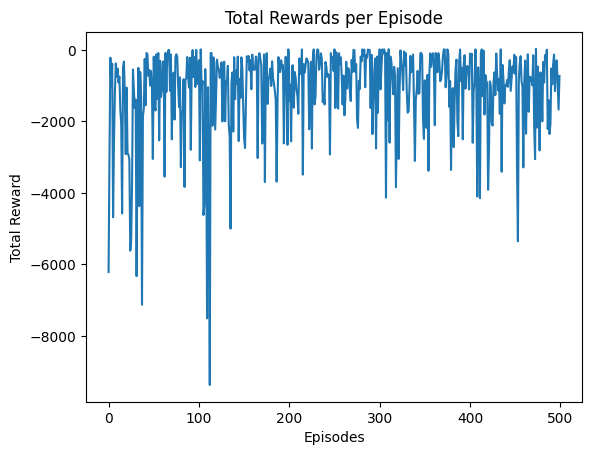

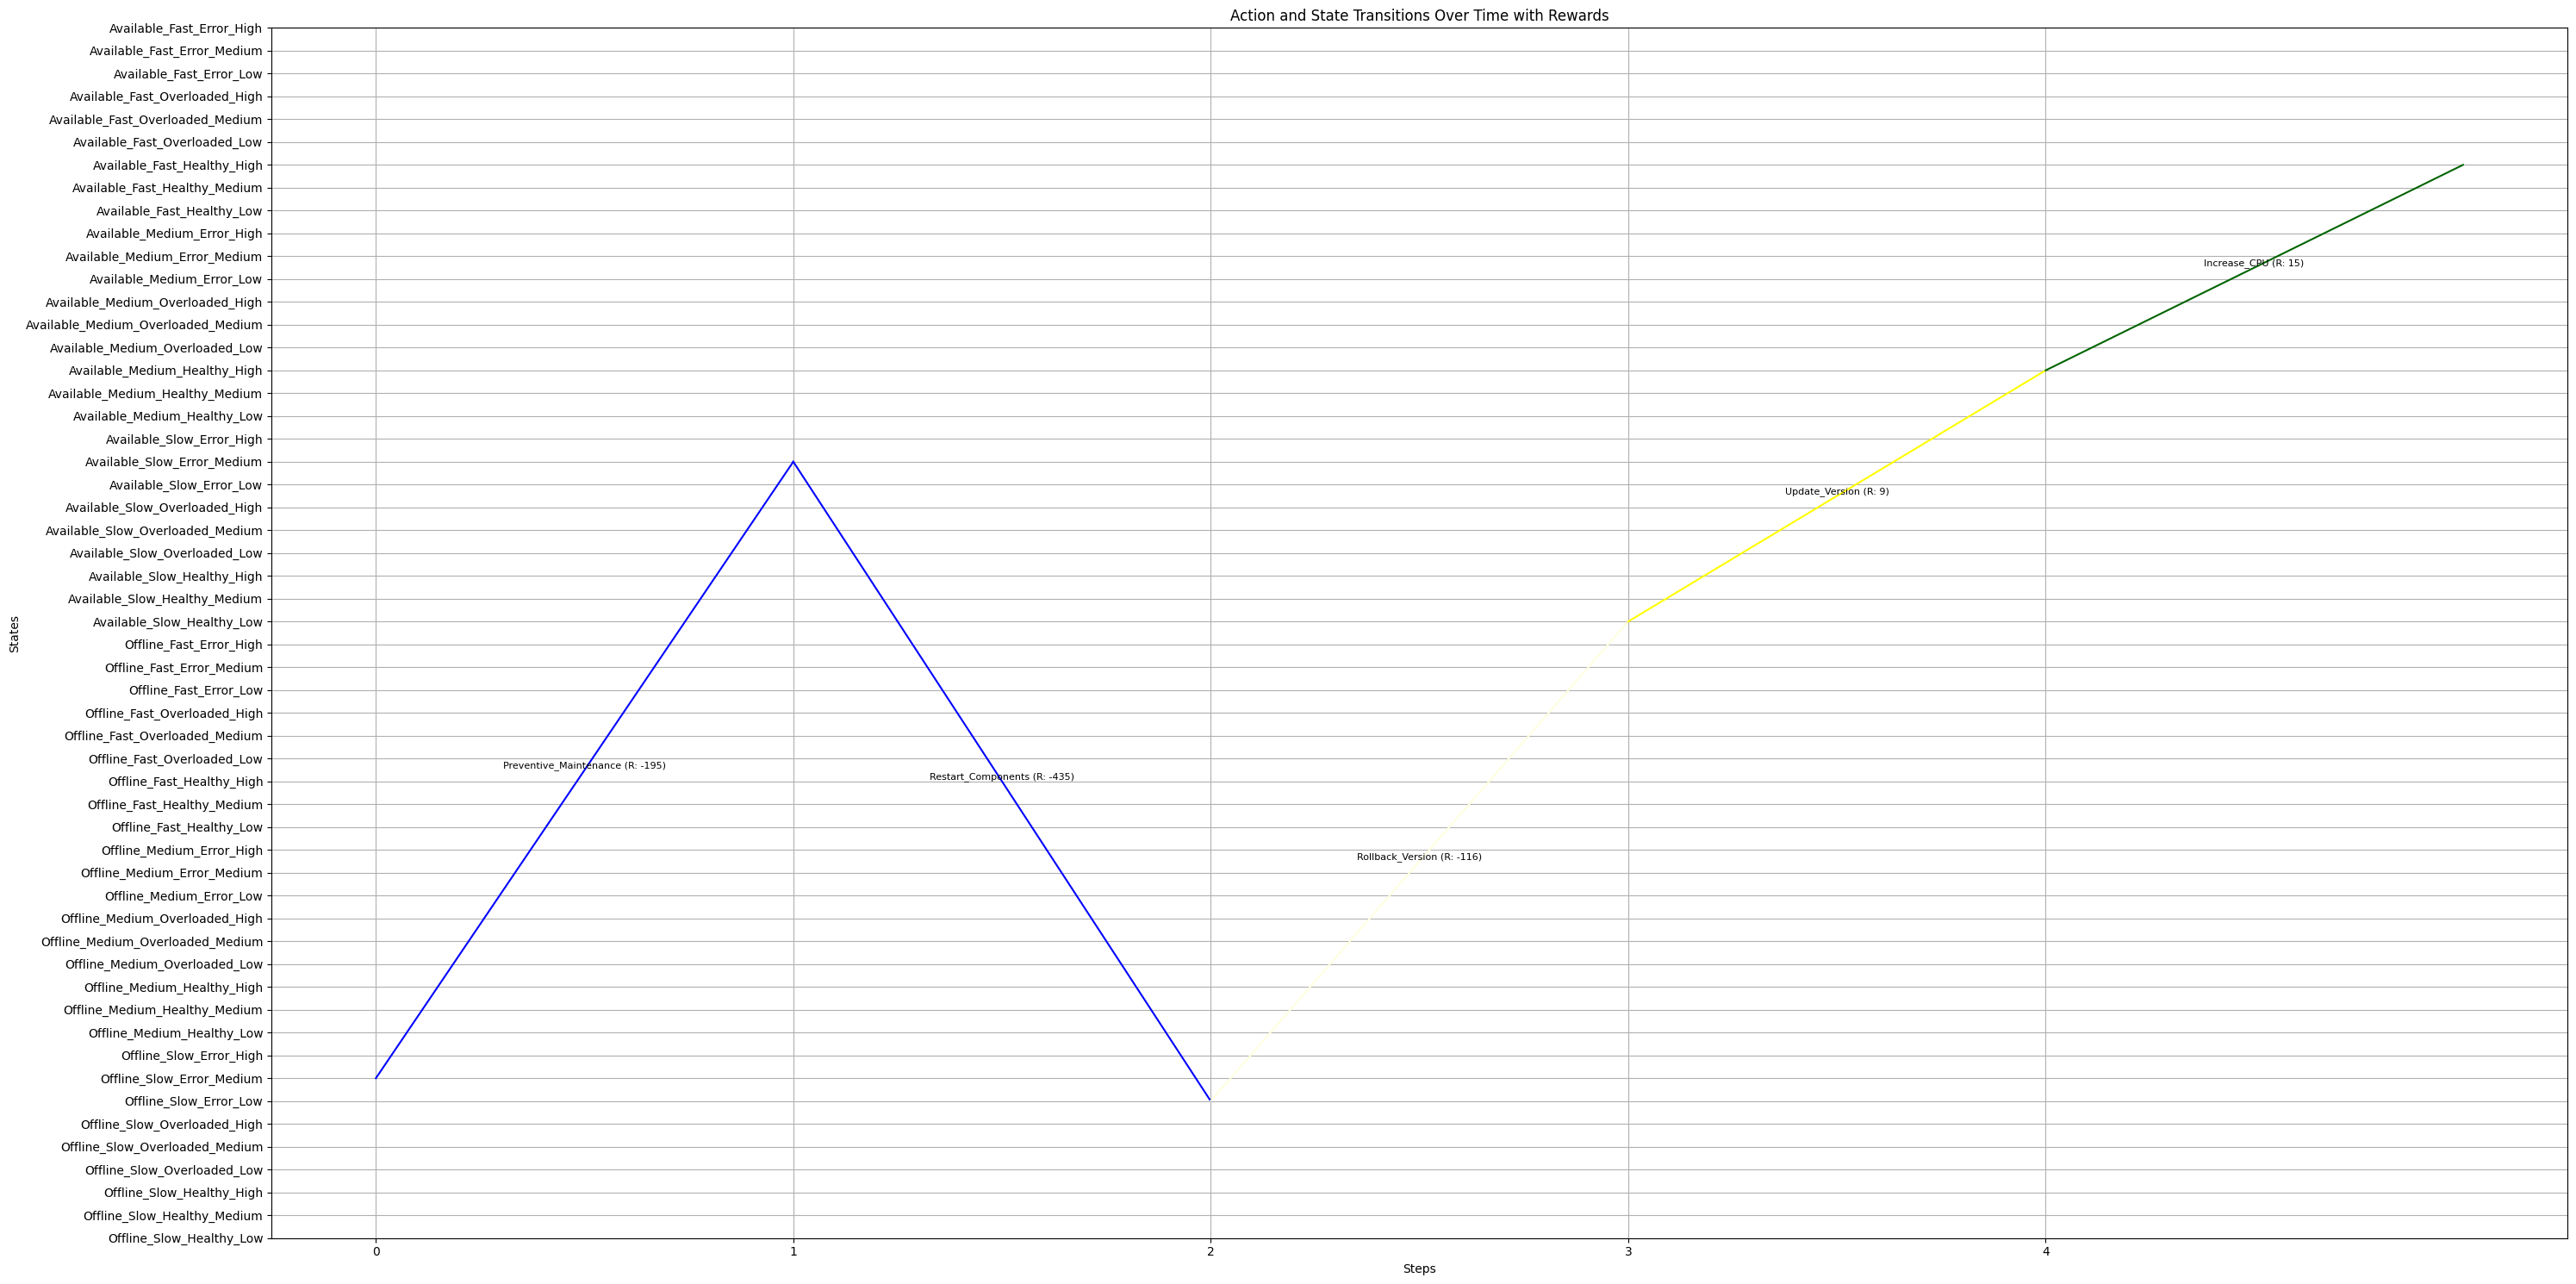

In [ ]:
num_episodes = 500  # Número de episódios de treinamento
alpha = 0.05  # Taxa de aprendizado
gamma = 0.99  # Fator de desconto
epsilon = 0.5  # Exploração inicial

Q_sarsa, policy_sarsa, epidodes_rewards = sarsa_learning(env, num_episodes, gamma, alpha, epsilon)
total_rewards_sarsa, history_sarsa = run_sarsa_policy(
    env, policy_sarsa, num_episodes, 100
)

# Exibir recompensas totais por episódio
plot_total_rewards(epidodes_rewards)

# Exibir histórico de estados e ações com recompensas
plot_action_state_history_with_rewards(history_sarsa, env)

#### Experimento 2 - Exploração controlada

In [ ]:
env.reset()

(7, {})

Episódio 0/1000 concluído. Total reward: -6474
Episódio 100/1000 concluído. Total reward: -904
Episódio 200/1000 concluído. Total reward: -86
Episódio 300/1000 concluído. Total reward: -582
Episódio 400/1000 concluído. Total reward: -1181
Episódio 500/1000 concluído. Total reward: -86
Episódio 600/1000 concluído. Total reward: -108
Episódio 700/1000 concluído. Total reward: -302
Episódio 800/1000 concluído. Total reward: -570
Episódio 900/1000 concluído. Total reward: -417


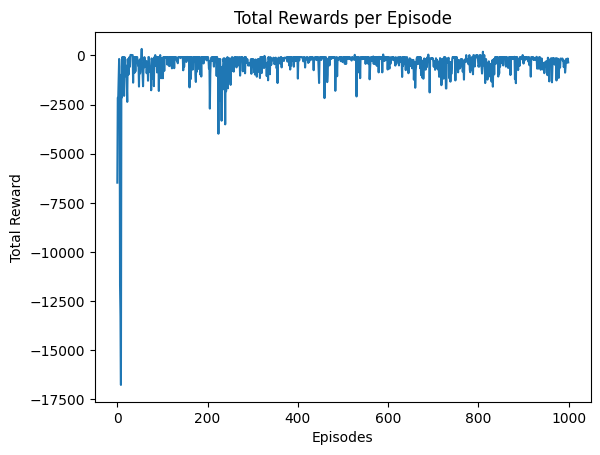

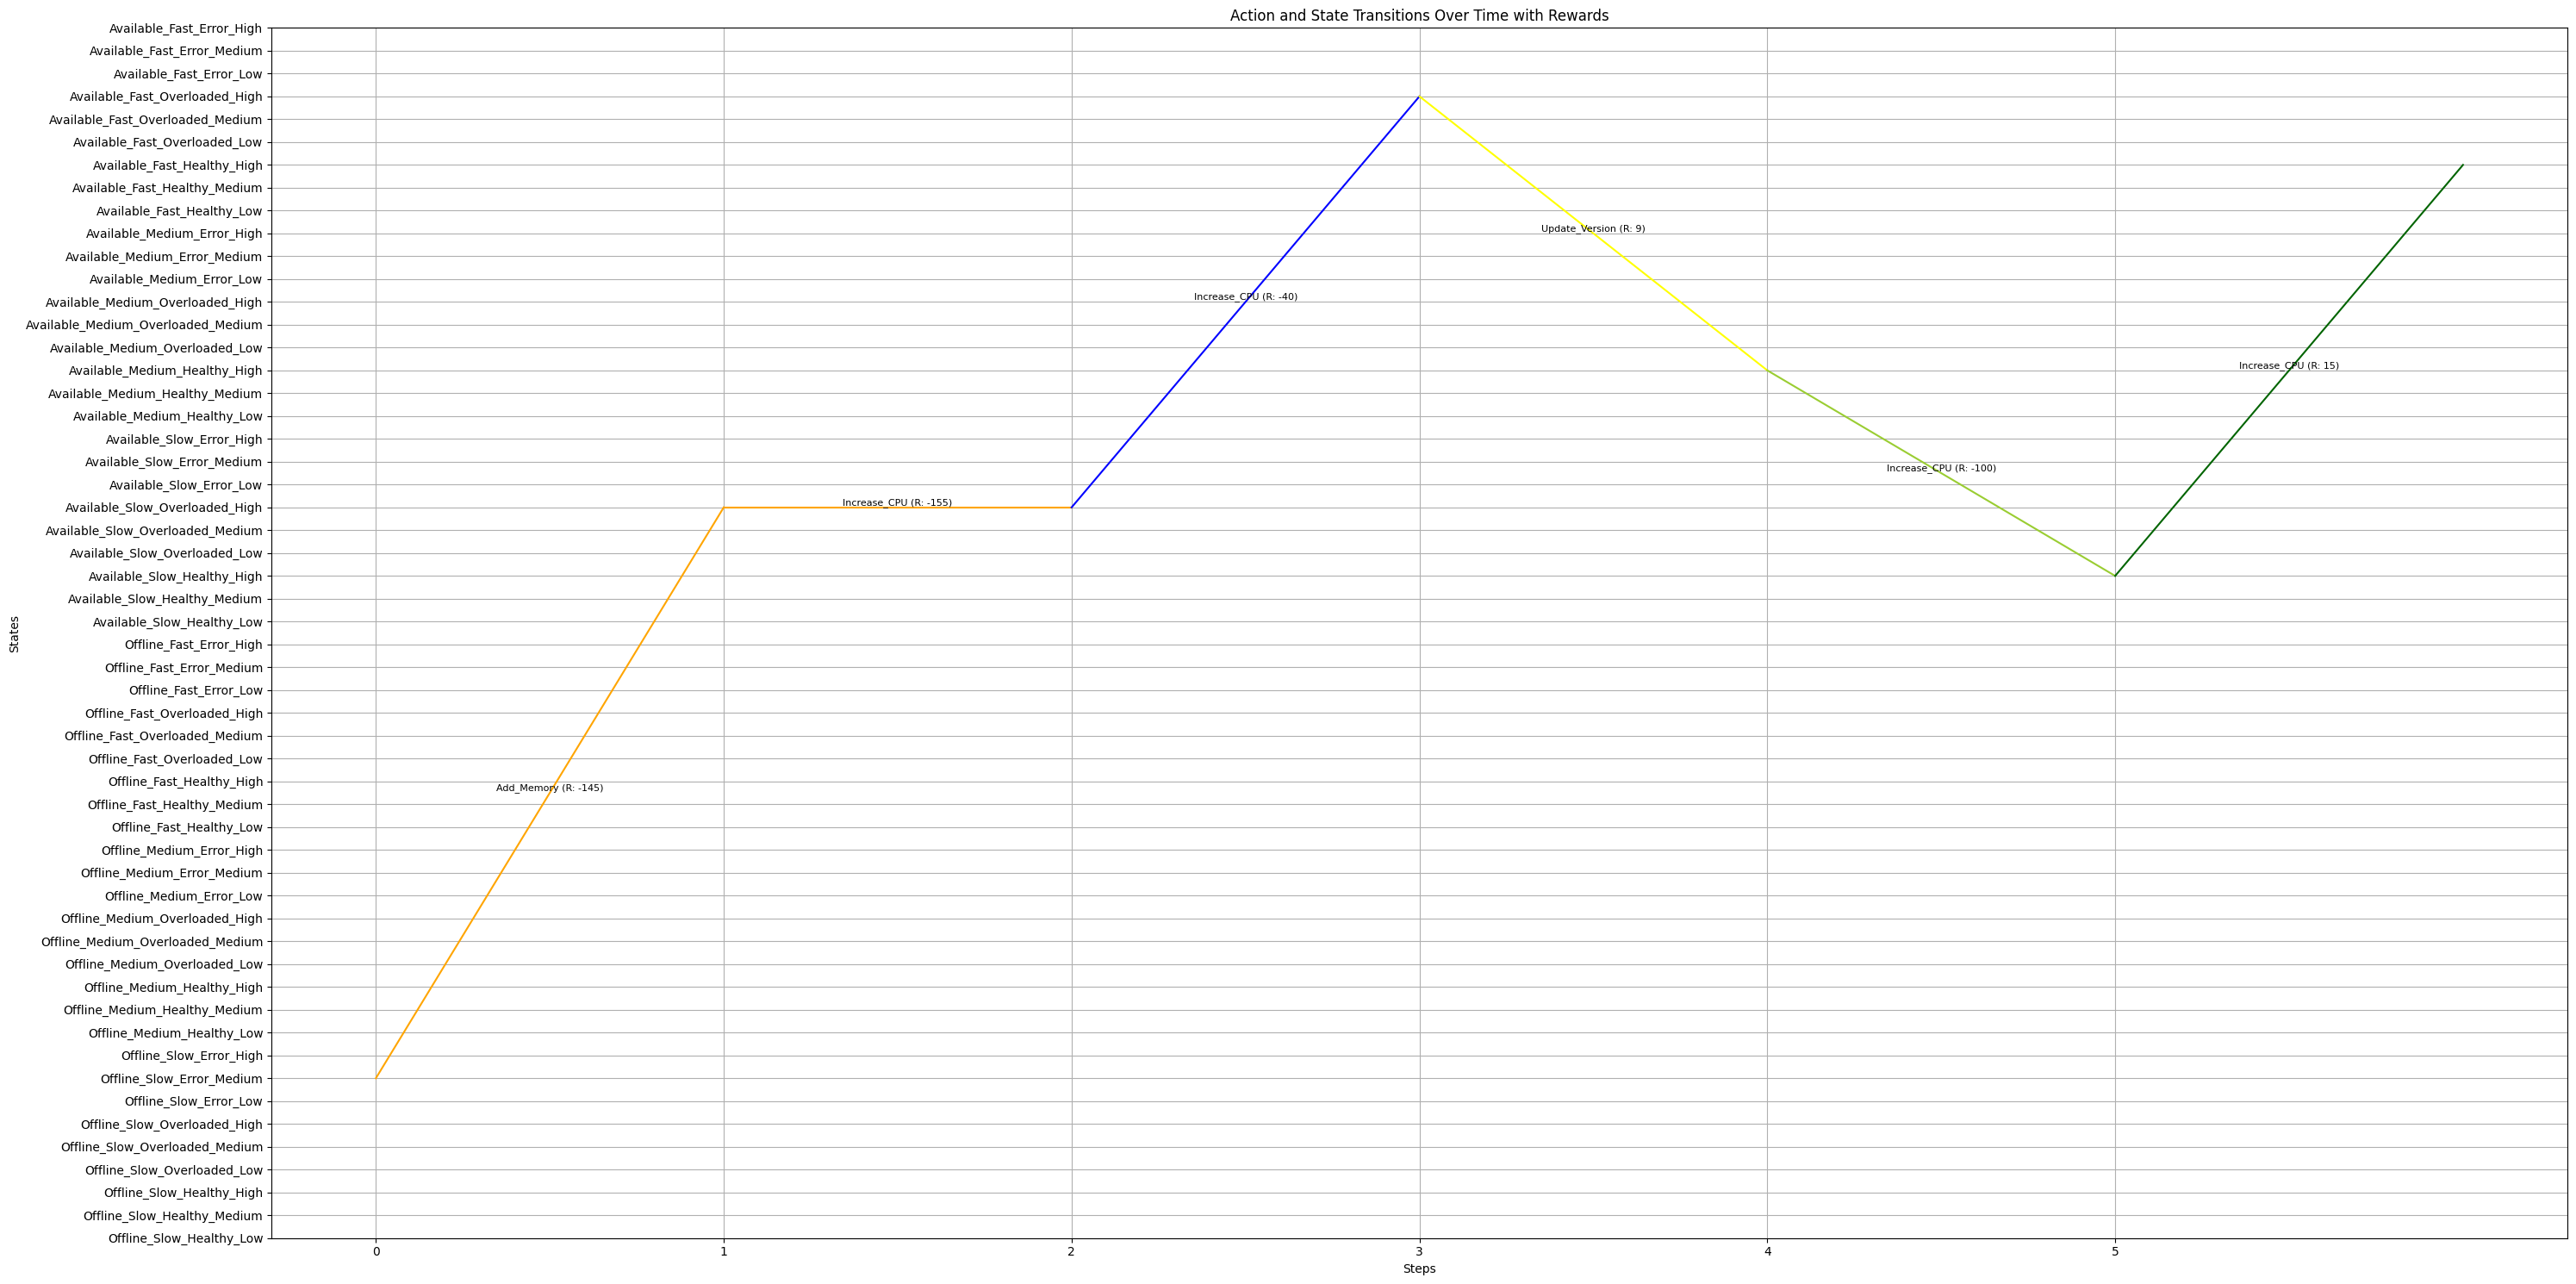

In [ ]:
num_episodes = 1000  # Número de episódios de treinamento
alpha = 0.2  # Taxa de aprendizado
gamma = 0.95  # Fator de desconto
epsilon = 0.1  # Exploração inicial

Q_sarsa, policy_sarsa, epidodes_rewards = sarsa_learning(env, num_episodes, gamma, alpha, epsilon)
total_rewards_sarsa, history_sarsa = run_sarsa_policy(
    env, policy_sarsa, num_episodes, 100
)

# Exibir recompensas totais por episódio
plot_total_rewards(epidodes_rewards)

# Exibir histórico de estados e ações com recompensas
plot_action_state_history_with_rewards(history_sarsa, env)

#### Experimento 3 - Foco em recompensas futuras

In [ ]:
env.reset()

(7, {})

Episódio 0/1000 concluído. Total reward: -7874
Episódio 100/1000 concluído. Total reward: -1789
Episódio 200/1000 concluído. Total reward: -1215
Episódio 300/1000 concluído. Total reward: -424
Episódio 400/1000 concluído. Total reward: -579
Episódio 500/1000 concluído. Total reward: -451
Episódio 600/1000 concluído. Total reward: -86
Episódio 700/1000 concluído. Total reward: -86
Episódio 800/1000 concluído. Total reward: 15
Episódio 900/1000 concluído. Total reward: -95


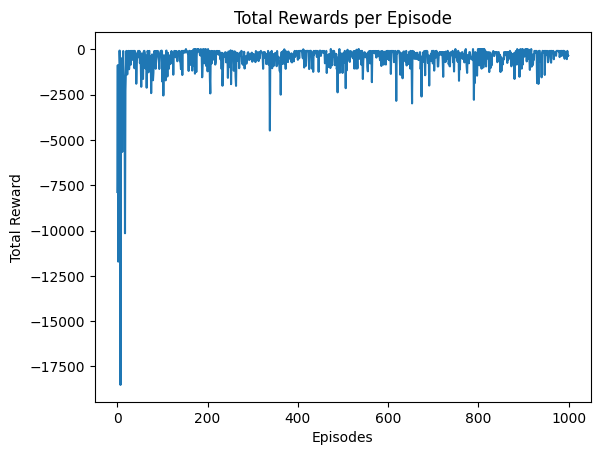

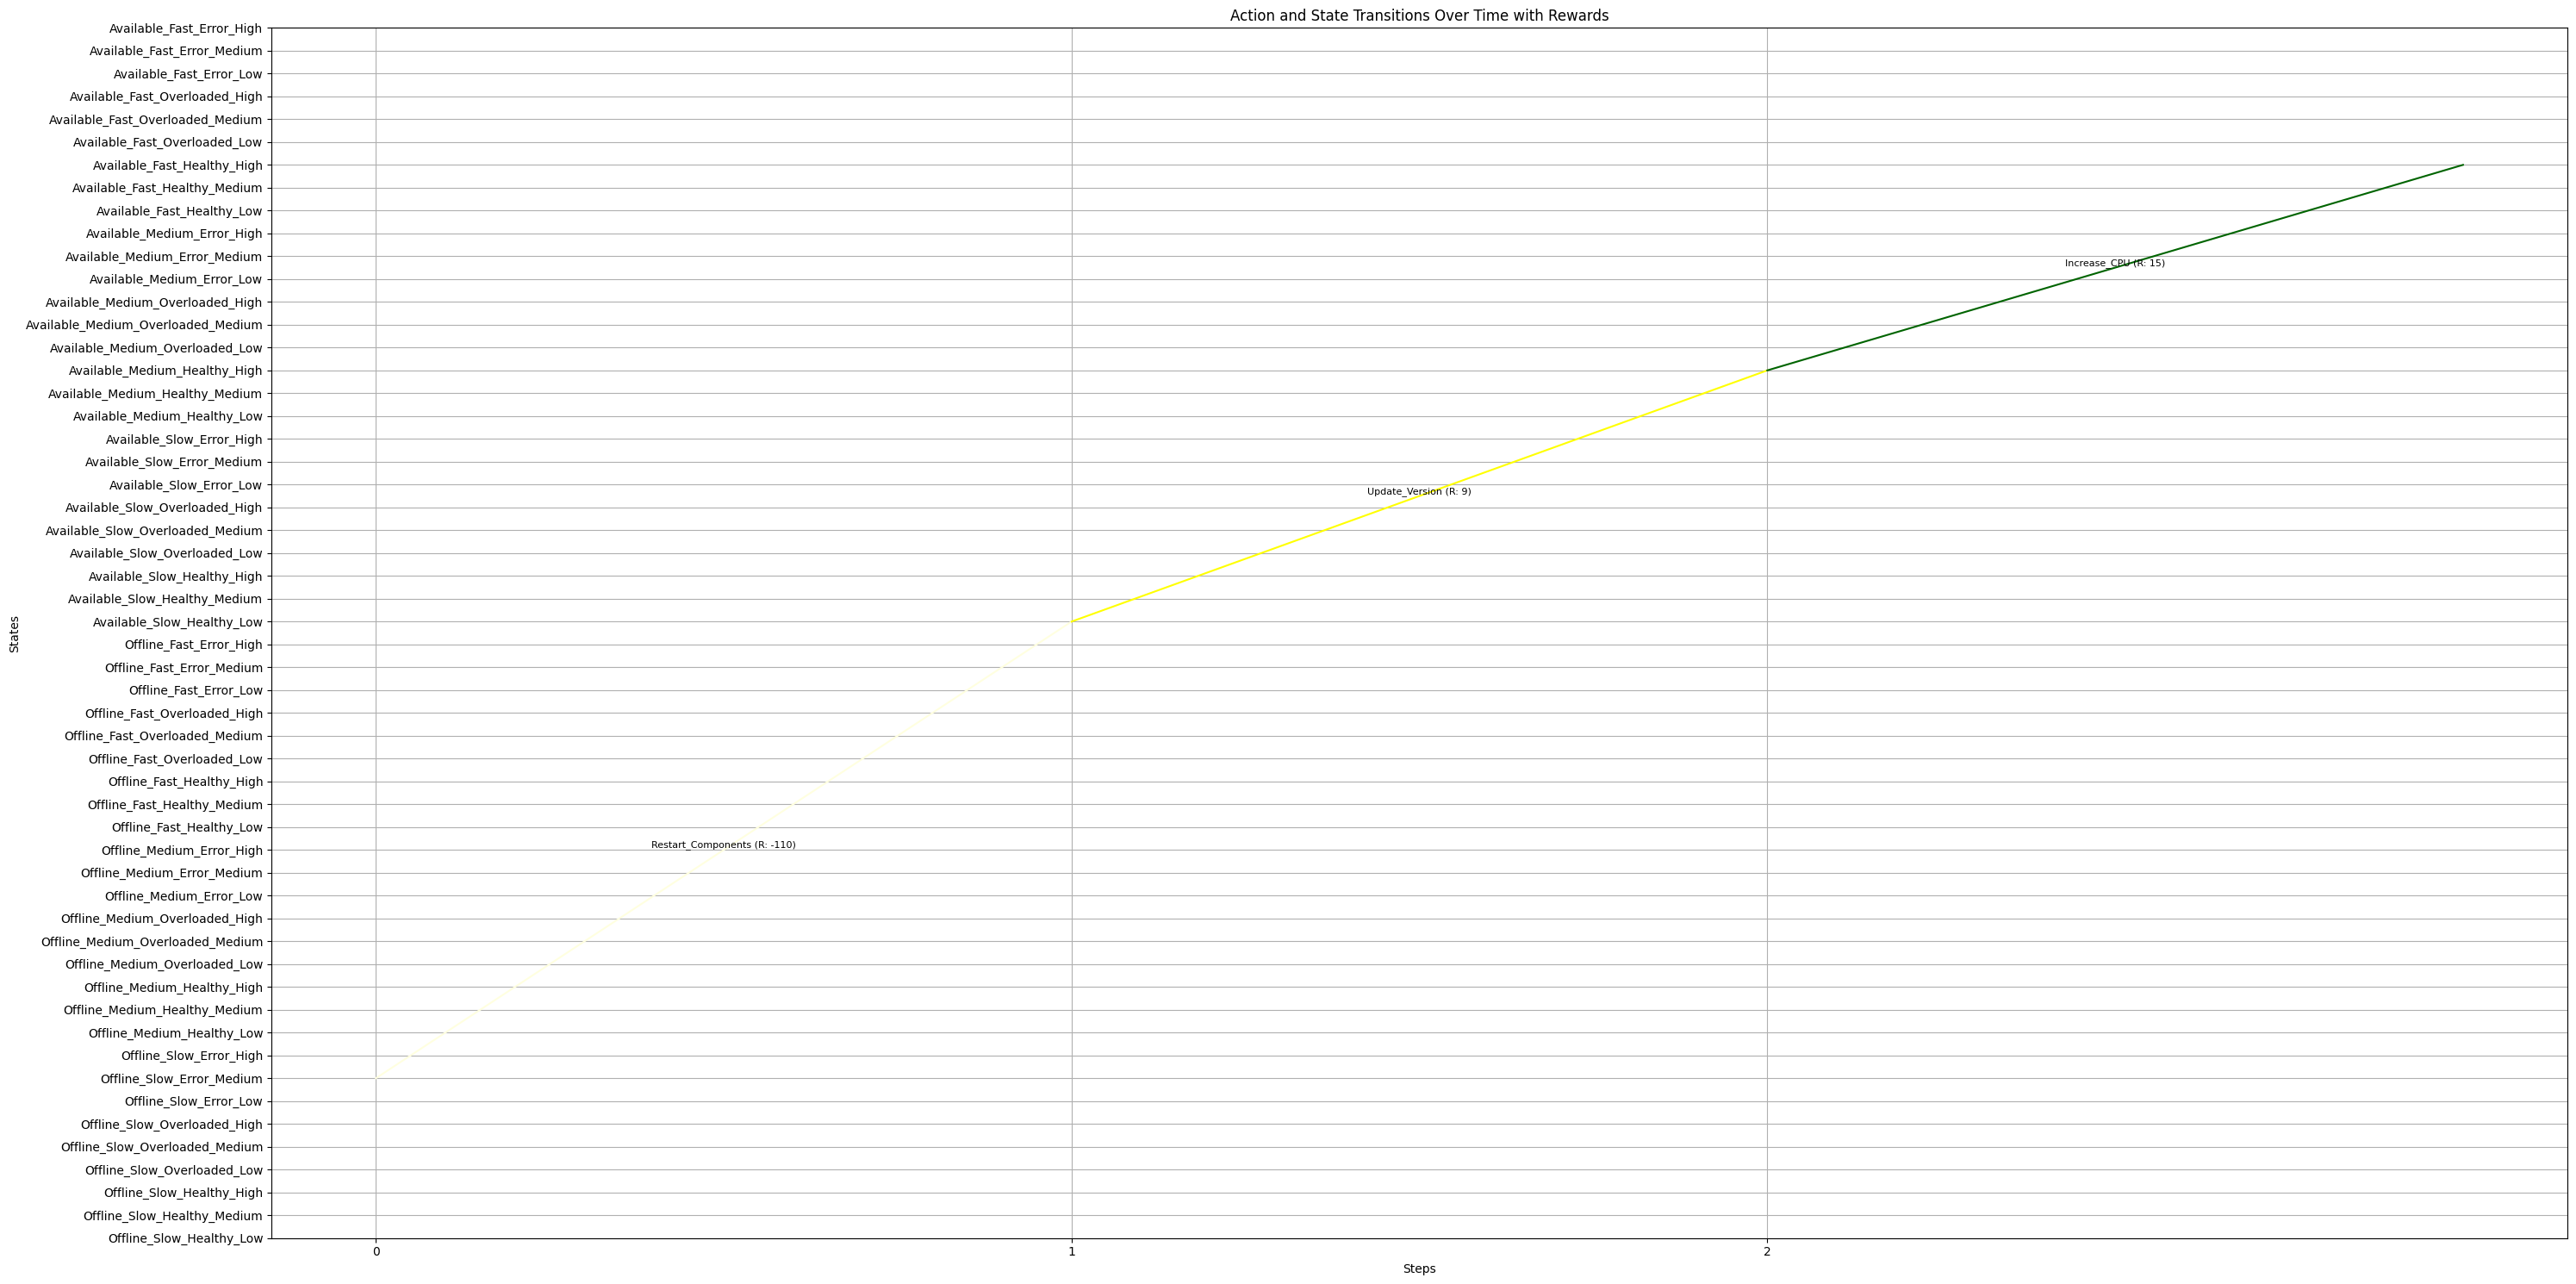

In [ ]:
num_episodes = 1000  # Número de episódios de treinamento
alpha = 0.15  # Taxa de aprendizado
gamma = 0.999  # Fator de desconto
epsilon = 0.2  # Exploração inicial

Q_sarsa, policy_sarsa, epidodes_rewards = sarsa_learning(env, num_episodes, gamma, alpha, epsilon)
total_rewards_sarsa, history_sarsa = run_sarsa_policy(
    env, policy_sarsa, num_episodes, 200
)

# Exibir recompensas totais por episódio
plot_total_rewards(epidodes_rewards)

# Exibir histórico de estados e ações com recompensas
plot_action_state_history_with_rewards(history_sarsa, env)

### EXPECTED SARSA

In [ ]:
from src.algorithms.temporal_difference.expected_sarsa import expected_sarsa_learning
from src.algorithms.temporal_difference.utils import (
    run_sarsa_policy,
    plot_action_state_history_with_rewards,
    plot_total_rewards
)


env.reset()

(7, {})

#### Experimento 1 - Foco nas recompensas futuras

Episódio 0/1000 concluído. Total reward: -2024
Episódio 100/1000 concluído. Total reward: -971
Episódio 200/1000 concluído. Total reward: -154
Episódio 300/1000 concluído. Total reward: -2
Episódio 400/1000 concluído. Total reward: -222
Episódio 500/1000 concluído. Total reward: -596
Episódio 600/1000 concluído. Total reward: -2
Episódio 700/1000 concluído. Total reward: -404
Episódio 800/1000 concluído. Total reward: 1
Episódio 900/1000 concluído. Total reward: -328


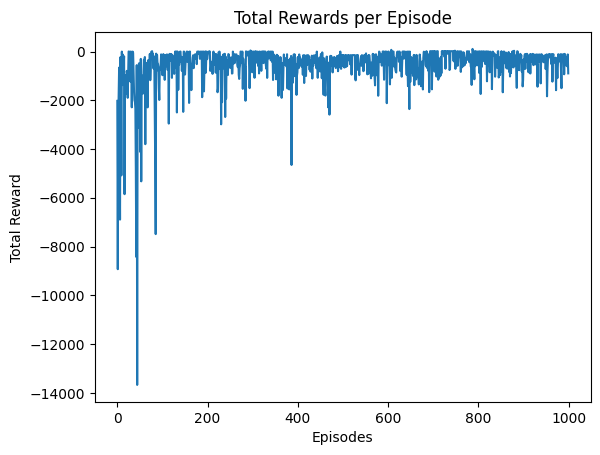

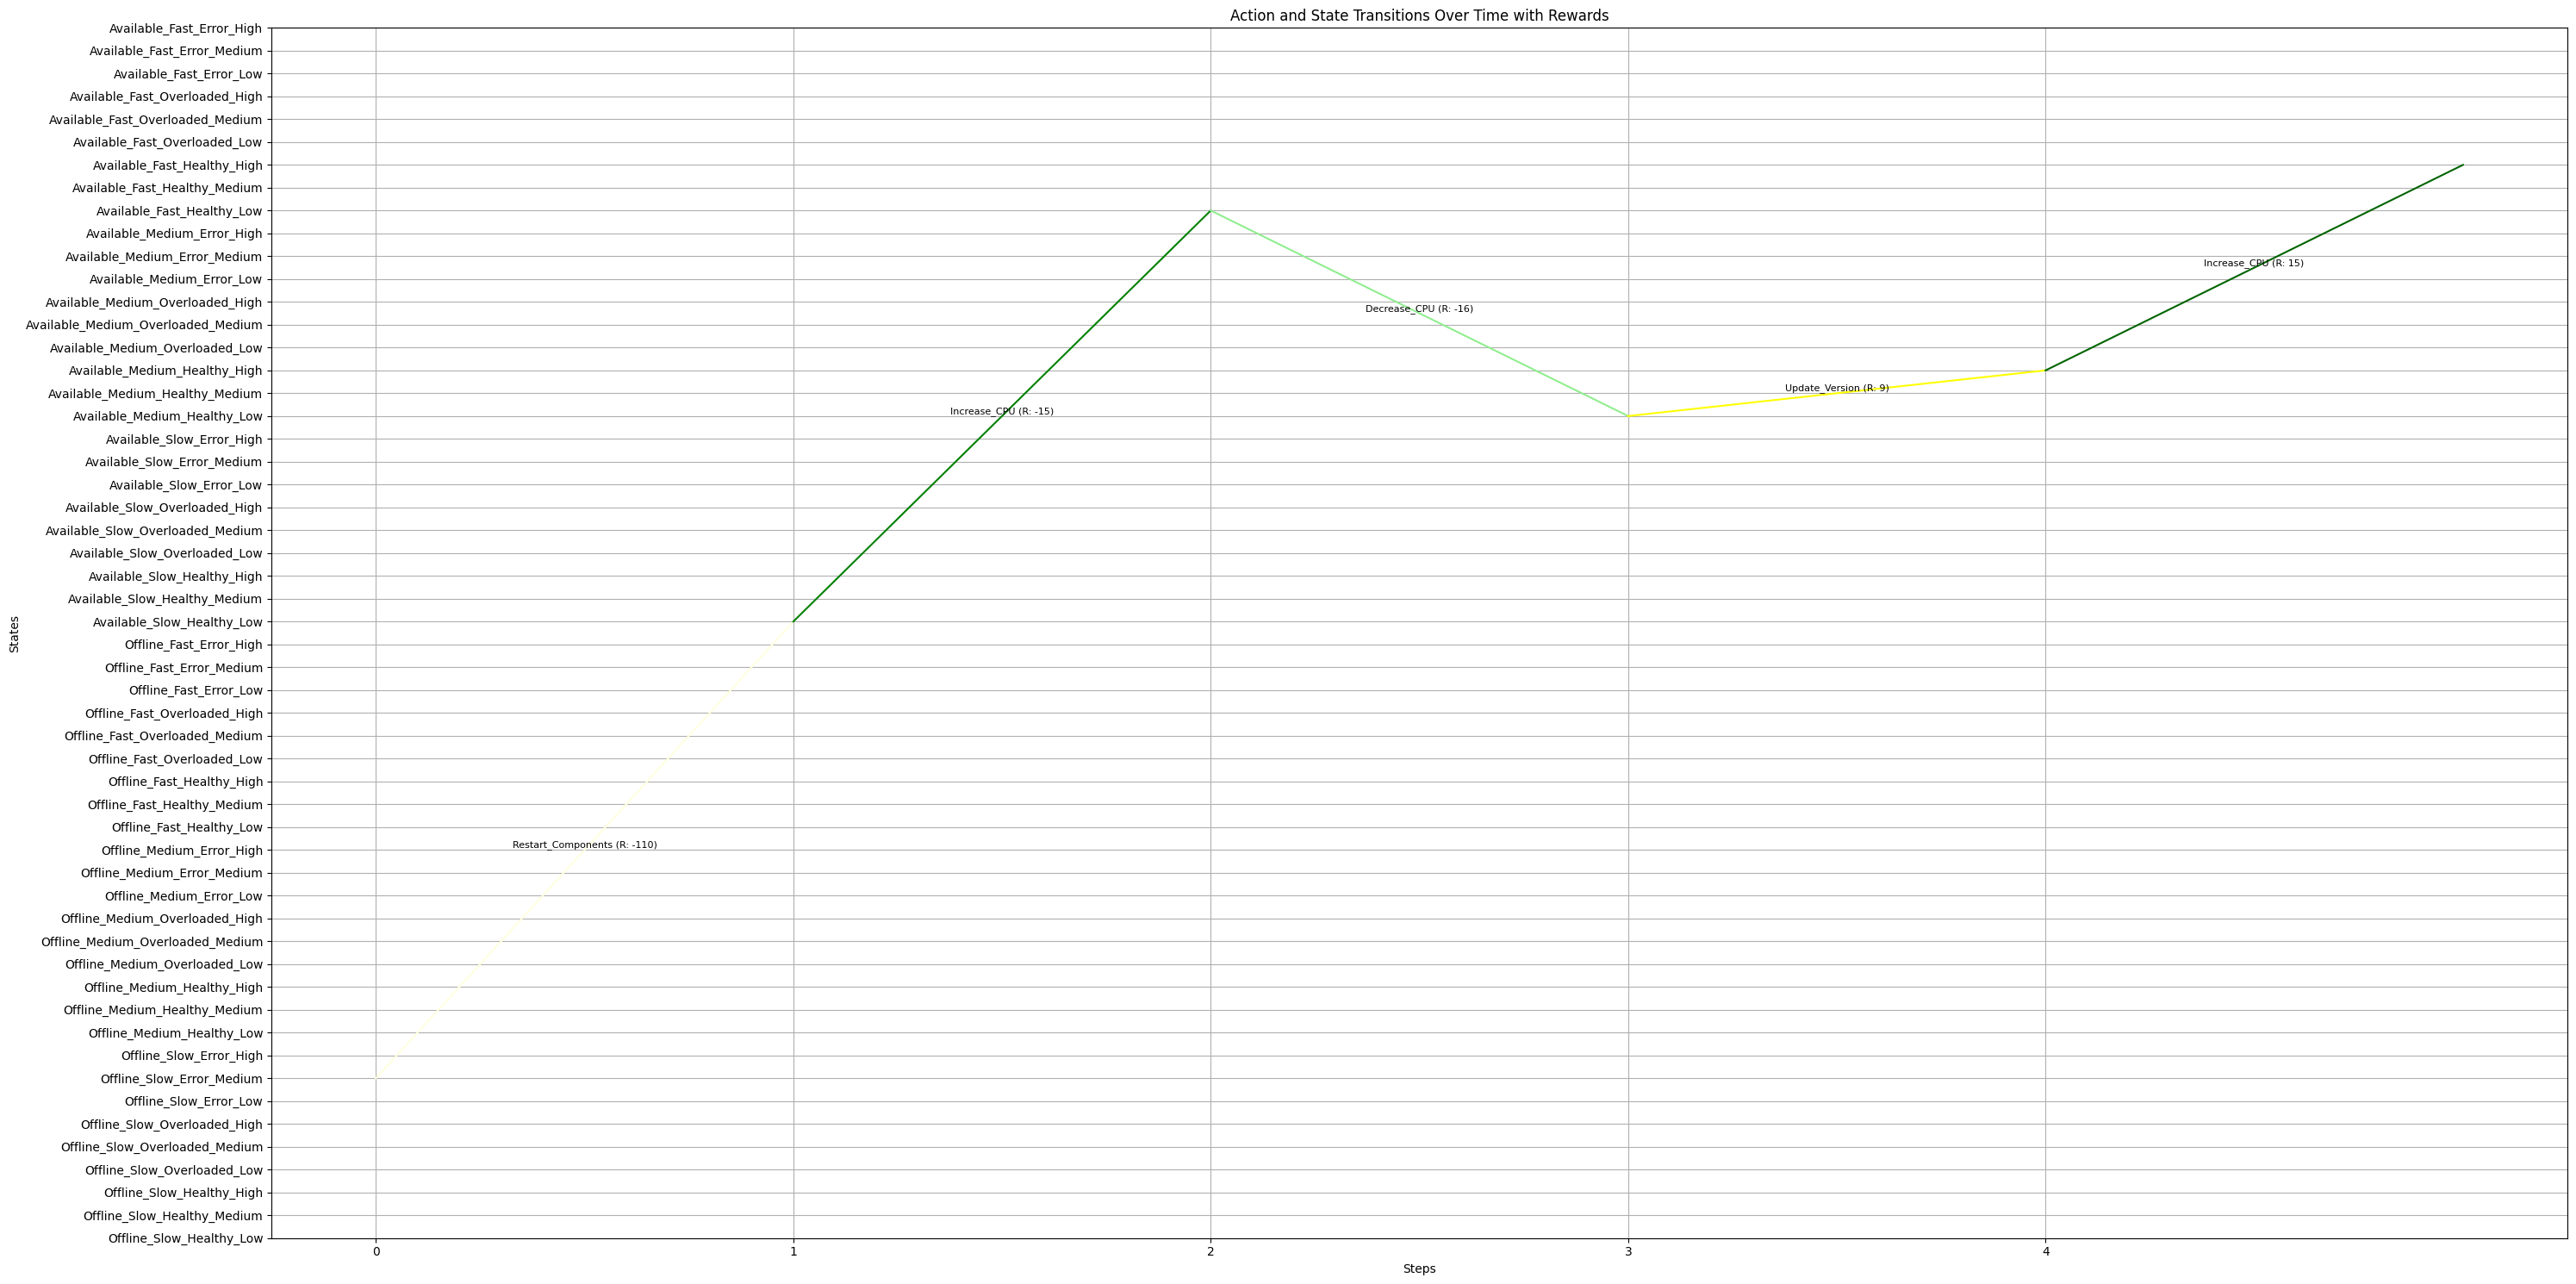

In [ ]:
env.reset()
num_episodes = 1000  # Número de episódios de treinamento
alpha = 0.15  # Taxa de aprendizado
gamma = 0.999  # Fator de desconto
epsilon = 0.2  # Exploração inicial

Q_sarsa, policy_sarsa, epidodes_rewards = expected_sarsa_learning(env, num_episodes, gamma, alpha, epsilon)
total_rewards_sarsa, history_sarsa = run_sarsa_policy(
    env, policy_sarsa, num_episodes, 200
)

# Exibir recompensas totais por episódio
plot_total_rewards(epidodes_rewards)

# Exibir histórico de estados e ações com recompensas
plot_action_state_history_with_rewards(history_sarsa, env)

#### Experimento 2 - Foco em exploração

Episódio 0/2000 concluído. Total reward: -7400
Episódio 100/2000 concluído. Total reward: -263
Episódio 200/2000 concluído. Total reward: -3145
Episódio 300/2000 concluído. Total reward: -406
Episódio 400/2000 concluído. Total reward: -671
Episódio 500/2000 concluído. Total reward: -495
Episódio 600/2000 concluído. Total reward: -848
Episódio 700/2000 concluído. Total reward: -986
Episódio 800/2000 concluído. Total reward: -1638
Episódio 900/2000 concluído. Total reward: -1453
Episódio 1000/2000 concluído. Total reward: -422
Episódio 1100/2000 concluído. Total reward: -463
Episódio 1200/2000 concluído. Total reward: -1014
Episódio 1300/2000 concluído. Total reward: -1896
Episódio 1400/2000 concluído. Total reward: -4302
Episódio 1500/2000 concluído. Total reward: -1955
Episódio 1600/2000 concluído. Total reward: -264
Episódio 1700/2000 concluído. Total reward: -409
Episódio 1800/2000 concluído. Total reward: -956
Episódio 1900/2000 concluído. Total reward: -1498


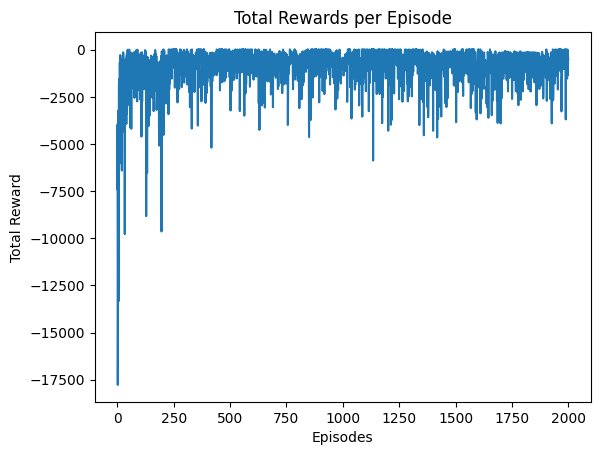

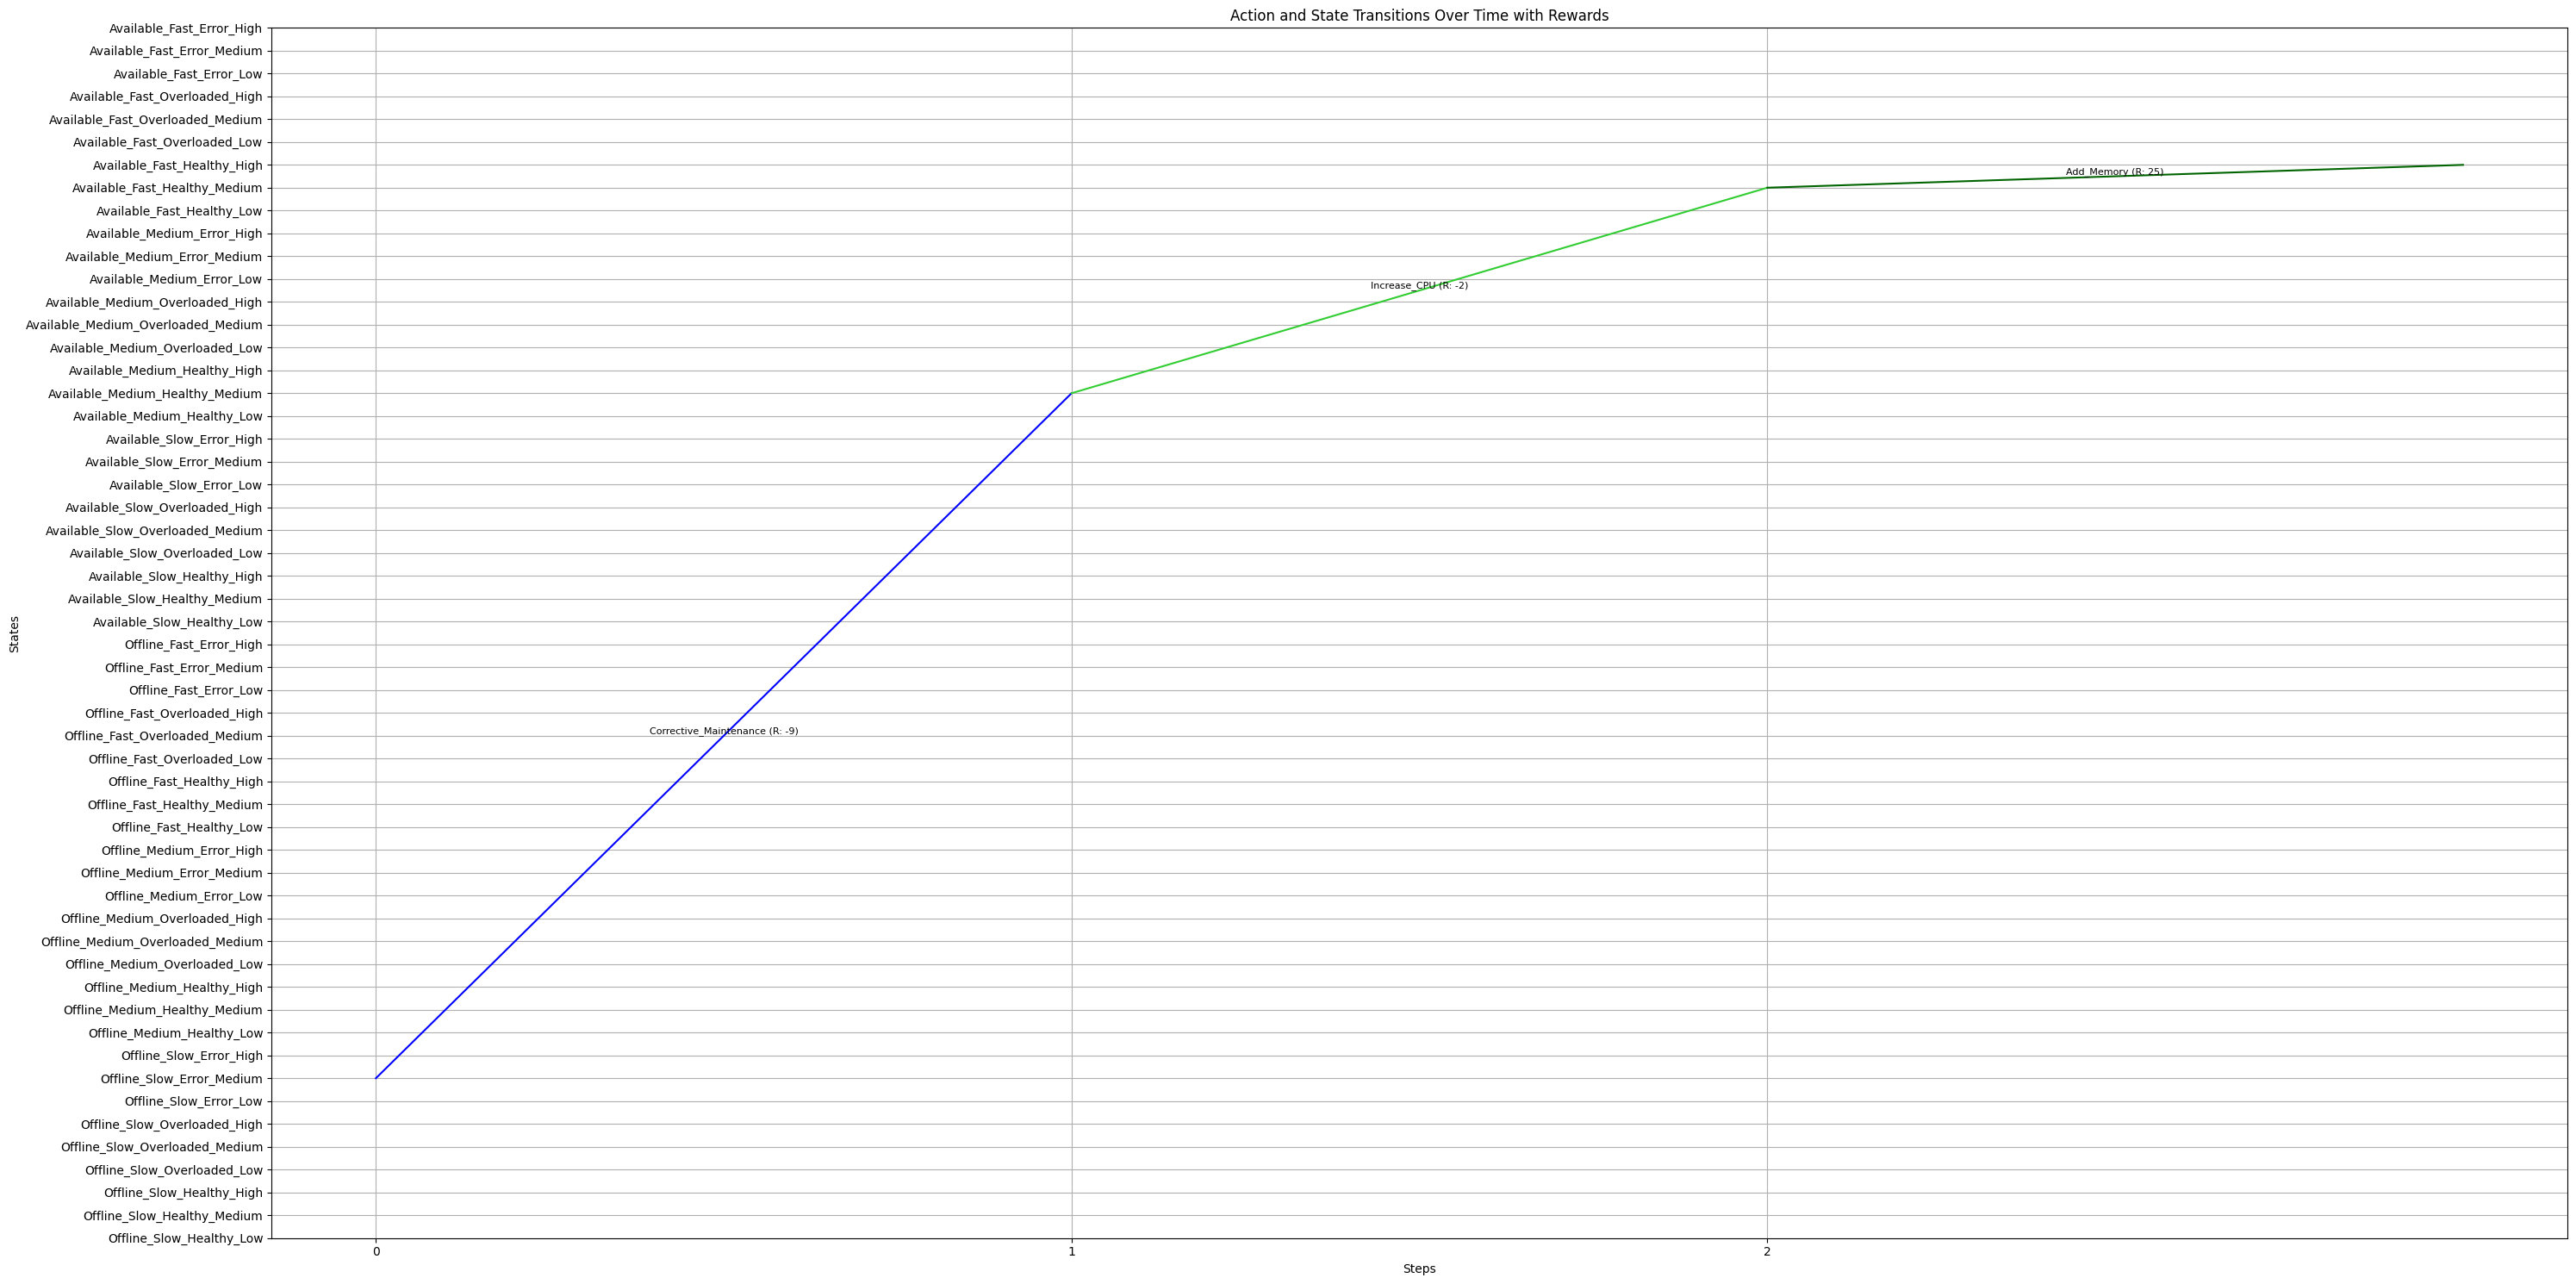

In [ ]:
env.reset()
num_episodes = 2000  # Número de episódios de treinamento
alpha = 0.05  # Taxa de aprendizado
gamma = 0.99  # Fator de desconto
epsilon = 0.5  # Exploração inicial

Q_sarsa, policy_sarsa, epidodes_rewards = expected_sarsa_learning(env, num_episodes, gamma, alpha, epsilon)
total_rewards_sarsa, history_sarsa = run_sarsa_policy(
    env, policy_sarsa, num_episodes, 200
)

# Exibir recompensas totais por episódio
plot_total_rewards(epidodes_rewards)

# Exibir histórico de estados e ações com recompensas
plot_action_state_history_with_rewards(history_sarsa, env)

#### Experimento 3 - Exploração controlada

Episódio 0/1000 concluído. Total reward: -9786
Episódio 100/1000 concluído. Total reward: -122
Episódio 200/1000 concluído. Total reward: -541
Episódio 300/1000 concluído. Total reward: -447
Episódio 400/1000 concluído. Total reward: -107
Episódio 500/1000 concluído. Total reward: -518
Episódio 600/1000 concluído. Total reward: -252
Episódio 700/1000 concluído. Total reward: -86
Episódio 800/1000 concluído. Total reward: -624
Episódio 900/1000 concluído. Total reward: -99


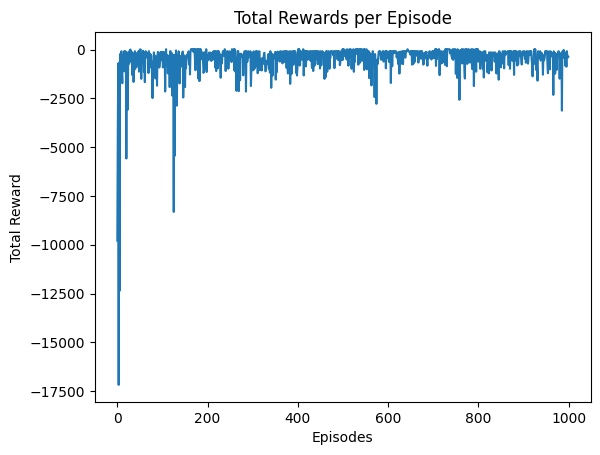

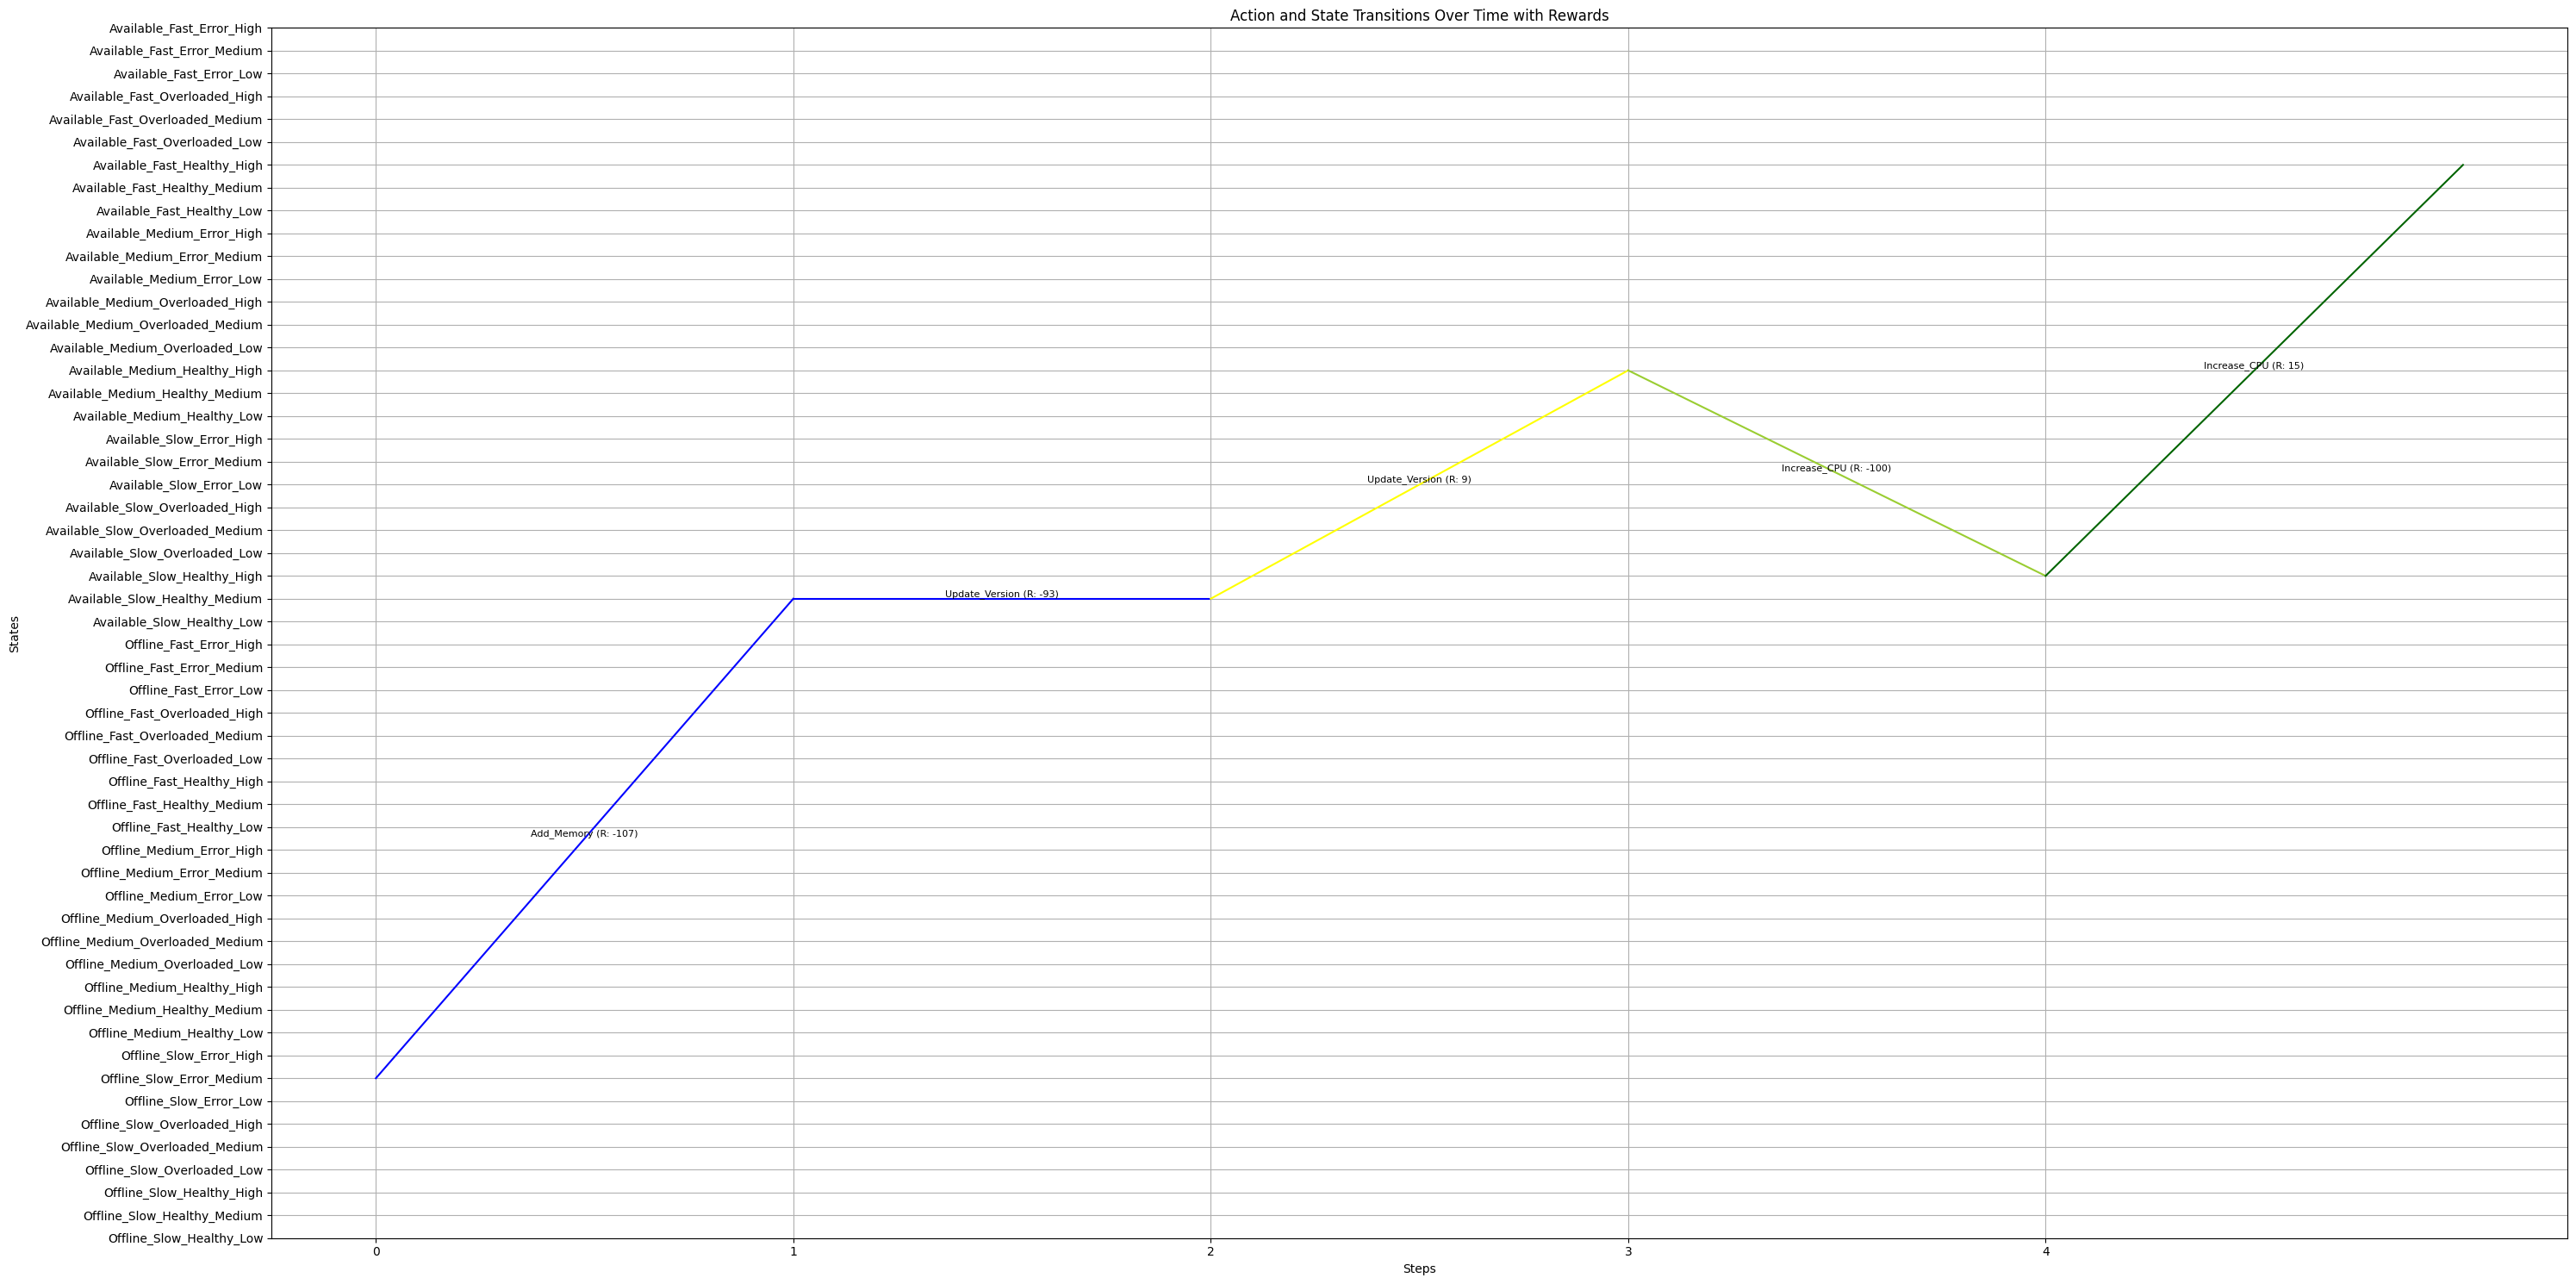

In [ ]:
env.reset()
num_episodes = 1000  # Número de episódios de treinamento
alpha = 0.1  # Taxa de aprendizado
gamma = 0.999  # Fator de desconto
epsilon = 0.2  # Exploração inicial

Q_sarsa, policy_sarsa, epidodes_rewards = expected_sarsa_learning(env, num_episodes, gamma, alpha, epsilon)
total_rewards_sarsa, history_sarsa = run_sarsa_policy(
    env, policy_sarsa, num_episodes, 200
)

# Exibir recompensas totais por episódio
plot_total_rewards(epidodes_rewards)

# Exibir histórico de estados e ações com recompensas
plot_action_state_history_with_rewards(history_sarsa, env)